# **1 - Introduction**

# 1.1 - Preface

 **Ischemic Heart Disease (IHD)** is one of the leading cause of death all over the world. IHD refers to one kind of heart disease that manifests myocardial ischemia, hypoxia, or necrosis caused by coronary artery narrowing or occlusion, which is caused by atherosclerosis. 
 
 According to the anatomical structure of **coronary artery**, there are three main arteries supplying blood to the heart, namely, **LAD** (left anterior descending coronary artery), **LCX** (left circumflex coronary artery) and **RCA** (right coronary artery).
 
 **Coronary Artery Disease (CAD)** occurs when the lumen of any one of the three coronary arteries is **narrowed by 50% or more**. Since CAD is a highly lethal disease, early detection and diagnosis is crucial for saving lives and improving prognosis.
 
 **Coronary angiography** is regarded as the gold standard for the diagnosis of CAD. But angiography is an **invasive procedure**. And many developing and low-income countries do not have equipments for angiography. Therefore, **non-invasive detection** of coronary artery disease in high risk patient based on machine learning algorithms would be helpful for reducing medical burden and a large loss of life.

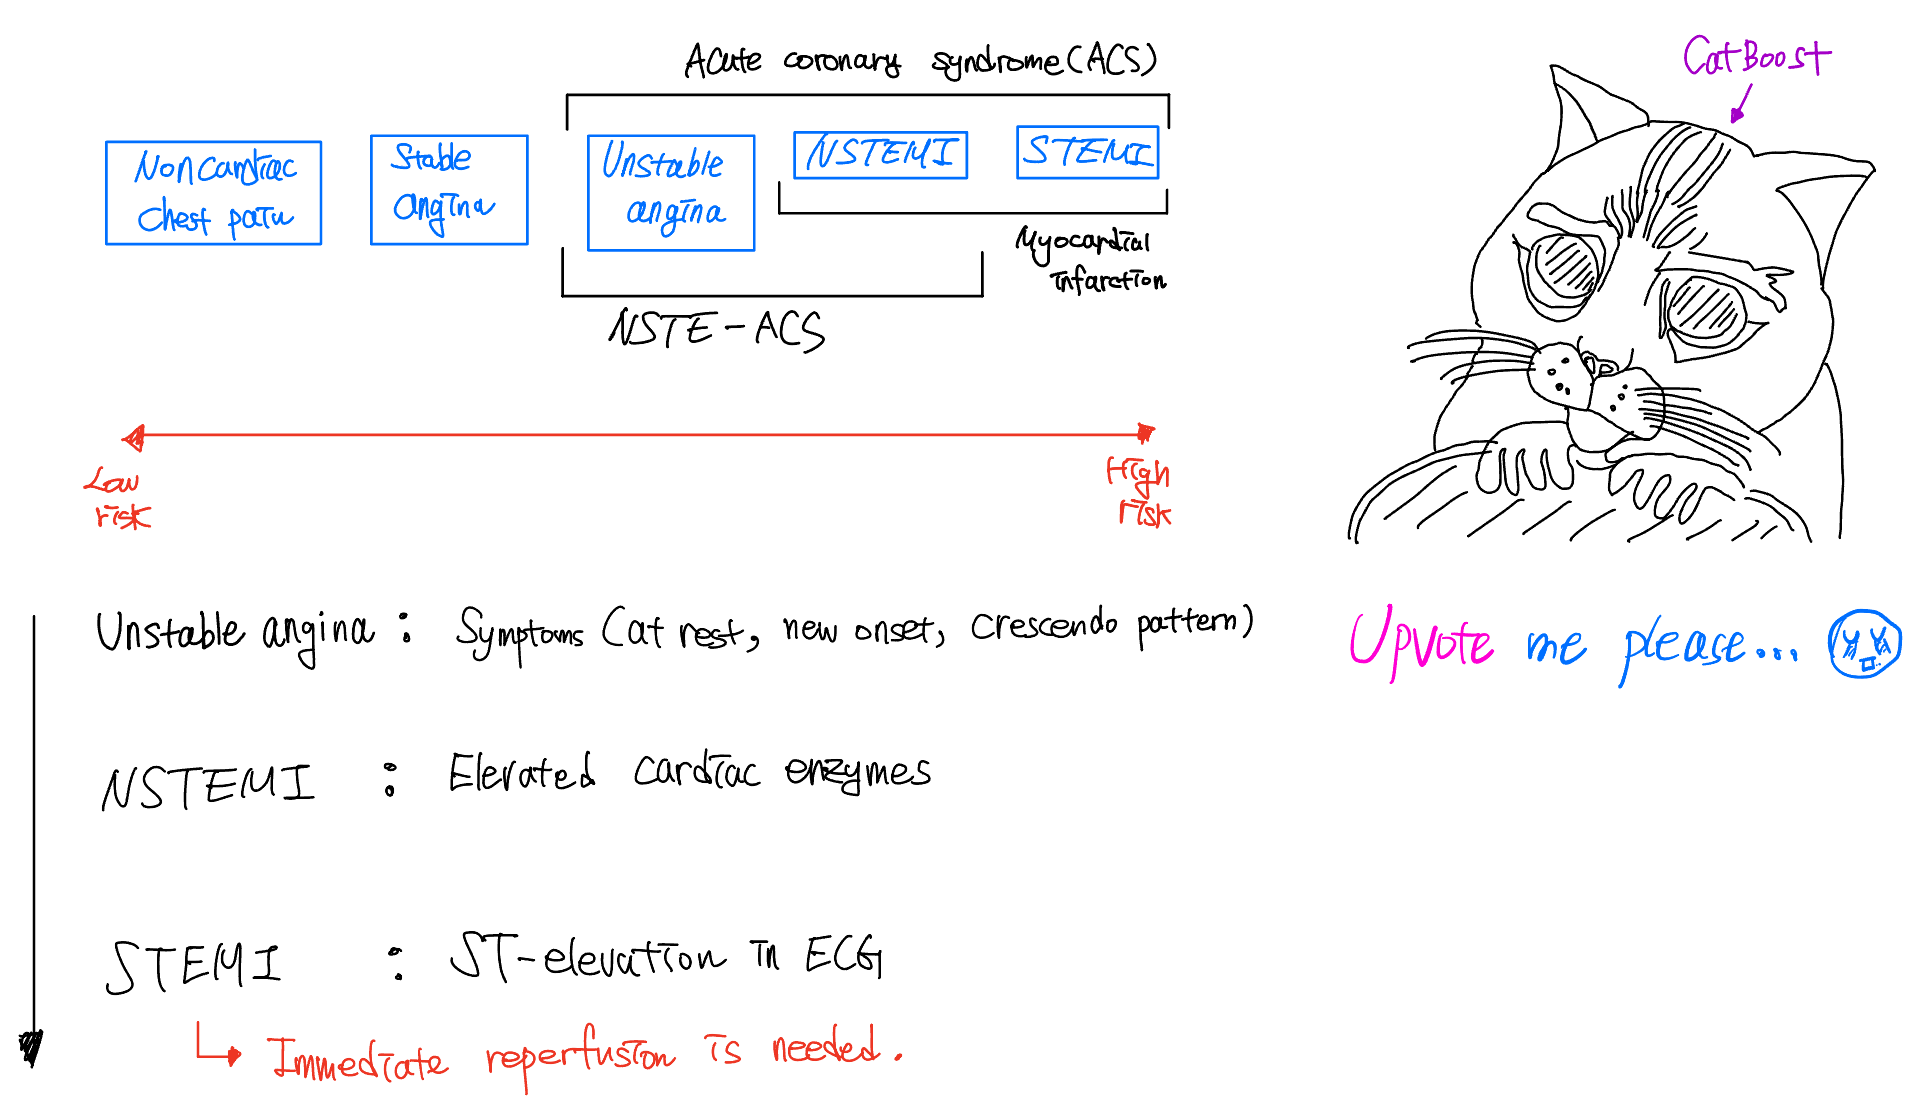

For patients who came into hospital because of chest pain, they can be diagnosed into five groups. which are:
 
 - Noncardiac chest pain
 - Stable angina
 - Unstable angina
 - Non ST segment elevation Myocardial Infarction (NSTEMI)
 - ST segment elevation Myocardial Infarction (STEMI)
 
 
If there is no clue about noncardiac chest pain (problems of lung, esophagus, chest wall, or maybe psychogenic), then we can suppose that the chest pain is originated from heart. Diagnosis between stable angina and unstable angina is based on symptoms of the patient. *Unstable angina* can be characterized by three symptoms, which are "at rest, new onset, crescendo pattern". 

If cardiac enzymes are elevated, then patient can be diagnosed as "myocardial infarction". And If the ECG shows ST elevation, then patient is diagnosed as *STEMI*, otherwise *NSTEMI*. Unstable angina and NSTEMI are called as NSTE-ACS. **STEMI patients need immediate reperfusion by coronary angiography.** And NSTE-ACS patients get coronary angiography if the patient meets the clinical criteria.

This notebook consists of **five parts**:

#### ***1. Dataset Description***
#### ***2. Exploratory Data Analysis***
#### ***3. Predictive Analysis***
#### ***4. Explainable AI using SHAP***
#### ***5. Conclusion***

 In ***Dataset Description*** part, we will understand each features elaborately with some domain knowledge. Especially referring to *NCEP ATP III Guideline*, which explains us about coronary heart disease major risk factor and risk category, we will understand this dataset from clinician perspective. And also studying *basics of ECG* will improve your understanding about this dataset. 
 
 In ***Exploratory Data Analysis (EDA)*** part, we will understand the structure and characteristics of our data by plotting the graph and figures. We will deal with *data cleansing, univarate analysis, bivariate analysis, multivariate analysis, correlation analysis, and mutual information*. *Correlation analysis* and *Mutual information* can provide us the potential relationships between variables and target values. We can get valuable insights into how these variables influence each other and their collective impact on coronary heart disease risk.
 
In ***Predictive Analysis*** part, we will preprocess the data, and split the data into training set and test set. And we will oversample the data by `SMOTENC`, and develop predictive models with hyperparameter tuning by `Optuna`.  
 
Since hyperparameter tuning process takes a comparatively long time, I made variable `optuna_switch`, which is initally set to `False`. If you want to tune the hyperparameter of the models, just change `optuna_switch = False` into `optuna_switch = True`. Then optuna will tune the hyperparameter of the three models, which are `CatBoost`, `XGBoost`, and `LightGBM`.
 
 We will build six models, `CatBoost`, `XGBoost`, `LightGBM`, and three *Ensemble Models*. Then we will compare these six models with metrics, which are accuracy, precision, recall, F1 score, and roc_auc score. And we will choose one model to analyze explainability in next part.
 
 In ***Explainable AI using SHAP*** part, selected model will be interpreted with *SHAP value*. By plotting *Feature importance plot, Summary plot, and Dependence plot*, we can get information about *Global interpretability* of the model. 
 
 To understand *Local interpretability* of the model, we will choose **Patient No.77** and **Patient No.7** from the train dataset. And we will assume a situation that you become a doctor. And you are responsible for caring the patient who came into your office because of chest pain. **Will you recommend the patient to get invasive coronary angiography or not?** *SHAP Waterfall plot* and *SHAP Force plot* will help you explain the patient why you recommend or not.
 
 So there is a long way to go. I've graduated medical school this year, and **this is my first notebook**. I've tried to explain this dataset from clinician perspective and more professionally :) If you think this notebook interesting, **please upvote this notebook before starting the journey :)**

# 1.2 - Dataset Description

 **Z-Alizadeh Sani dataset** is publicly available in the UCI Machine Learning repository. This dataset contains 303 medical records derived from **303 cases who visited Shaheed rajaei hospital (in Iran) because of chest pain**. Each record includes 55 features belonging to four categories.
 
**Four categories are**:

- Demographic features
- Symptoms and Physical Examination
- ECG
- Echocardiography features

<br/>

 These 303 samples belong to two classes, namely, CAD class and normal class. When the stenosis of coronary arteries lumen of a sample reaches or exceeds 50%, this sample is classified as CAD class; otherwise it belongs to the normal class. 
 
 Accordingly, in 303 samples, 216 instances accounting for 71.29% are CAD class, and 87 instances accounting for 28.71% are normal class. The ECG features of Z-Alizadeh Sani dataset are obtained by professional doctors. Silmilarly, the echocardiography features of Z-Alizadeh Sani dataset are obtained by professional doctors.



___
### ***Coronary Heart disease(CHD) Major Risk Factors (NCEP ATP III Guideline)***
#### *1. Cigarette smoking (Current)*
#### *2. Hypertension (BP>=140/90 mmHg or on antihypertensive medication)*
#### *3. Low HDL cholesterol (<40mg/dL)*
#### *4. Family history of premature CHD (CHD in male first degree relative <55 years; CHD in female first degree relative <65 years)*
#### *5. Age (men >=45 years, women >=55 years)*
- *In ATP III, **Diabetes** is regarded as a CHD risk equivalent.*
- *HDL cholesterol >= 60mg/dL counts as a "negative" risk factor; its presence removes one risk factor from the total count.*
___

 Above **five risk factors** from NCEP ATP III guidelines are important, since we can decide whether to start LDL-lowering therapy (statin) or not as a prevention for coronary artery disease. Also we can use **these risk factors for improving machine learning algorithms.** Therefore, we need to take a closer look at those features:

- `Current Smoker`
- `HTN` (Hypertension)
- `HDL`
- `FH` (Family history of coronary heart disease)
- `Age`
- `Diabetes`

___
### ***Risk Category for CHD (NCEP ATP III Guideline)***
#### *1. Very High Risk*
- *Coronary artery disease, Ischemic stroke, Transient ischemic attack, Peripheral artery disease*
- *Cardiovascular disease + multiple risk factors (especially diabetes), severe/poorly controlled risk factors, metabolic syndrome, or acute coronary syndrome*
- *LDL goal : <70mg/dL*
- *LDL level at which to consider Drug Therapy : >=100mg/dL
   (<100mg/dL : drug optional)*

#### *2. High Risk*
- *CHD or CHD risk equivalents (10-year risk >20%)*
    - Carotid artery disease, Diabetes mellitus, Abdominal aortic aneurysm
- *LDL goal : <100mg/dL*
- *LDL level at which to consider Drug Therapy : >130mg/dL
   (100-129mg/dL : drug optional)*

#### *3. Moderate Risk*
- *2+ Risk Factor (10-year risk <= 20%)*
- *LDL goal : <130mg/dL*
- *LDL level at which to consider Drug Therapy : >=160mg/dL (10-year risk <10%), >=130mg/dL (10-year risk 10-20%)*

#### *4. Low Risk*
- *0-1 Risk Factor*
- *LDL goal : <160mg/dL*
- *LDL level at which to consider Drug Therapy : >=190mg/dL
   (160-189mg/dL : LDL-loweing drug optional)*
___

 Since ischemic stroke, transient ischemic attack, and peripheral artery disease are classified as *Very High Risk* for coronary artery disease, we also need to take a closer look at those features:
 
- `CVA` (Cerebrovascular accident)
- `Weak Peripheral Pulse` (suggestive of peripheral artery disease)

# 1.2.1 - Demographic Features 

#### 1. Age : 30-86 [continuous]
#### 2. Weight : 48-120kg [continuous]

#### 3. Length : 140-188cm [continuous]
- `Height`

#### 4. Sex : Male, Female [categorical]

#### 5. BMI : 18.12-40.90 [continuous]
- `Body mass index`
- Calculated by : Height / (Weight)^2  

#### 6. DM : 0, 1 [categorical]
- `Diabetes Mellitus` (*Underlying disease*)

#### 7. HTN : 0, 1 [categorical]
- `Hypertension` (*Underlying disease*)

#### 8. Current smoker : 0, 1 [categorical]

#### 9. Ex-smoker : 0, 1 [categorical]

#### 10. FH : 0, 1 [categorical]
- `Family history of coronary artery disease`

#### 11. Obesity : Y, N [categorical]
- Yes (BMI>25), else No

#### 12. CRF : Y, N [categorical]
- `Chronic Renal Failure` (*Underlying disease*)

#### 13. CVA : Y, N [categorical]
- `Cerebrovascular Accident` (*Underlying disease*)

#### 14. Airway disease : Y, N [categorical]
- Including Asthma, Chronic obstructive pulmonary disease (COPD), etc. (*Underlying disease*)

#### 15. CHF : Y, N [categorical]
- `Congestive Heart Failure` (*Underlying disease*)

#### 16. DLP : Y, N [categorical]
- `Dyslipidemia` (*Underlying disease*)
- Any one of the followings: **Total Cholesterol >= 240mg/dL, LDL Cholesterol >= 160mg/dL, TG >= 200mg/dL, or HDL Cholesterol <40mg/dL** can be diagnosed as dyslipidemia.

# 1.2.2 - Symptoms and Physical Examination

___
### ***Clinical Classification of Chest Pain***

<br/>

**Typical angina (definite)**
- Meets the following three characteristics:

1. Constricting discomfort in the front of the chest or in the neck, jaw, shoulder, or arm

2. Precipitated by physical exertion

3. Relieved by rest or nitrates within 5 min.

**Atypical angina**
- Meets two of these characteristics

**Non-anginal chest pain**
- Meets only one or none of these characteristics
___



#### 1. Typical chest pain : 0, 1 [categorical]
#### 2. Atypical : 0, 1 [categorical]
- `Atypical angina`

#### 3. Nonanginal : 0, 1 [categorical]
- `Nonanginal chest pain`

#### 4. Exertional CP : 0, 1 [categorical]
- `Exertional chest pain` (precipitated by physical exertion)

#### 5. LowTH Ang : 0, 1 [categorical]
- `Low Threshold Angina`

#### 6. BP : 90-190mmHg [continuous]
- `Blood Pressure` (Mean Arterial Pressure) 
- Mean Arterial Pressure = 1/3 * Systolic Blood Pressure + 2/3 * Diastolic Blood Pressure

#### 7. PR : 50-110/min [continuous]
- `Pulse Rate`
- Normal : 60-100/min

#### 8. Edema : 0, 1 [categorical]

#### 9. Weak peripheral pulse : 0, 1 [categorical]

#### 10. Lung rales : 0, 1 [categorical]

#### 11. Systolic murmur : 0, 1 [categorical]

#### 12. Diastolic murmur : 0, 1 [categorical]

#### 13. Dyspnea : Y, N [categorical]

#### 14. Function class : 0, 1, 2, 3 [categorical]
- `NYHA Classification of severity of heart failure`
- 0(NYHA Class 1), 1(NYHA Class 2), 2(NYHA Class 3), 3(NYHA Class 4)
- ***NYHA Class 1*** : No symptoms and limitations in ordinary physical activity
- ***NYHA Class 2*** : Slight limitation of physical activity. Ordinary physical activity results in mild symptoms such as fatigue, shortness of breath and angina.
- ***NYHA Class 3*** : Marked limitation of physical activity. Less than ordinary physical activity leads to symptoms.
- ***NYHA Class 4*** : Severely limited. Experiences symptoms even at rest.


# 1.2.3 - Laboratory Tests

#### 1. FBS : 62.0-400.0mg/dL [continuous]
- `Fasting Blood Glucose`
- Diabetes Mellitus Diagnostic Criteria
    - **Two abnormal values** are needed in asymptomatic patients
    1. HbA1c >= 6.5%
    2. **Fasting blood glucose** >= 126mg/dL
    3. Random plasma glucose >= 200mg/dL, with signs or symptoms of diabetes (e.g. polyuria, polydipsia, unintentional weight loss)
    4. 2-hour plasma glucose >= 200mgdL, after 75g oral glucose tolerance test
    
    
#### 2. CR : 0.5-2.2mg/dL [continuous]
- `Creatinine`
- Normal range : 0.5-1.4mg/dL
- High creatinine levels can be caused by:
    - **Kidney failure** 
    - **Urinary tract blockage**
    - Kidney infection
    - Glomerulonephritis
    - Diabetes
    - High blood pressure
    - Heart disease (Atherosclerosis, Congestive Heart Failure, etc.)
    - Drug toxicity
    
#### 3. BUN : 6.0-52.0mg/dL [continuous]
- `Blood Urea Nitrogen`
- Normal range : 6.0-20.0mg/dL
- High BUN levels can be caused by:
    - **Kidney failure**
    - **Urinary tract obstruction**
    - **Dehydration**
    - Congestive heart failure or recent heart attack
    - Gastrointestinal bleeding
    - Shock
    - Severe burns
    - High-protein diet
    - Certain medications
    
#### 4. HB : 8.9-17.6mg/dL [continuous]
- `Hemoglobin`
- Normal range : 13.5-17.5mg/dL (Male), 12.5-15.5mg/dL (Female)
- Low Hemoglobin level can be caused by:
    - Anemia
    - Gastrointestinal bleeding
    - Leukemia
    - Lymphoma
    - Renal failure
    
#### 5. PLT : 25.0-742.0 (25,000-742,000/dL) [continuous]
- `Platelet`
- Normal range : 150,000-450,000/dL

#### 6. WBC : 3,700-18,000/dL [continuous]
- `White Blood Cells` : consist of neutrophils, lymphocytes, monocytes, eosinophils, and basophils.
- Normal range : 4,500-13,500/dL
- High White blood cell count (Leukocytosis) can be caused by:
    - Infection
    - Inflammation
    - Injury
    - Immune system disorders
    
#### 7. Lymph : 7.0-60.0% [continuous]
- `Lymphocyte to WBC cell ratio`
- Normal range : 20-40%
- High Lymphocyte (Lymphocytosis) can be caused by:
    - Recent infection (most commonly viral)
    - Medical condition that causes long-lasting inflammation (e.g. Rheumatoid arthritis)
    - Reaction to a new medication
    - Leukemia/Lymphoma
    - Severe medical illness, such as trauma

#### 8. Neutrophil : 32.0-89.0% [continuous]
- `Neutrophil to WBC cell ratio`
- Normal range : 40-60%

#### 9. ESR : 1-90 [continuous]
- `Erythrocyte sedimentation rate`
- Normal range : 0-9 (Male), 0-15 (Female)
- ESR reveals **inflammatory activity**, in case of infection, blood disorders, cancers, or injury.    

#### 10. K : 3.0-6.6mmol/L [continuous]
- `Potassium`
- Normal range : 3.5-5.5mmol/L
- High potassium level can cause cardiac arrhythmias.

#### 11. Na : 128.0-156.0mmol/L [continuous]
- `Sodium`
- Normal range : 135-145mmol/L

#### 12. LDL : 18.0-232.0mg/dL [continuous]
- `LDL cholesterol`
- Normal range : <130mg/dL

#### 13. HDL : 15.9-111.0mg/dL [continuous]
- `HDL cholesterol`
- Normal range : >=40mg/dL

#### 14. TG : 37.0-1050.0mg/dL [continuous]
- `TG cholesterol`
- Normal range : <150mg/dL

# 1.2.4 - Echocardiography

#### 1. VHD : N, Mild, moderate, severe [categorical]
- `Valvular heart disease` (*Underlying disease*)
- Normal, Mild, Moderate, Severe

#### 2. EF-TTE : 15.0-60.0 [continuous]
- `Ejection Fraction`
- Normal range : >=55%
- Ejection fraction measures how well your heart is functioning. It's expressed as a percentage and indicates how much blood your heart pumps out with each contraction. For example, an ejection fraction of 60% means your heart is pumping 60% of your blood out of your left ventricle every time your heart beats.  

#### 3. Region RWMA : 0, 1, 2, 3, 4 [categorical]
- `Regional wall motion abnormality`
- Normal range : 0
- 0 (Normal), 1 (Hypokinesis), 2 (Akinesis), 3 (Dyskinesis), 4 (Aneurysmal)
- `RWMA` represent decreased contractility of a wall of the heart. It occurs due to **decreased blood suppply** to apart of the heart, it is detected by 2D echo. RWMA helps in diagnosing heart attack, it even helps in identifying extent of heart attack and artery involved in heart attack.

# 1.2.5 - ECG

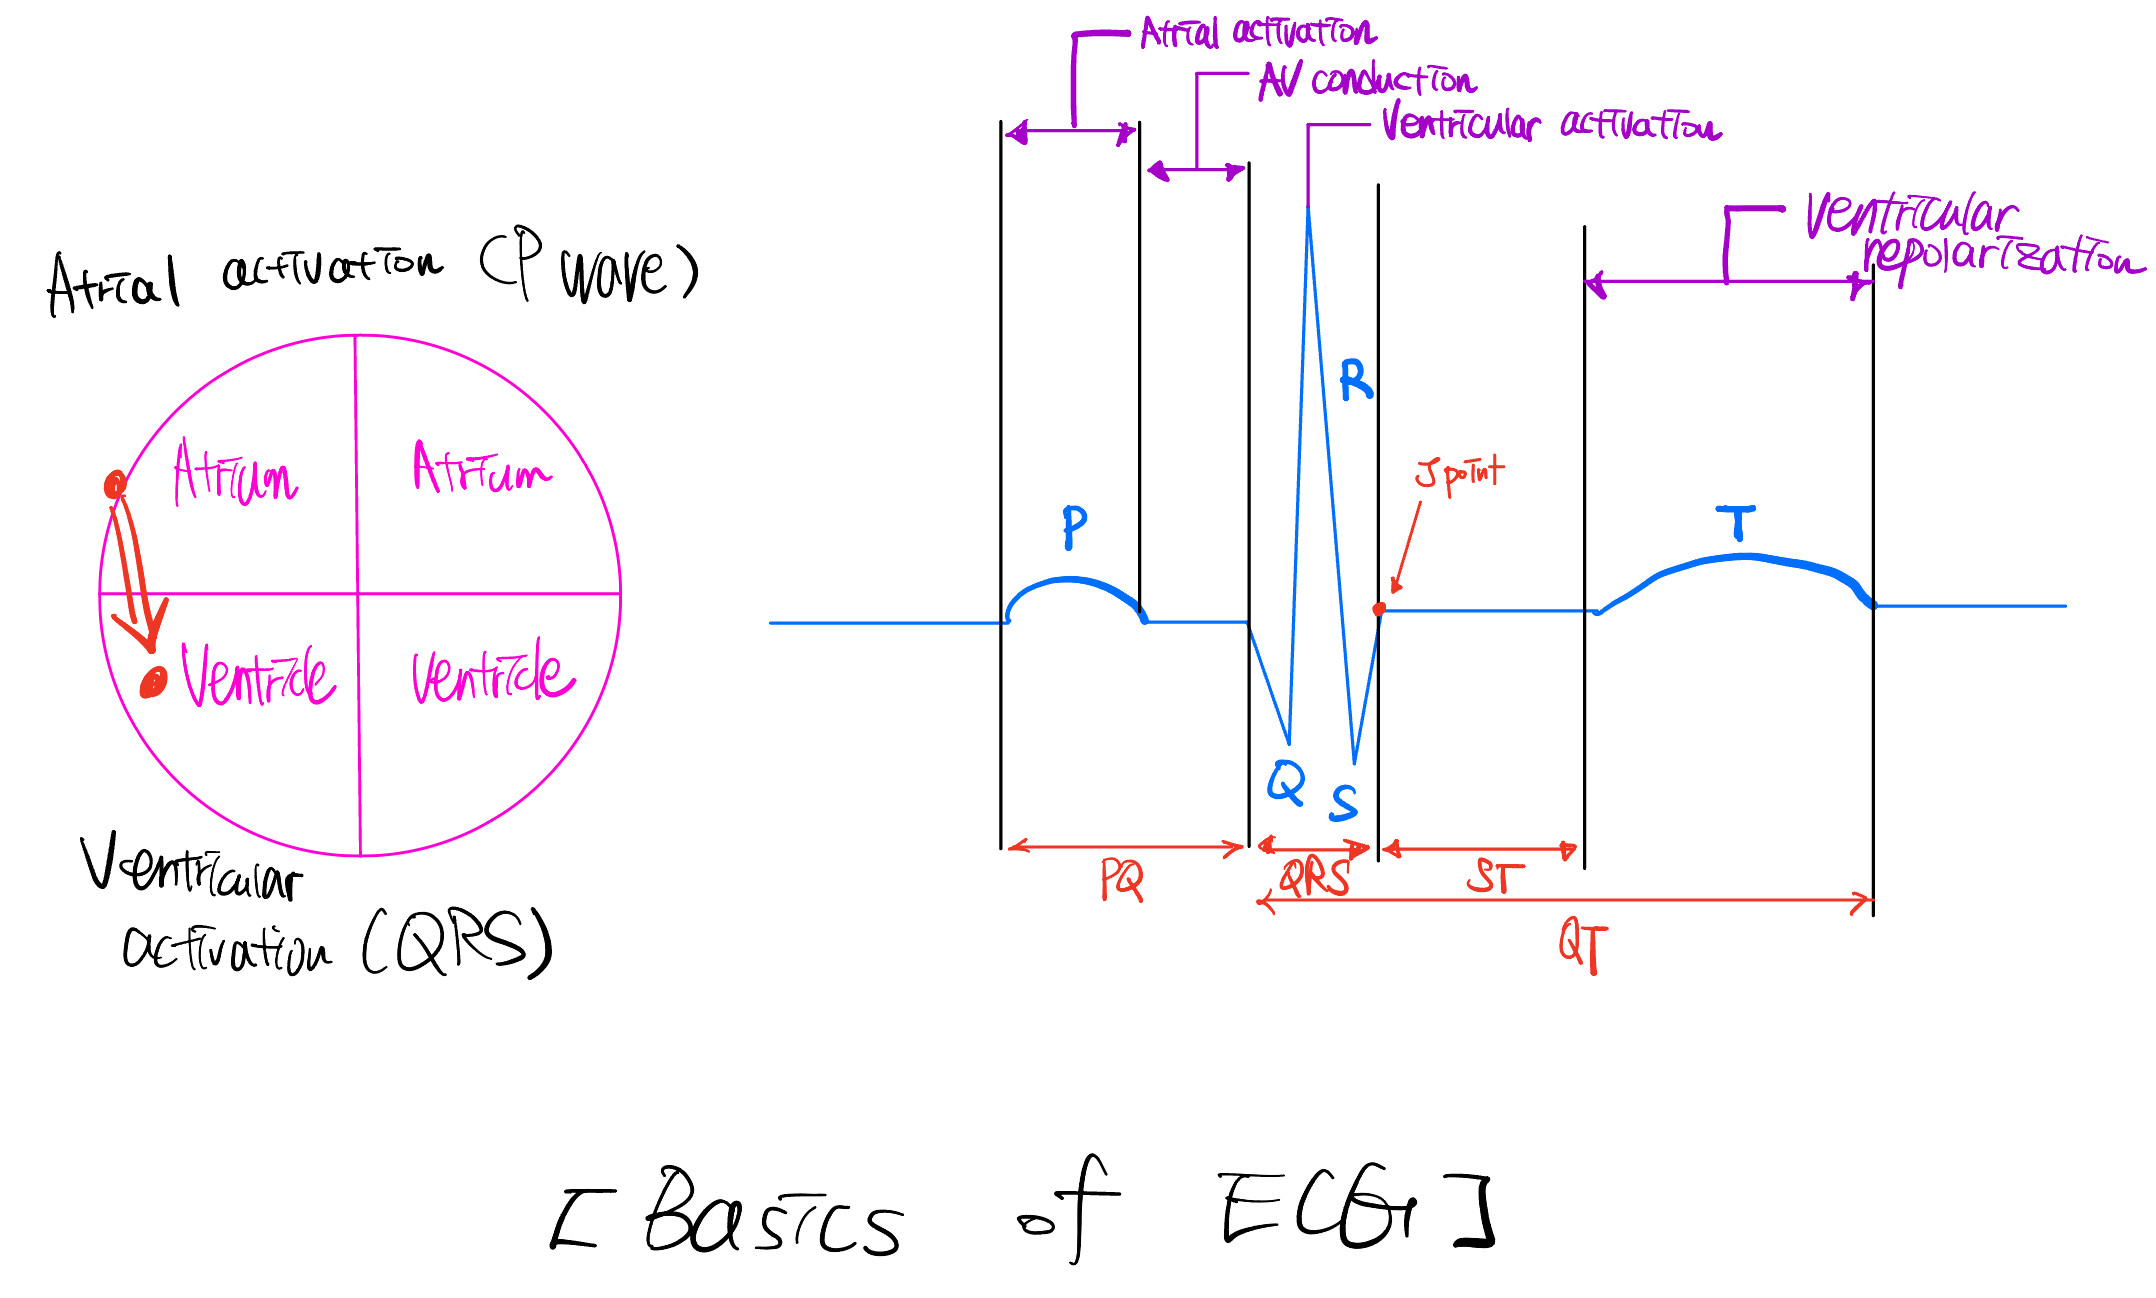

 Before exploring dataset about ECG, Let's talk about the **Basics of ECG**. Fortunately, basic ECG interpretation is starightforward.

 Electrocardiogram (ECG) is a tracing of the electrical activity that is taking place within the heart. Heart has four chambers, which are right atrium, right ventricle, left atrium and left ventricle, Studying these electrical impulses allows us to understand how the heart is functioning. 
 
 **P wave** represents the **activation (=depolarization) of the left and right atrium** and also corresponds to atrial contraction. 
 
 **QRS complex** includes the Q wave, R wave, and S wave. These three waves occur in rapid succession. The QRS complex represents the electrical impulse as it spreads through the vetnricles and indicates **ventricular activation** (=depolarization). As with the P wave, the QRS complex starts just before ventricular contraction.
 
 **J point** is the **point where the QRS complex and the ST segment meet**. It can also be thought of as the start of the ST segment. The J-point (also known as junction) is important because it can be used to diagnose an **ST segment elevation myocardial infarction (STEMI)**. When the J-point is elevated at least 2mm above baseline, it is consistent with STEMI.
 
 **T wave** follows the QRS complex and indicates ventricular repolarization. When a T wave occurs in the opposite direction of the QRS complex, it generally reflects cardiac pathology (i.e. myocardial infarction).

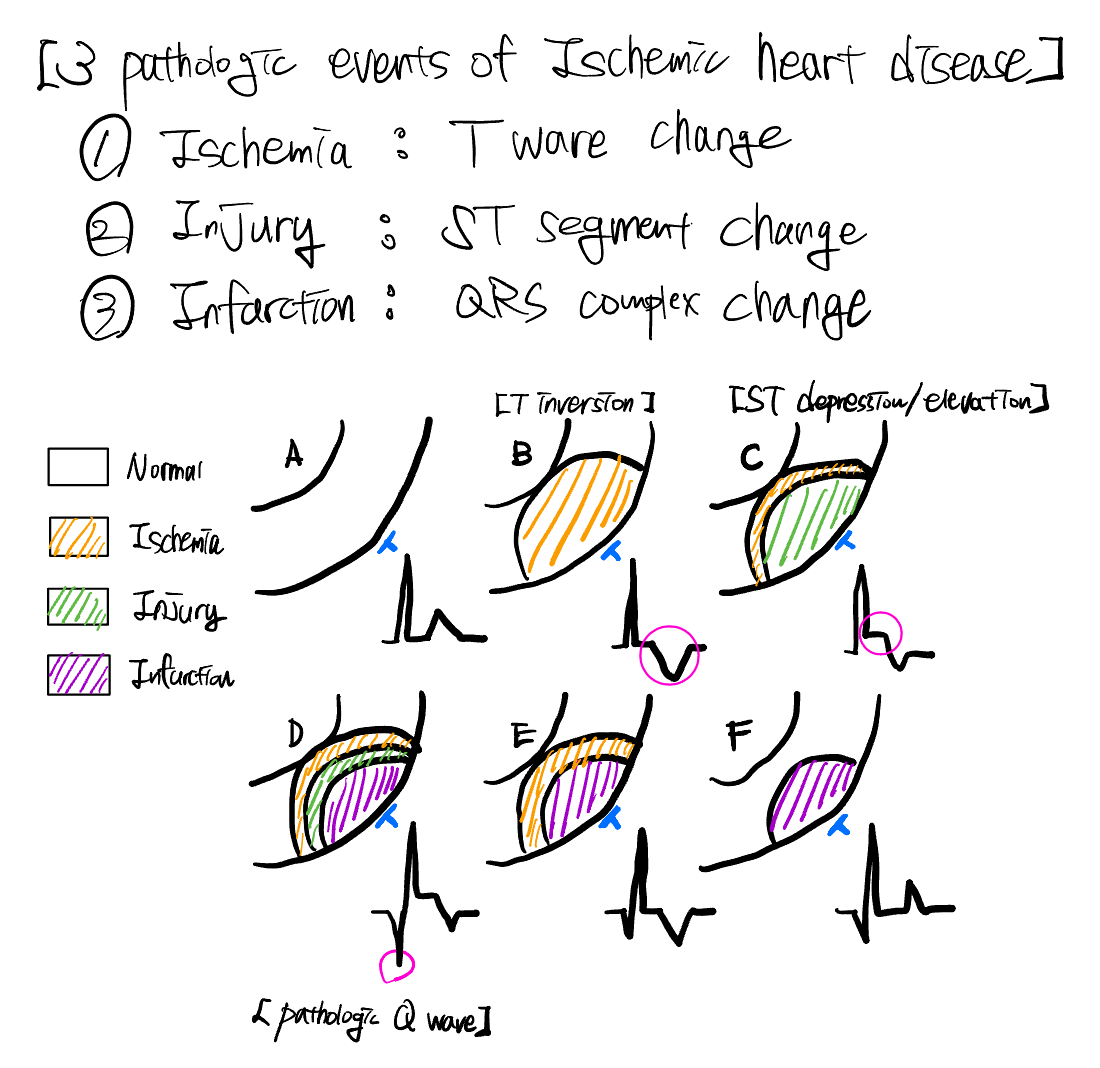

 When ischemic heart disease occurs, there are **3 pathologic events** in the myocardium, which are ischemia, injury, and infarction. And they are reflected in the ecg consequently. 
 
1. Ischemia : T wave change (`T wave inversion`)
2. Injury : ST segment change (`ST depression`, `ST elevation`)
3. Infarction : QRS complex change (`Pathologic Q wave`)

 `Left ventricular hypertrophy` (LVH) also can be seen in ECG. The **most common cause of LVH** is high blood pressure, also called **hypertension**. Long-term high blood pressure strains the left side of the heart, causing it to grow bigger. Also **arrhythmia, aortic valve stenosis (sort of valvular heart disease), diabetes, and hypertropic cardiomyopathy** can lead to LVH. These are conditions which can damage the heart and lead to less blood flow.
 
 `Poor R-wave progression` (PRWP) is a common ECG finding that is often inconclusively interpreted as **suggestive, but not diagnostic, of anterior myocardial infarction** (AMI). Another causes associated with PRWP include :

- Prior anteroseptal MI
- Left ventricular hypertrophy
- Right ventricular hypertrophy
- Inaccurate lead placement
- Dilated cardiomyopathy
- May be a normal variant

**So Let's take a look at six variables about electrocardiography:**

#### 1. T inversion : 0, 1 [categorical]
- `T inversion`
- Suggestive of ischemia

#### 2. ST depression : 0, 1 [categorical]
- `ST depression`
- Suggestive of ischemia or injury

#### 3. ST elevation : 0, 1 [categorical]
- `ST elevation`
- Suggestive of myocardial injury

#### 4. Q wave : 0, 1 [categorical]
- `Pathologic Q wave`
- Suggestive of myocardial infarction, from absence of depolarization in dead tissue

#### 5. LVH : Y, N [categorical]
- `Left ventricular hypertrophy`
- Caused by **hypertension (most common)**, arrhythmia, aortic valve stenosis, diabetes, hypertrophic cardiomyopathy, and etc.

#### 6. Poor R progression : Y, N [categorical]
- `Poor R progression`
- suggestive of prior anterior myocardial infarction, or may be a normal variant

# **2 - Exploratory Data Analysis**

# 2.1 - Data Preparation

In [1]:
!pip install catboost

In [2]:
!pip install shap

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import shap
import xgboost

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

seed = 77

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [4]:
data = pd.read_csv('/kaggle/input/classification-of-coronary-artery-disease/CAD.csv')
data.head()

Age  Weight  Length    Sex        BMI  DM  HTN  Current Smoker  EX-Smoker  \
0   53      90     175   Male  29.387755   0    1               1          0   
1   67      70     157  Fmale  28.398718   0    1               0          0   
2   54      54     164   Male  20.077335   0    0               1          0   
3   66      67     158  Fmale  26.838648   0    1               0          0   
4   50      87     153  Fmale  37.165193   0    1               0          0   

   FH  ...    K   Na    WBC Lymph Neut  PLT EF-TTE  Region RWMA     VHD  \
0   0  ...  4.7  141   5700    39   52  261     50            0       N   
1   0  ...  4.7  156   7700    38   55  165     40            4       N   
2   0  ...  4.7  139   7400    38   60  230     40            2    mild   
3   0  ...  4.4  142  13000    18   72  742     55            0  Severe   
4   0  ...  4.0  140   9200    55   39  274     50            0  Severe   

     Cath  
0     Cad  
1     Cad  
2     Cad  
3  Normal  
4  Normal  

[5 rows x 55 columns]

## Check Missing Value

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=["Total", "Percent(%)"])
missing_data

Total  Percent(%)
Age                        0         0.0
HDL                        0         0.0
LowTH Ang                  0         0.0
Q Wave                     0         0.0
St Elevation               0         0.0
St Depression              0         0.0
Tinversion                 0         0.0
LVH                        0         0.0
Poor R Progression         0         0.0
FBS                        0         0.0
CR                         0         0.0
TG                         0         0.0
LDL                        0         0.0
BUN                        0         0.0
Nonanginal                 0         0.0
ESR                        0         0.0
HB                         0         0.0
K                          0         0.0
Na                         0         0.0
WBC                        0         0.0
Lymph                      0         0.0
Neut                       0         0.0
PLT                        0         0.0
EF-TTE                     0         0.0
Region RWMA                0         0.0
VHD                        0         0.0
Exertional CP              0         0.0
Atypical                   0         0.0
Weight                     0         0.0
Airway disease             0         0.0
Length                     0         0.0
Sex                        0         0.0
BMI                        0         0.0
DM                         0         0.0
HTN                        0         0.0
Current Smoker             0         0.0
EX-Smoker                  0         0.0
FH                         0         0.0
Obesity                    0         0.0
CRF                        0         0.0
CVA                        0         0.0
Thyroid Disease            0         0.0
Function Class             0         0.0
CHF                        0         0.0
DLP                        0         0.0
BP                         0         0.0
PR                         0         0.0
Edema                      0         0.0
Weak Peripheral Pulse      0         0.0
Lung rales                 0         0.0
Systolic Murmur            0         0.0
Diastolic Murmur           0         0.0
Typical Chest Pain         0         0.0
Dyspnea                    0         0.0
Cath                       0         0.0

Great! There are no missing values in this dataset.

## Check Duplicates

In [6]:
duplicates = data[data.duplicated()]
print("Total Duplicates rows observed:", duplicates.shape[0])
print("Dropping duplicates")

# Dropping duplicates
print("Shape before dropping duplicates: ", data.shape[0])
data.drop_duplicates(inplace=True)
print("Shae after dropping duplicates: ", data.shape[0])

Total Duplicates rows observed: 0
Dropping duplicates
Shape before dropping duplicates:  303
Shae after dropping duplicates:  303


Also there are no duplicated rows.

## Check Unique Values

In [7]:
# Numerical variables:
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE']

# Categorical variables:
cat_cols = ['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression', 'Cath']

# Ordinal variables
ord_cols = ['Function Class', "Region RWMA", "VHD"]

print(f"[Unique Values in {len(cat_cols)} Categorical Variables]\n")

for cat_col in cat_cols:
    print("* {} : {} Unique Values =>".format(cat_col, data[cat_col].nunique()), data[cat_col].unique())

[Unique Values in 31 Categorical Variables]

* Sex : 2 Unique Values => ['Male' 'Fmale']
* DM : 2 Unique Values => [0 1]
* HTN : 2 Unique Values => [1 0]
* Current Smoker : 2 Unique Values => [1 0]
* EX-Smoker : 2 Unique Values => [0 1]
* FH : 2 Unique Values => [0 1]
* Obesity : 2 Unique Values => ['Y' 'N']
* CRF : 2 Unique Values => ['N' 'Y']
* CVA : 2 Unique Values => ['N' 'Y']
* Airway disease : 2 Unique Values => ['N' 'Y']
* Thyroid Disease : 2 Unique Values => ['N' 'Y']
* CHF : 2 Unique Values => ['N' 'Y']
* DLP : 2 Unique Values => ['Y' 'N']
* Edema : 2 Unique Values => [0 1]
* Weak Peripheral Pulse : 2 Unique Values => ['N' 'Y']
* Lung rales : 2 Unique Values => ['N' 'Y']
* Systolic Murmur : 2 Unique Values => ['N' 'Y']
* Diastolic Murmur : 2 Unique Values => ['N' 'Y']
* Typical Chest Pain : 2 Unique Values => [0 1]
* Dyspnea : 2 Unique Values => ['N' 'Y']
* Atypical : 2 Unique Values => ['N' 'Y']
* Nonanginal : 2 Unique Values => ['N' 'Y']
* Exertional CP : 1 Unique Values => 

In [8]:
print(f"[Unique Values in {len(ord_cols)} Ordinal Variables]\n")

for ord_col in ord_cols:
    print("* {} : {} Unique Values =>".format(ord_col, data[ord_col].nunique()), data[ord_col].unique())

[Unique Values in 3 Ordinal Variables]

* Function Class : 4 Unique Values => [0 3 2 1]
* Region RWMA : 5 Unique Values => [0 4 2 3 1]
* VHD : 4 Unique Values => ['N' 'mild' 'Severe' 'Moderate']


In [9]:
print(f"[Unique Values in {len(num_cols)} Numerical Variables]\n")

for num_col in num_cols:
    print("* {} : {} Unique Values".format(num_col, data[num_col].nunique()))

[Unique Values in 21 Numerical Variables]

* Age : 46 Unique Values
* Weight : 54 Unique Values
* Length : 44 Unique Values
* BMI : 262 Unique Values
* BP : 17 Unique Values
* PR : 21 Unique Values
* FBS : 113 Unique Values
* CR : 18 Unique Values
* TG : 147 Unique Values
* LDL : 110 Unique Values
* HDL : 47 Unique Values
* BUN : 33 Unique Values
* ESR : 58 Unique Values
* HB : 66 Unique Values
* K : 27 Unique Values
* Na : 25 Unique Values
* WBC : 78 Unique Values
* Lymph : 50 Unique Values
* Neut : 52 Unique Values
* PLT : 135 Unique Values
* EF-TTE : 11 Unique Values


## Data Shape

In [10]:
print(f"Dataset : {data.shape[0]} rows X {data.shape[1]} columns")

Dataset : 303 rows X 55 columns


## Data Statistics

In [11]:
data[num_cols[:10]].describe(percentiles=[0.1, 0.25, 0.75, 0.9, 0.95])

Age      Weight      Length         BMI          BP          PR  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    58.897690   73.831683  164.716172   27.248339  129.554455   75.141914   
std     10.392278   11.987358    9.327661    4.098865   18.938105    8.911801   
min     30.000000   48.000000  140.000000   18.115413   90.000000   50.000000   
10%     47.000000   60.000000  152.000000   22.338318  110.000000   70.000000   
25%     51.000000   65.000000  158.000000   24.514380  120.000000   70.000000   
50%     58.000000   74.000000  165.000000   26.775510  130.000000   70.000000   
75%     66.000000   81.000000  171.000000   29.411765  140.000000   80.000000   
90%     73.000000   89.000000  176.000000   33.105234  160.000000   85.800000   
95%     76.000000   93.900000  179.000000   34.805948  160.000000   90.000000   
max     86.000000  120.000000  188.000000   40.900658  190.000000  110.000000   

              FBS          CR           TG         LDL  
count  303.000000  303.000000   303.000000  303.000000  
mean   119.184818    1.055611   150.343234  104.643564  
std     52.079653    0.264296    97.959451   35.396688  
min     62.000000    0.500000    37.000000   18.000000  
10%     80.000000    0.800000    76.000000   65.200000  
25%     88.500000    0.900000    90.000000   80.000000  
50%     98.000000    1.000000   122.000000  100.000000  
75%    130.000000    1.200000   177.000000  122.000000  
90%    191.800000    1.400000   250.000000  152.800000  
95%    218.900000    1.500000   308.600000  169.800000  
max    400.000000    2.200000  1050.000000  232.000000

In [12]:
data[num_cols[10:]].describe(percentiles=[0.1, 0.25, 0.75, 0.9, 0.95])

HDL         BUN         ESR          HB           K          Na  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    40.233993   17.501650   19.462046   13.153465    4.230693  140.996700   
std     10.559077    6.956761   15.936475    1.610452    0.458202    3.807885   
min     15.900000    6.000000    1.000000    8.900000    3.000000  128.000000   
10%     28.000000   11.000000    4.000000   11.000000    3.700000  137.000000   
25%     33.500000   13.000000    9.000000   12.200000    3.900000  139.000000   
50%     39.000000   16.000000   15.000000   13.200000    4.200000  141.000000   
75%     45.500000   20.000000   26.000000   14.200000    4.500000  143.000000   
90%     52.800000   25.000000   41.000000   15.080000    4.800000  145.000000   
95%     55.000000   31.000000   51.000000   15.600000    4.990000  146.900000   
max    111.000000   52.000000   90.000000   17.600000    6.600000  156.000000   

                WBC       Lymph        Neut         PLT      EF-TTE  
count    303.000000  303.000000  303.000000  303.000000  303.000000  
mean    7562.046205   32.399340   60.148515  221.488449   47.231023  
std     2413.739323    9.972592   10.182493   60.796199    8.927194  
min     3700.000000    7.000000   32.000000   25.000000   15.000000  
10%     5100.000000   19.000000   49.000000  170.000000   35.000000  
25%     5800.000000   26.000000   52.500000  183.500000   45.000000  
50%     7100.000000   32.000000   60.000000  210.000000   50.000000  
75%     8800.000000   39.000000   67.000000  250.000000   55.000000  
90%    10400.000000   44.000000   72.800000  292.800000   55.000000  
95%    12100.000000   49.000000   78.000000  330.000000   55.000000  
max    18000.000000   60.000000   89.000000  742.000000   60.000000

Distribution of continuous features are not uniform, and has a certain skewness. Especially, feature `TG` (max value = 1050), `FBS` (max value = 400), and `HDL` (max value = 111) and other features has some outliers. We will check outliers by plotting `boxplot` in the next part.

## Mapping some of the column values

In [13]:
vhd = {"N": 0, "mild": 1, "Moderate": 2, "Severe": 3}
sex = {"Male": "Male", "Fmale": "Female"}

data['VHD'] = data['VHD'].map(vhd)
data['Sex'] = data['Sex'].map(sex)

data.replace('N', 0, inplace=True)
data.replace('Y', 1, inplace=True)

For feature `VHD` (Valvular heart disease), let's change `N` (=Normal) to `0`, `mild` to `1`, `Moderate` to `2`, and `Severe` to `3`. And for consistency, Let's change `N` to `0`, and `Y` to `1`. After mapping some of the values, let's check uniqueness again to identify if there are any errors.

In [14]:
print(f"[Unique Values in {len(cat_cols)} Categorical Variables]\n")

for cat_col in cat_cols:
    print("* {} : {} Unique Values =>".format(cat_col, data[cat_col].nunique()), data[cat_col].unique())

[Unique Values in 31 Categorical Variables]

* Sex : 2 Unique Values => ['Male' 'Female']
* DM : 2 Unique Values => [0 1]
* HTN : 2 Unique Values => [1 0]
* Current Smoker : 2 Unique Values => [1 0]
* EX-Smoker : 2 Unique Values => [0 1]
* FH : 2 Unique Values => [0 1]
* Obesity : 2 Unique Values => [1 0]
* CRF : 2 Unique Values => [0 1]
* CVA : 2 Unique Values => [0 1]
* Airway disease : 2 Unique Values => [0 1]
* Thyroid Disease : 2 Unique Values => [0 1]
* CHF : 2 Unique Values => [0 1]
* DLP : 2 Unique Values => [1 0]
* Edema : 2 Unique Values => [0 1]
* Weak Peripheral Pulse : 2 Unique Values => [0 1]
* Lung rales : 2 Unique Values => [0 1]
* Systolic Murmur : 2 Unique Values => [0 1]
* Diastolic Murmur : 2 Unique Values => [0 1]
* Typical Chest Pain : 2 Unique Values => [0 1]
* Dyspnea : 2 Unique Values => [0 1]
* Atypical : 2 Unique Values => [0 1]
* Nonanginal : 2 Unique Values => [0 1]
* Exertional CP : 1 Unique Values => [0]
* LowTH Ang : 2 Unique Values => [0 1]
* Q Wave : 2

In [15]:
print(f"[Unique Values in {len(ord_cols)} Ordinal Variables]\n")

for ord_col in ord_cols:
    print("* {} : {} Unique Values =>".format(ord_col, data[ord_col].nunique()), data[ord_col].unique())

[Unique Values in 3 Ordinal Variables]

* Function Class : 4 Unique Values => [0 3 2 1]
* Region RWMA : 5 Unique Values => [0 4 2 3 1]
* VHD : 4 Unique Values => [0 1 3 2]


Mapping was successful and data preparation is done. There are no missing values or duplicated rows. 

# 2.2 - Univariate Analysis

## Categorical Variables

In [16]:
n_rows, n_cols = 8, 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,30))

for i, cat_col in enumerate(cat_cols):
    i, j = i//n_cols, i%n_cols
    rects = sns.countplot(x=cat_col, data=data, ax=ax[i,j])
    
    for rect in rects.patches:
        height = rect.get_height()
        ax[i,j].text(rect.get_x()+rect.get_width()/2., height+12, "{:1.1f}% / {:d}".format(height/len(data)*100, height.astype(int)), ha='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
    ax[i,j].set_title(f'{cat_col} Distribution', fontsize=14)
    ax[i,j].set_xlabel("")
    ax[i,j].set_ylabel("Number of Patients")
    ax[i,j].set_ylim([0, 350])

fig.subplots_adjust(top=1.3)
fig.show()

From above graph, it can be seen that the dataset has the following characteristics:
- `Exertional CP` feature does not contribute to the classification prediction of CAD. (`0` - 100%). Therefore this feature will be deleted automatically in encoding process by `OneHotEncoder` (by setting `drop_first = True`).
- The dataset has **severe class imbalance problem**. And likewise, the target variable `Cath` (`Cad` - 71.3%, `Normal` - 28.7%) is also imbalenced. This dataset is not about healthy people. As we saw in the dataset description part, this dataset derived from 303 cases who **visited hospital in Iran because of chest pain**. That's why `Cad` accounts for 71.3% of the data.


## Ordinal Variables

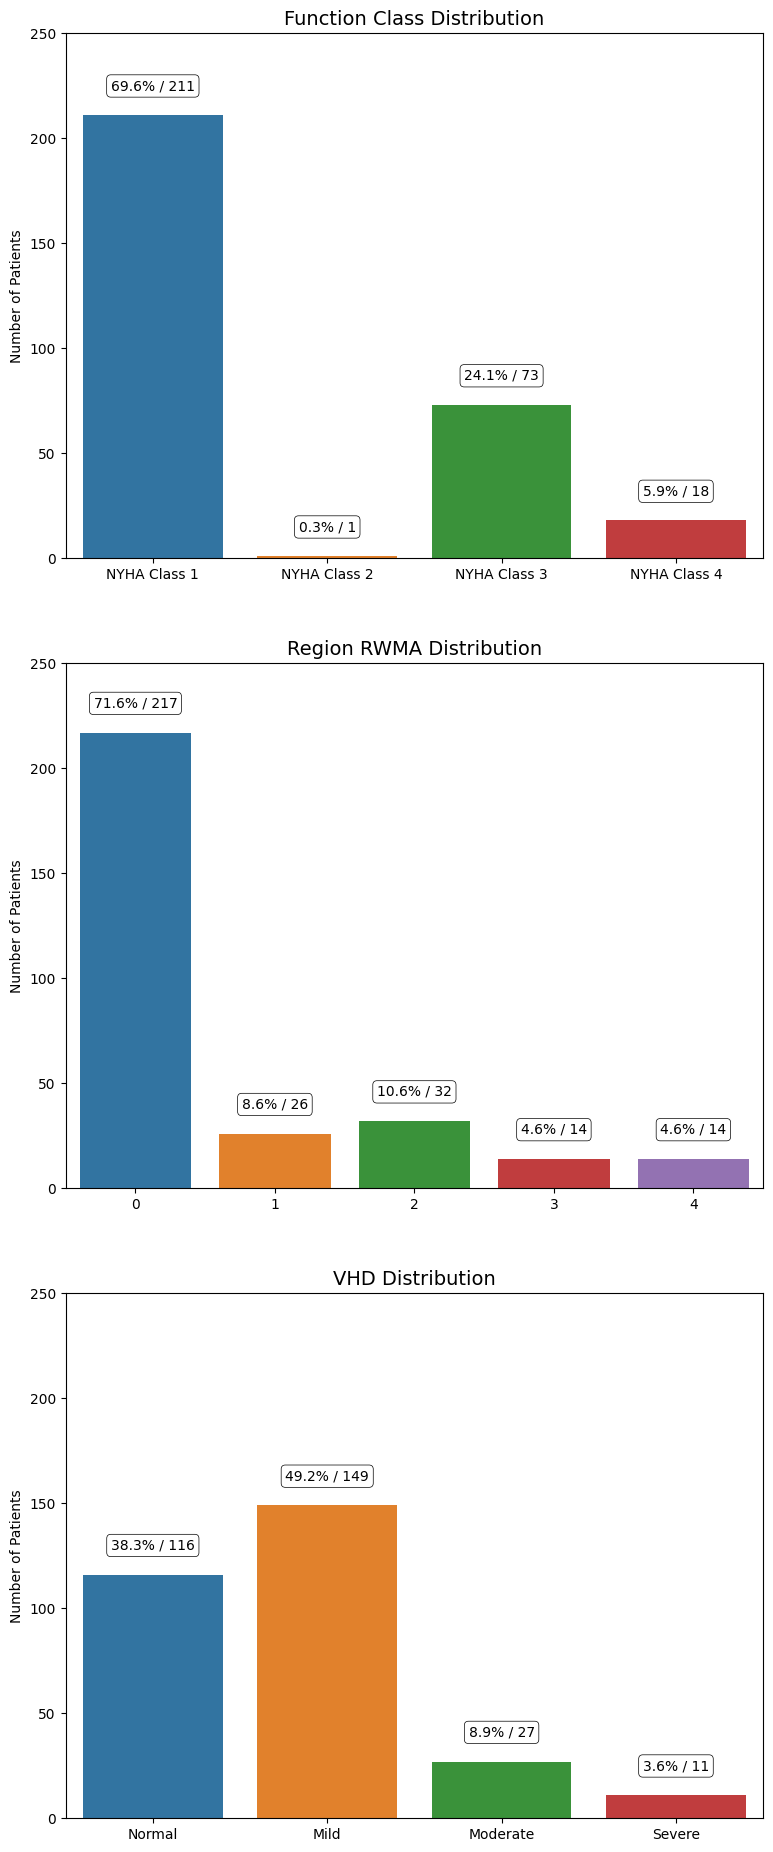

In [17]:
n_rows, n_cols = 3, 1

fig, ax = plt.subplots(n_rows, n_cols, figsize=(9,15))

for i, ord_col in enumerate(ord_cols):
    i, j = i//n_cols, i%n_cols
    rects = sns.countplot(x=ord_col, data=data, ax=ax[i])
    
    for rect in rects.patches:
        height = rect.get_height()
        ax[i].text(rect.get_x()+rect.get_width()/2., height+12, "{:1.1f}% / {:d}".format(height/len(data)*100, height.astype(int)), ha='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
    ax[i].set_title(f'{ord_col} Distribution', fontsize=14)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Number of Patients")
    ax[i].set_ylim([0, 250])
    
ax[0].set_xticklabels(['NYHA Class 1', 'NYHA Class 2', 'NYHA Class 3', 'NYHA Class 4'])
ax[2].set_xticklabels(['Normal', 'Mild', 'Moderate', 'Severe'])

fig.subplots_adjust(top=1.3)
fig.show()

Also we can see the class imbalance problem in the ordinal variables.

## Numerical Variables

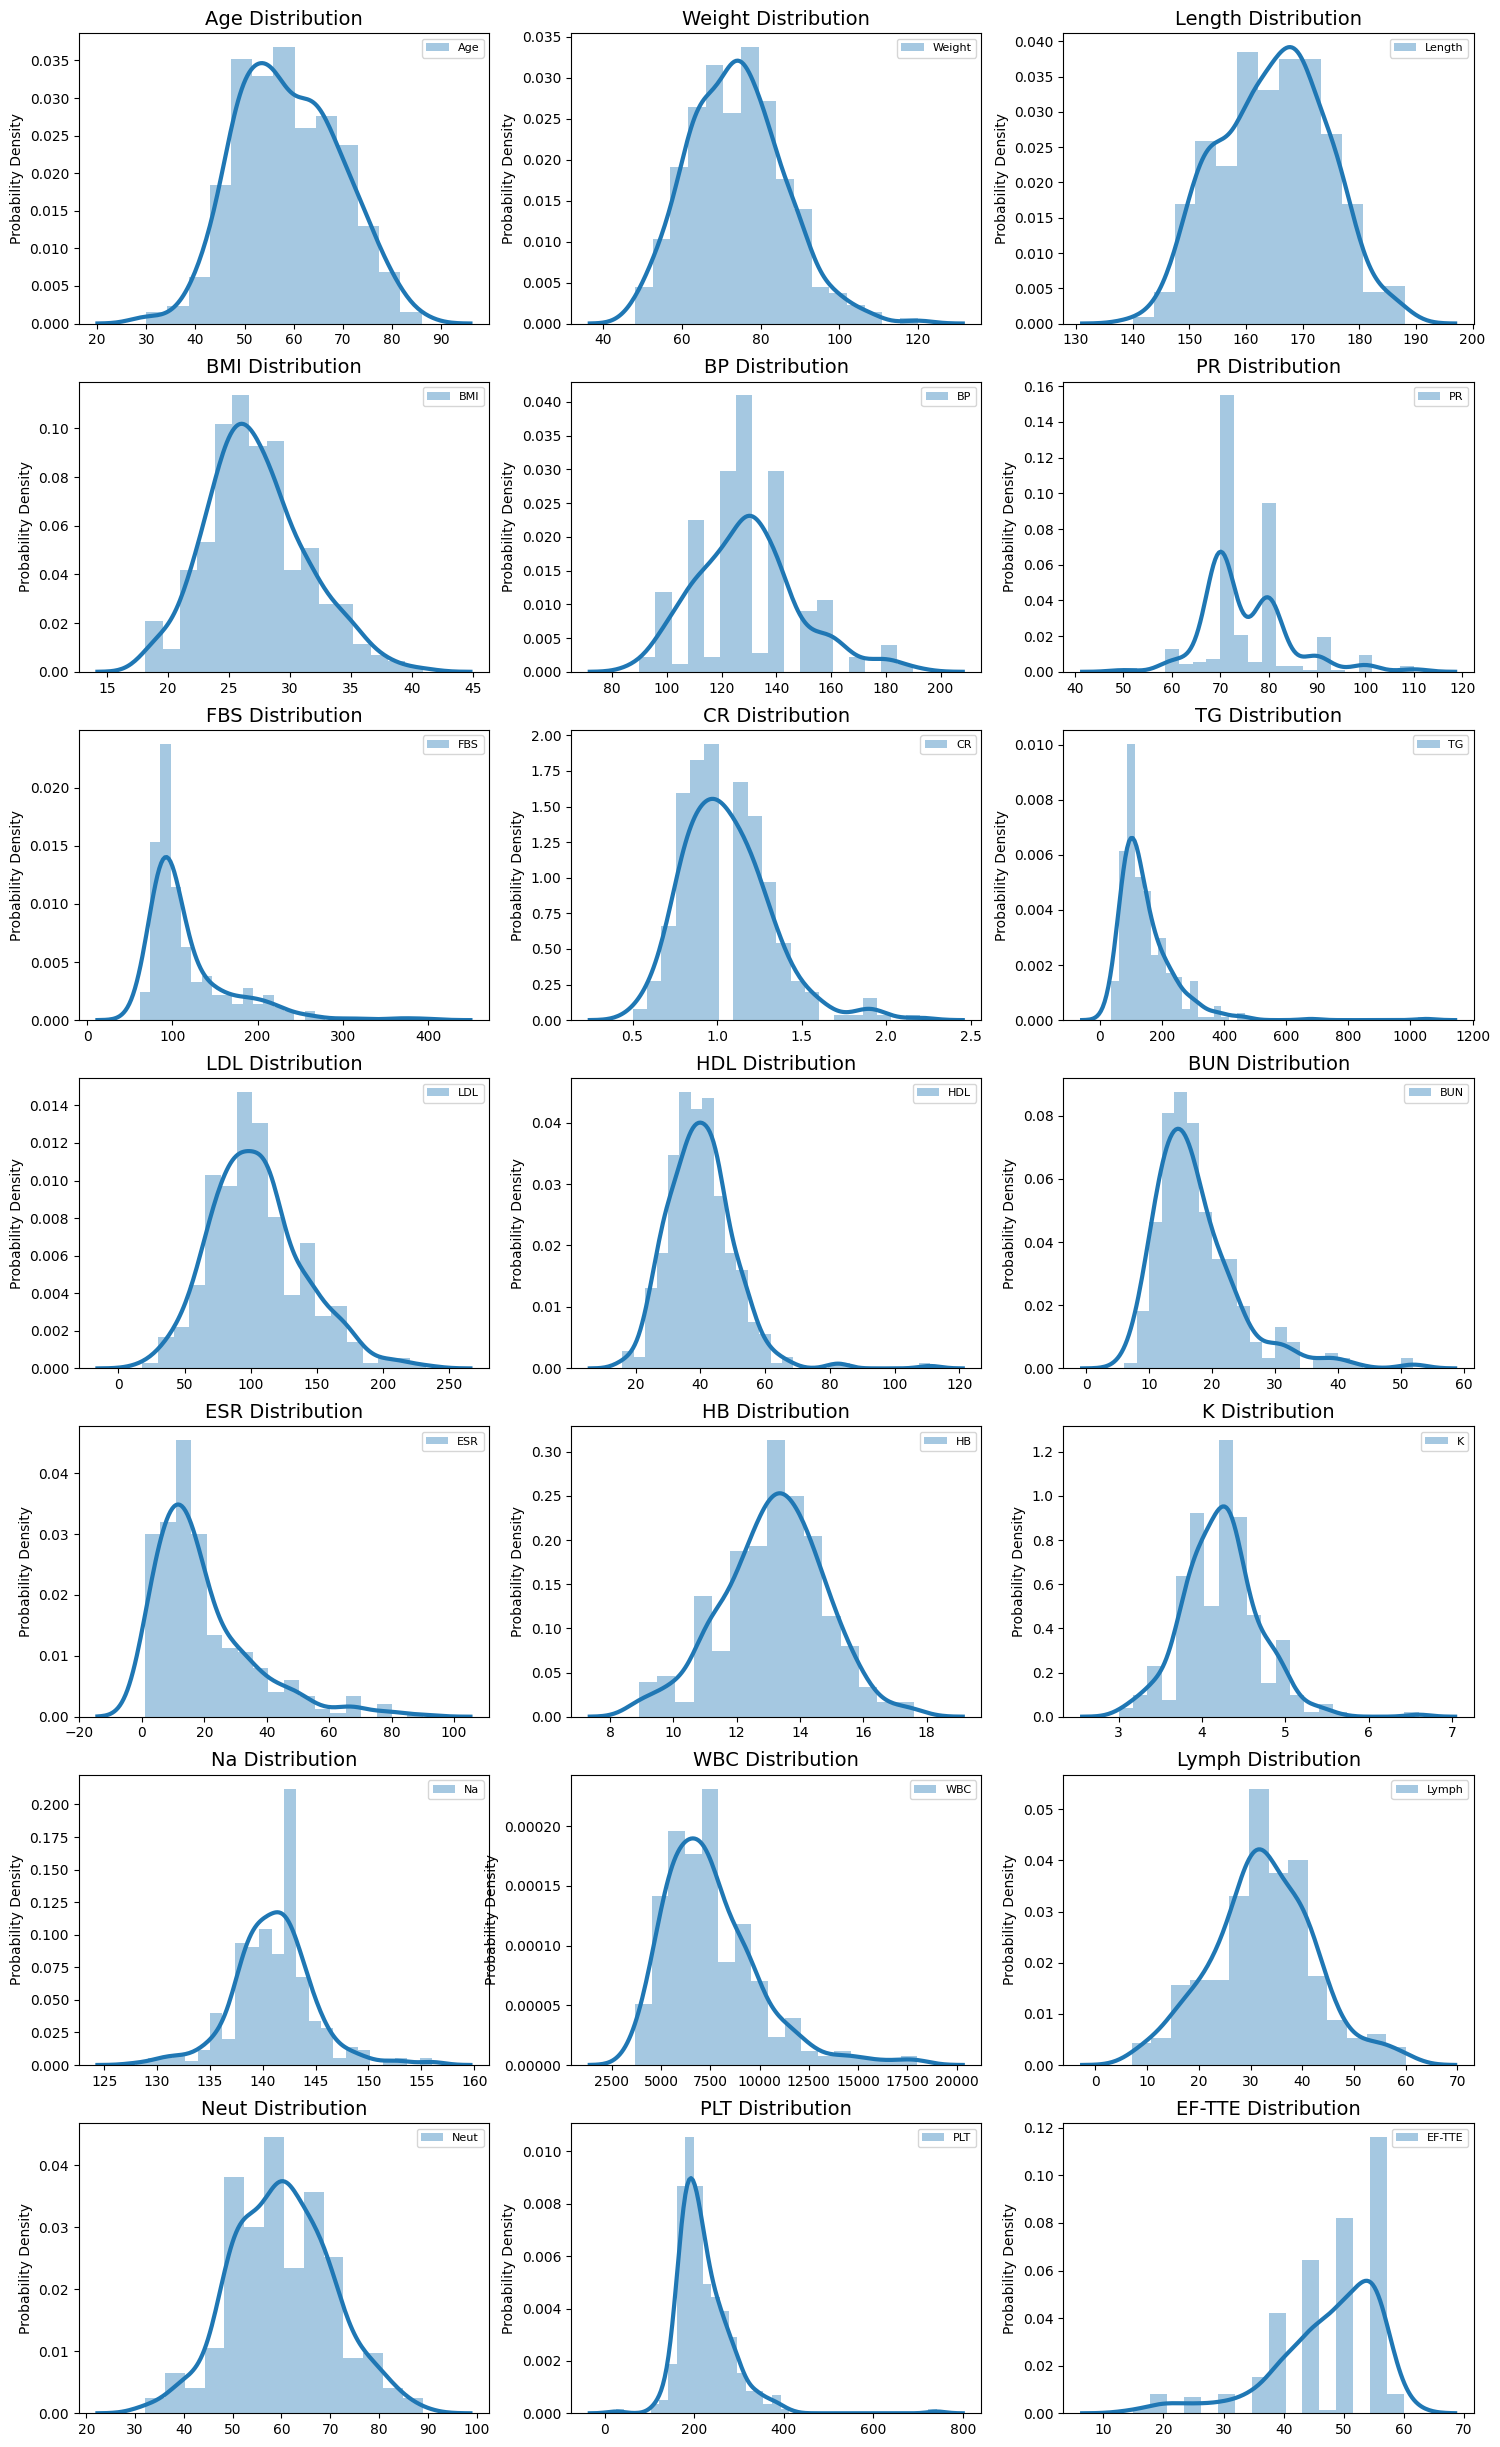

In [18]:
n_rows, n_cols = 7, 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(18,20))

for i, num_col in enumerate(num_cols):
    i, j = i//n_cols, i%n_cols
    
    figure = sns.distplot(data[num_col], label=num_col, norm_hist=True, ax=ax[i,j], kde_kws={"lw":3})
    figure = figure.legend(loc='best', fontsize=8)
        
    ax[i,j].set_title(f'{num_col} Distribution', fontsize=14)
    ax[i,j].set_ylabel("Probability Density", fontsize="medium")
    ax[i,j].set_xlabel("")

fig.subplots_adjust(top=1.3)
fig.show()

Distribution of continuous features are not uniform, and has a certain skewness. Let's check outliers by plotting `boxplot`.

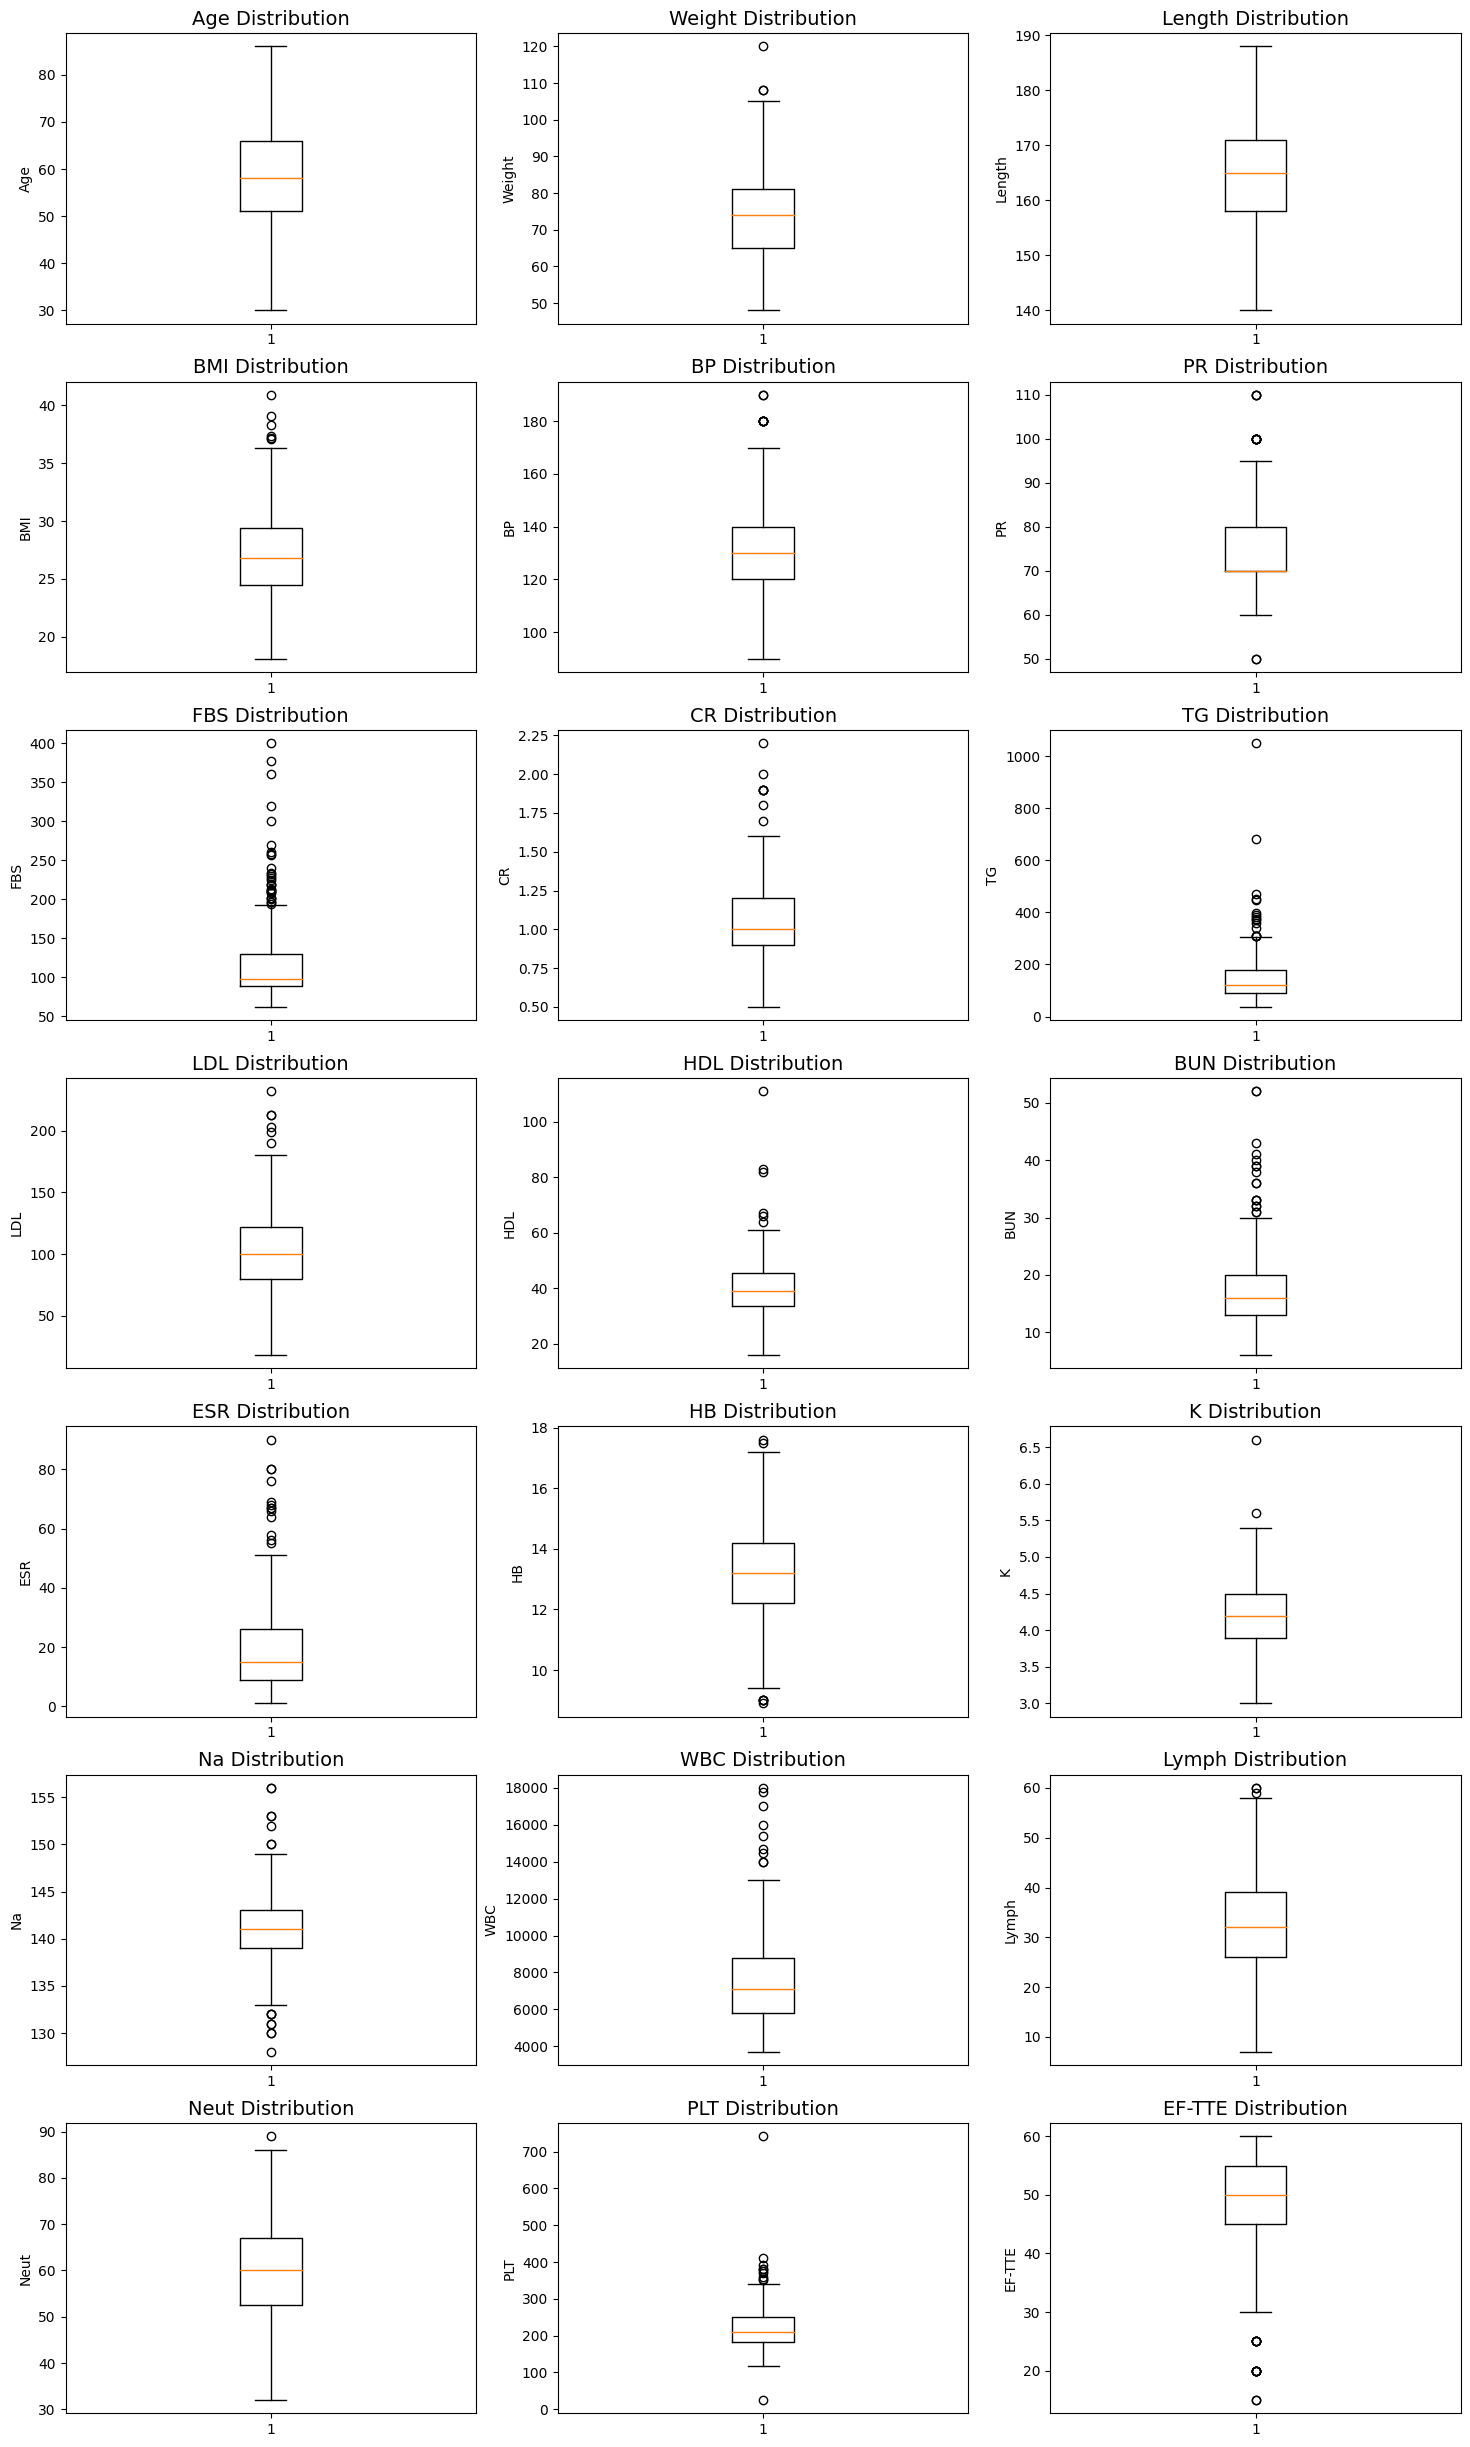

In [19]:
n_rows, n_cols = 7, 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(18,20))

for i, num_col in enumerate(num_cols):
    i, j = i//n_cols, i%n_cols
        
    ax[i,j].set_title(f'{num_col} Distribution', fontsize=14)
    ax[i,j].set_ylabel(f"{num_col}", fontsize="medium")
    ax[i,j].set_xlabel("")
    
    ax[i,j].boxplot(data[num_col])

fig.subplots_adjust(top=1.3)
fig.show()

Feature `BMI`, `FBS`, `CR`, `TG`, `ESR`, `Na`, `WBC`, `PLT` have a lot of outliers.

# 2.3 - Bivariate Analysis

# 2.3.1 - Categorical Variables

In [20]:
cat_cols = ['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain','Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion','LVH', 'Poor R Progression', 'Cath']

# Patient Characteristics (4)
cat_cols_char = ['Sex', 'Current Smoker', 'EX-Smoker', 'FH']

# Underlying disease (9)
cat_cols_dz = ['DM', 'HTN', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP']

# Physical exam (5)
cat_cols_pe = ['Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur']

# Symptoms (6)
cat_cols_sx = ['Typical Chest Pain', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang']

# ECG Data (6)
cat_cols_ecg = ['Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression']

df = data.copy()
df["Cath_binary"] = df["Cath"].apply(lambda x: 1 if x=="Cad" else 0)

We will divide categorical variables into five groups:

1. Patient Characteristics
2. Underlying disease
3. Physical exam
4. Symptoms
5. ECG Data

To compare number of CAD cases between `Features`=0 and `Features`=1, I made `Cath_binary` variable.

## Patient Characteristics vs CAD

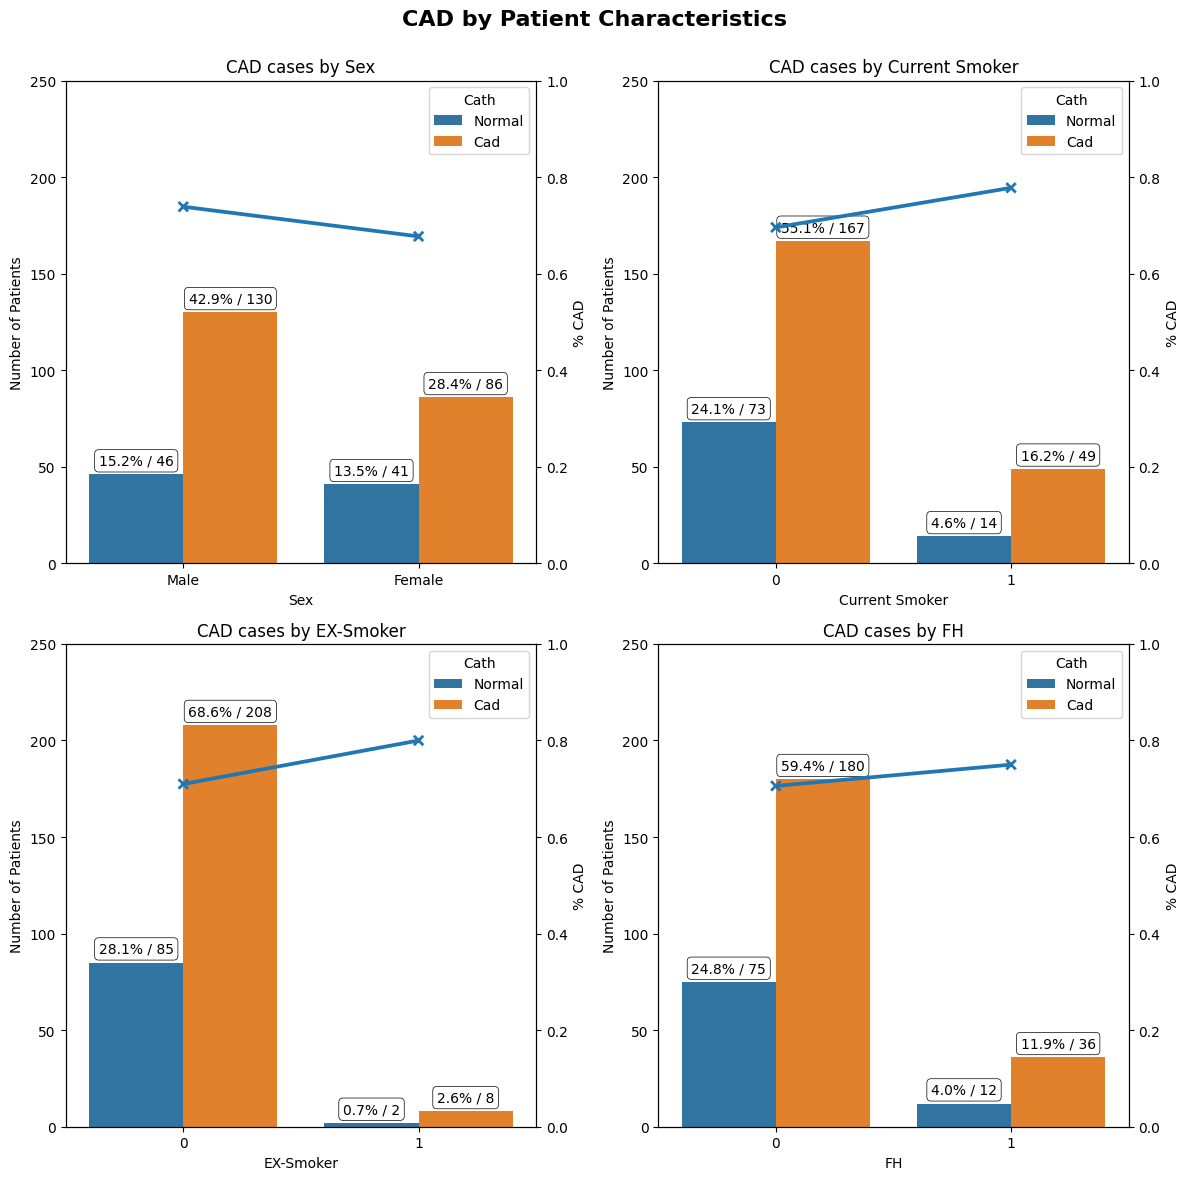

In [21]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
fig.suptitle("CAD by Patient Characteristics\n", fontsize=16, fontweight='bold')

for i, col in enumerate(cat_cols_char):
    i, j = i//n_cols, i%n_cols
    ax = axes[i][j]
    
    rects = sns.countplot(x=col, hue="Cath", hue_order=['Normal', 'Cad'], data=df, ax=ax)
    
    for rect in rects.patches:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., height+5, "{:1.1f}% / {:d}".format(height/len(data)*100, height.astype(int)),ha='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        
    ax.set_xlabel(col)
    ax.set_ylabel("Number of Patients", fontsize="medium")
    ax.set_ylim([0,250])
    ax.set_title(f'CAD cases by {col}', fontsize=12)
    
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=col, y="Cath_binary", data=df, markers='x', ax=ax2, errorbar=None)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel("% CAD", color='black')

fig.tight_layout()
fig.show()

- `Sex`=Male, `Current smoker`=1, `Ex-Smoker`=1, and `FH`=1 group have more CAD cases than the opposite.

## Underlying Disease vs CAD

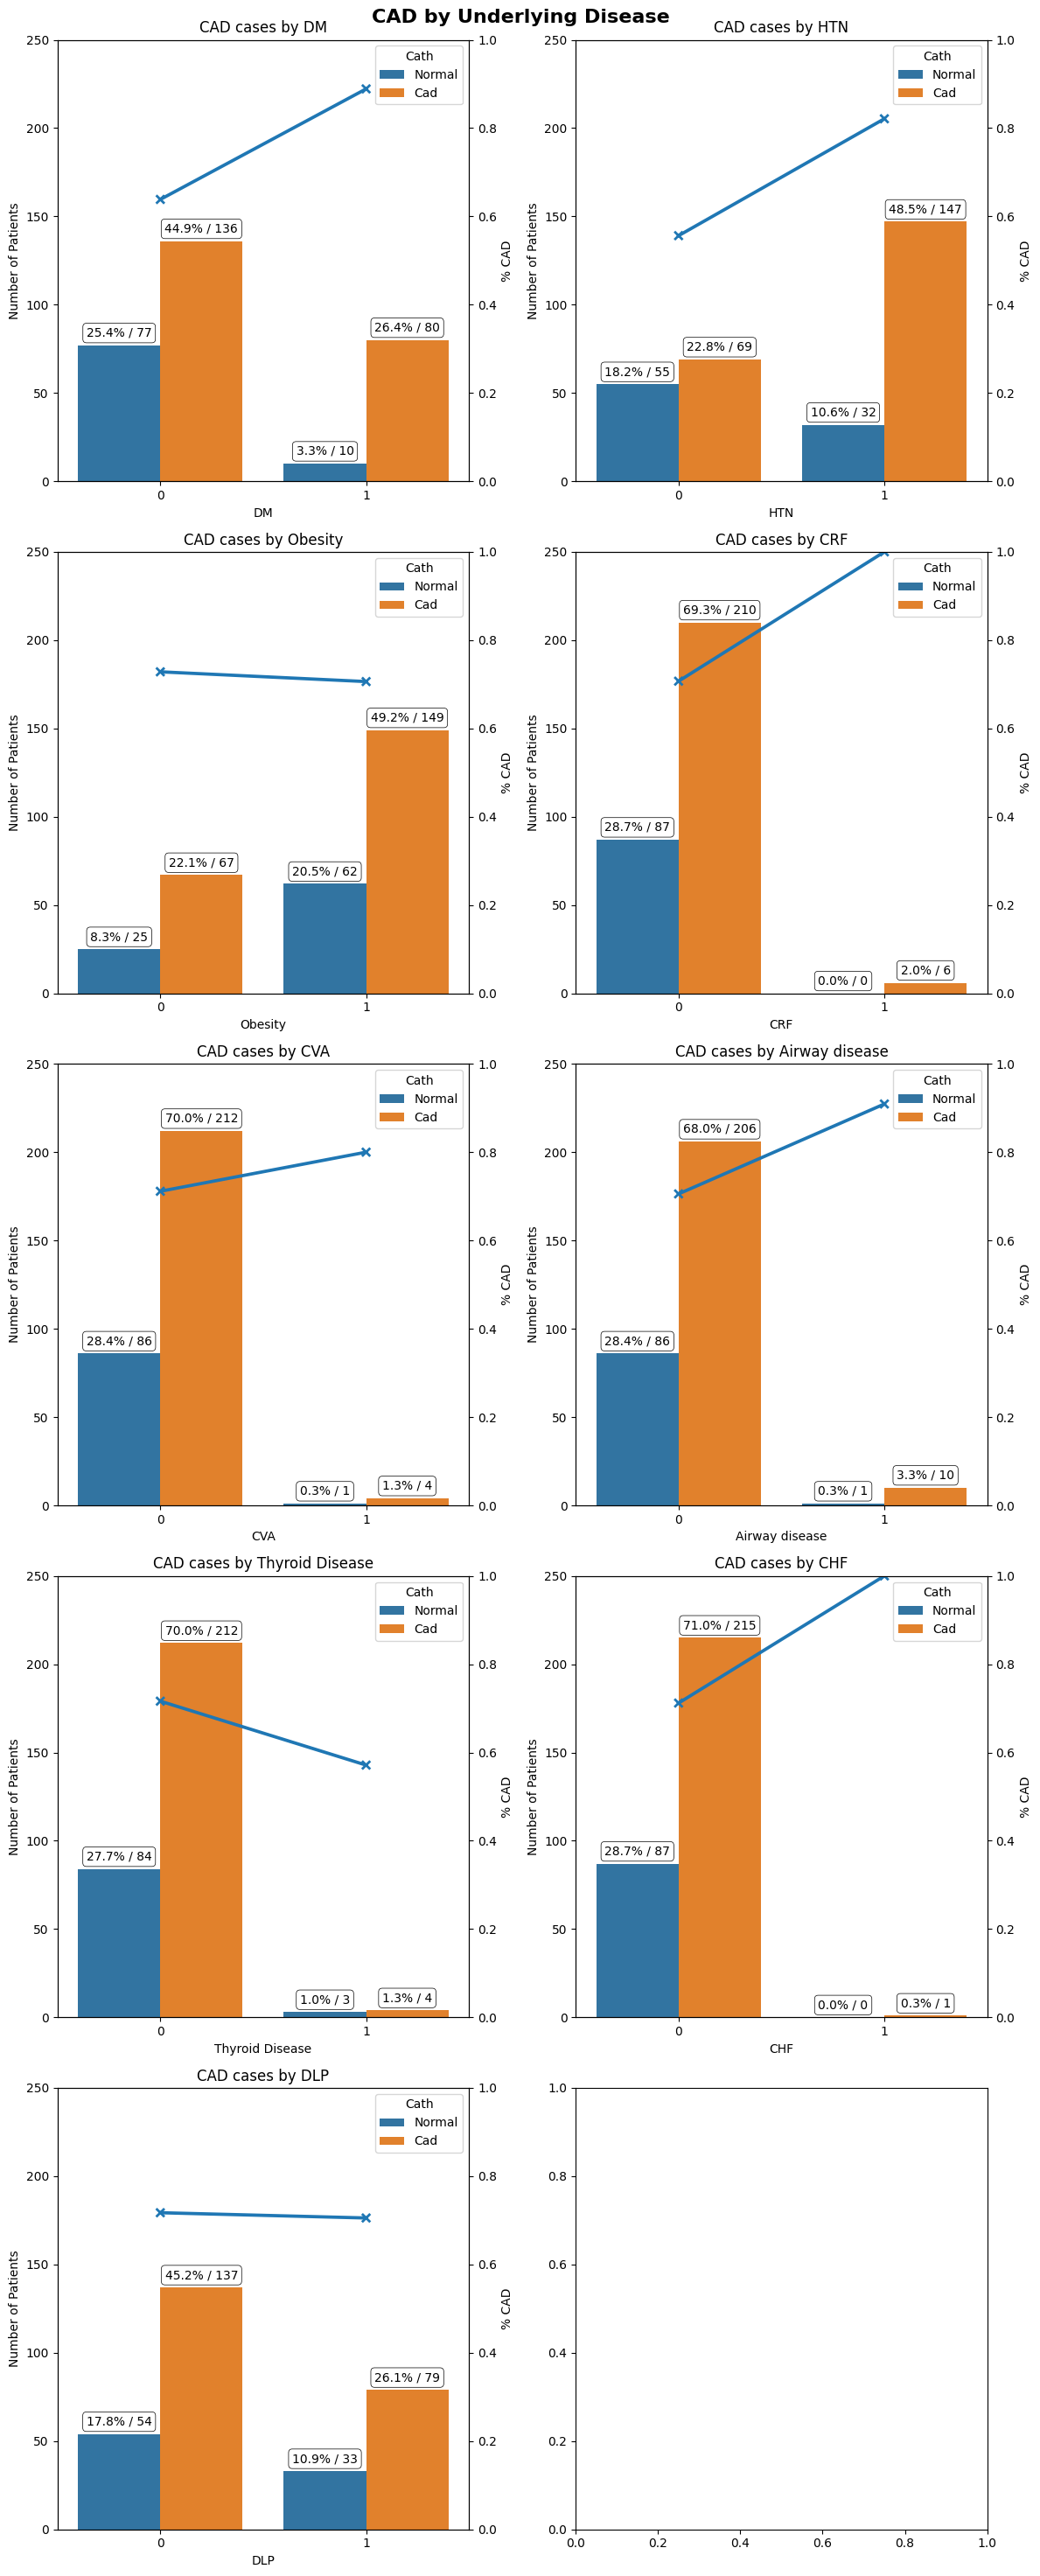

In [22]:
n_rows, n_cols = 5, 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 30))
fig.suptitle("CAD by Underlying Disease\n", fontsize=16, fontweight='bold')

for i, col in enumerate(cat_cols_dz):
    i, j = i//n_cols, i%n_cols
    ax = axes[i][j]
    
    rects = sns.countplot(x=col, hue="Cath", hue_order=['Normal', 'Cad'], data=df, ax=ax)
    
    for rect in rects.patches:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., height+5, "{:1.1f}% / {:d}".format(height/len(data)*100, height.astype(int)),ha='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        
    ax.set_xlabel(col)
    ax.set_ylabel("Number of Patients", fontsize="medium")
    ax.set_ylim([0,250])
    ax.set_title(f'CAD cases by {col}', fontsize=12)
    
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=col, y="Cath_binary", data=df, markers='x', ax=ax2, errorbar=None)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel("% CAD", color='black')

fig.tight_layout()
fig.show()

- `DM`=1, `HTN`=1, `CRF`=1, `CVA`=1, `Airway disease`=1, `CHF`=1 group have more CAD cases than the opposite.

- `Obesity`=1, `Thyroid disease`=1, `DLP`=1 group have less CAD cases than the opposite.

## Physical Exam vs CAD

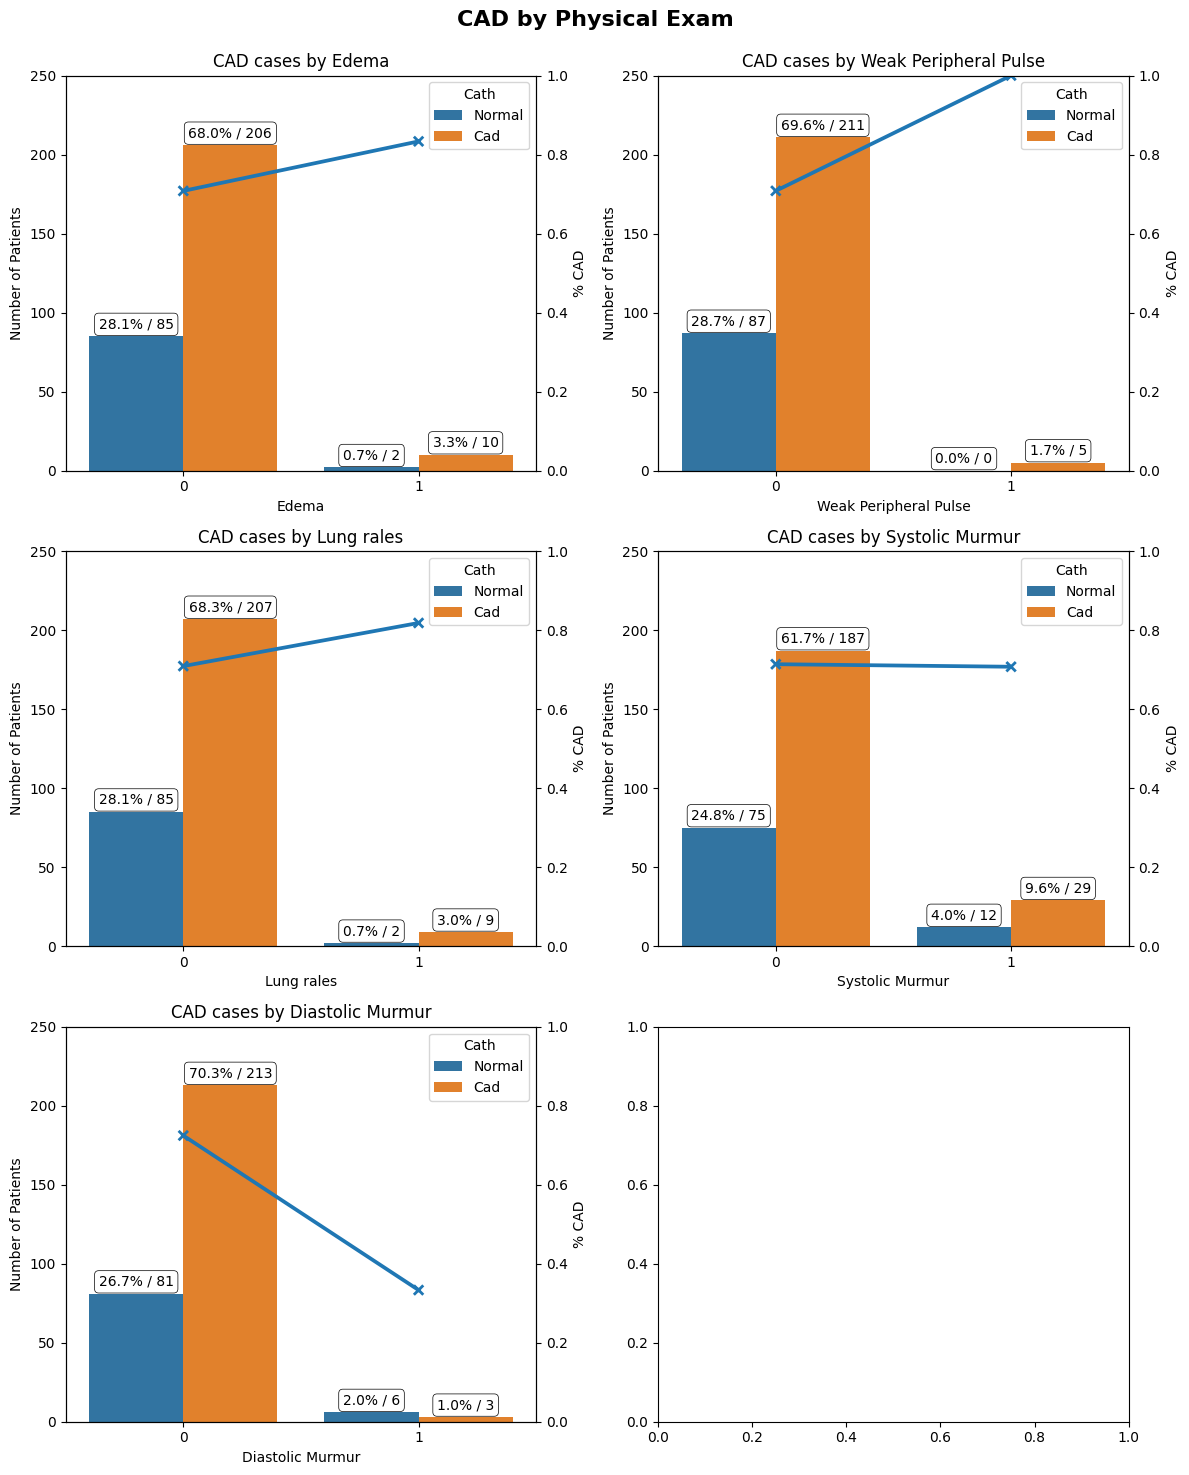

In [23]:
n_rows, n_cols = 3, 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 15))
fig.suptitle("CAD by Physical Exam\n", fontsize=16, fontweight='bold')

for i, col in enumerate(cat_cols_pe):
    i, j = i//n_cols, i%n_cols
    ax = axes[i][j]
    
    rects = sns.countplot(x=col, hue="Cath", hue_order=['Normal', 'Cad'], data=df, ax=ax)
    
    for rect in rects.patches:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., height+5, "{:1.1f}% / {:d}".format(height/len(data)*100, height.astype(int)),ha='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        
    ax.set_xlabel(col)
    ax.set_ylabel("Number of Patients", fontsize="medium")
    ax.set_ylim([0,250])
    ax.set_title(f'CAD cases by {col}', fontsize=12)
    
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=col, y="Cath_binary", data=df, markers='x', ax=ax2, errorbar=None)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel("% CAD", color='black')

fig.tight_layout()
fig.show()

- `Edema`=1, `Weak Peripheral Pulse`=1, and `Lung rales`=1 group have more CAD cases than the opposite.

- `Systolic murmur`=1 and`Diastolic murmur`=1 group have less CAD cases than the opposite.


## Symptoms vs CAD

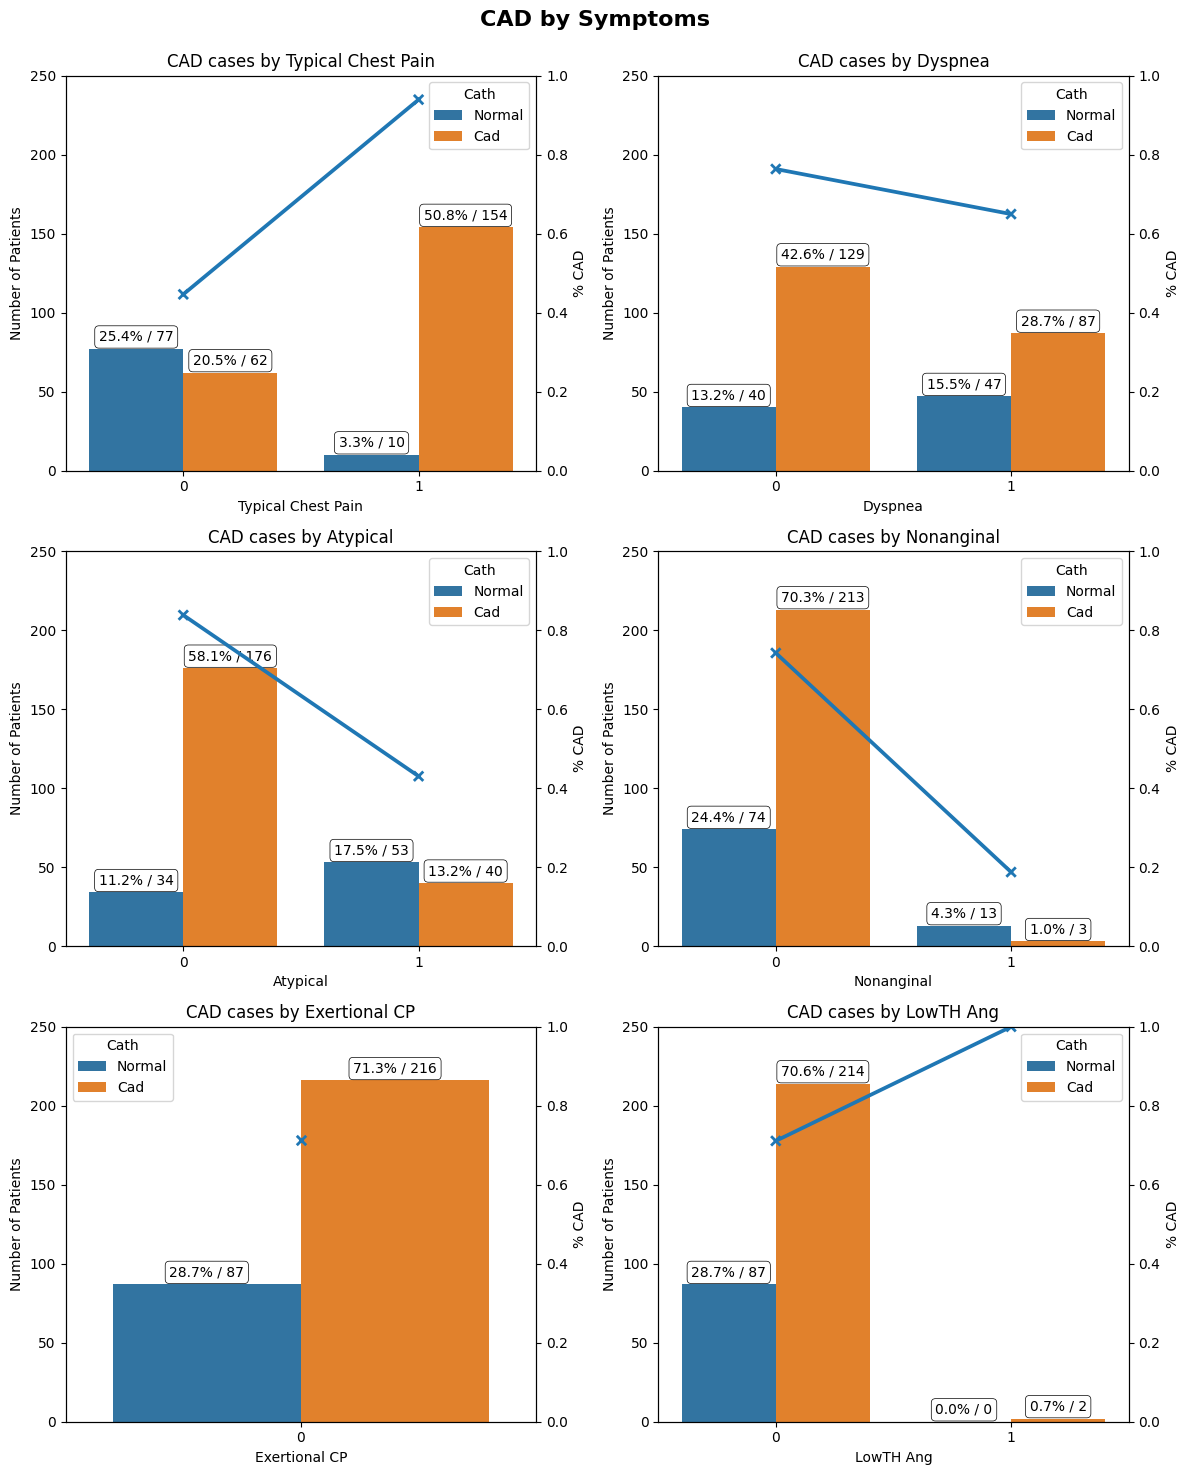

In [24]:
n_rows, n_cols = 3, 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 15))
fig.suptitle("CAD by Symptoms\n", fontsize=16, fontweight='bold')

for i, col in enumerate(cat_cols_sx):
    i, j = i//n_cols, i%n_cols
    ax = axes[i][j]
    
    rects = sns.countplot(x=col, hue="Cath", hue_order=['Normal', 'Cad'], data=df, ax=ax)
    
    for rect in rects.patches:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., height+5, "{:1.1f}% / {:d}".format(height/len(data)*100, height.astype(int)),ha='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        
    ax.set_xlabel(col)
    ax.set_ylabel("Number of Patients", fontsize="medium")
    ax.set_ylim([0,250])
    ax.set_title(f'CAD cases by {col}', fontsize=12)
    
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=col, y="Cath_binary", data=df, markers='x', ax=ax2, errorbar=None)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel("% CAD", color='black')

fig.tight_layout()
fig.show()

- `Typical Chest Pain`=1 and `LowTH Ang`=1 group have more CAD cases than the opposite.

- `Dyspnea`=1, `Atypical`=1, and `Nonanginal` group have less CAD cases than the opposite.

## ECG Data vs CAD

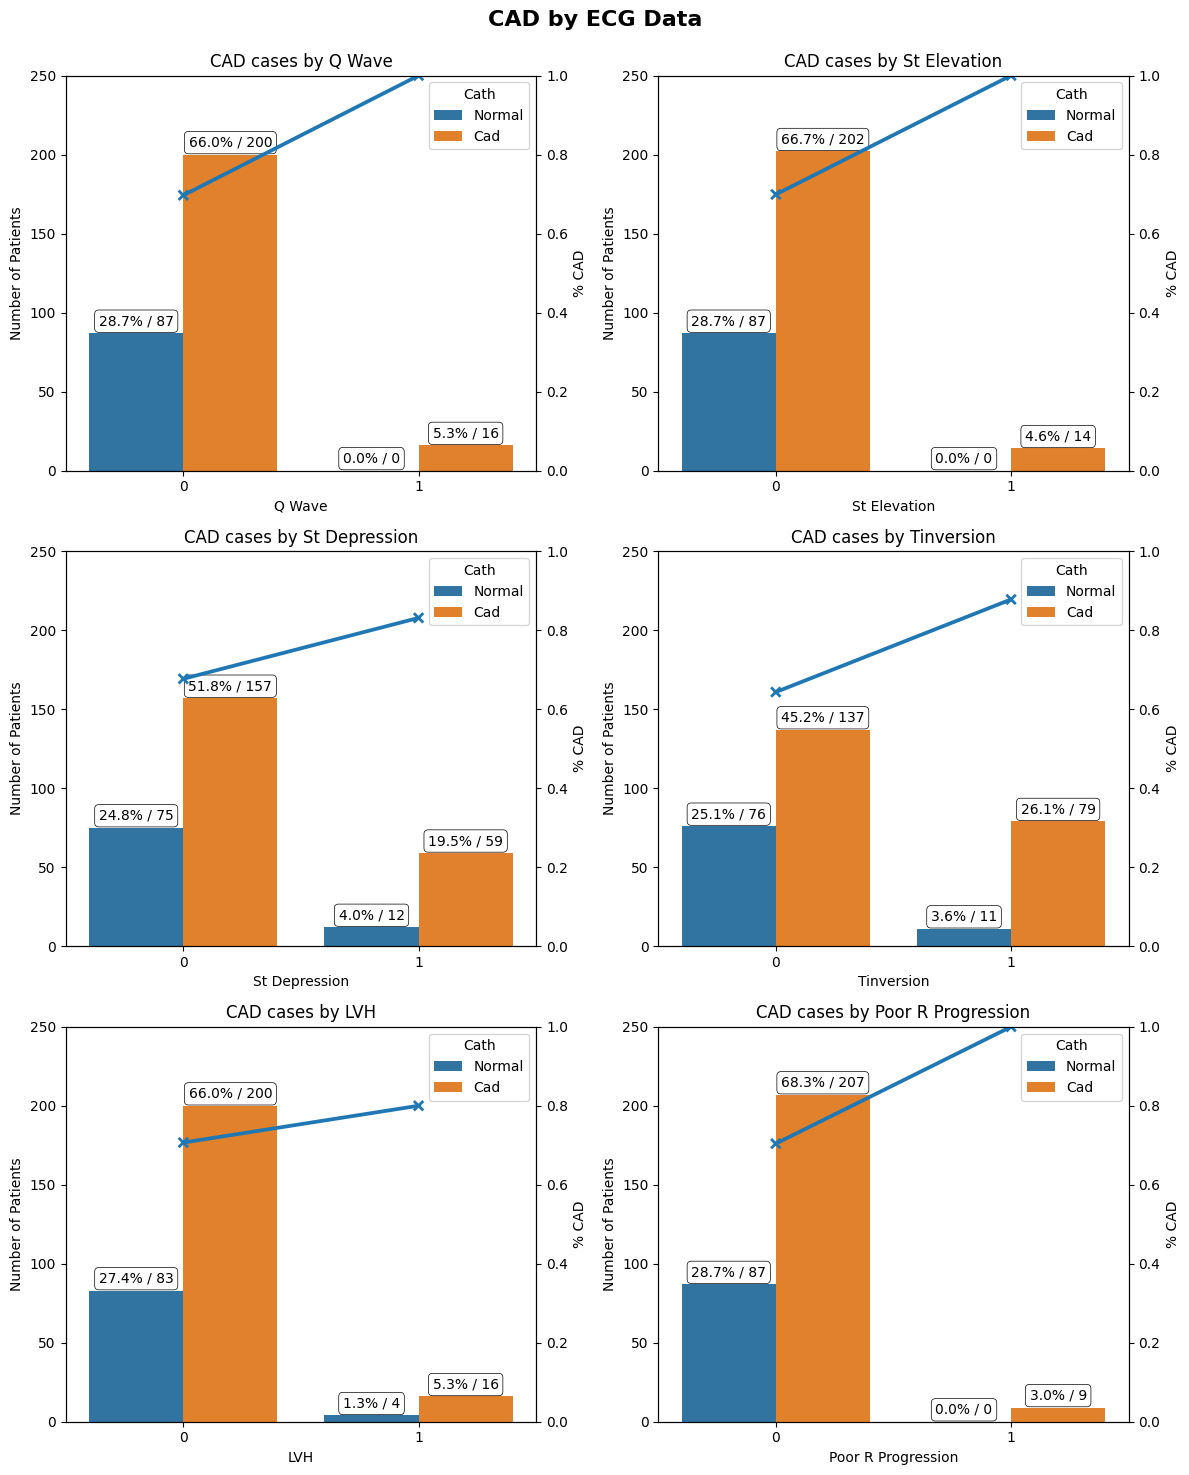

In [25]:
n_rows, n_cols = 3, 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 15))
fig.suptitle("CAD by ECG Data\n", fontsize=16, fontweight='bold')

for i, col in enumerate(cat_cols_ecg):
    i, j = i//n_cols, i%n_cols
    ax = axes[i][j]
    
    rects = sns.countplot(x=col, hue="Cath", hue_order=['Normal', 'Cad'], data=df, ax=ax)
    
    for rect in rects.patches:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., height+5, "{:1.1f}% / {:d}".format(height/len(data)*100, height.astype(int)),ha='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        
    ax.set_xlabel(col)
    ax.set_ylabel("Number of Patients", fontsize="medium")
    ax.set_ylim([0,250])
    ax.set_title(f'CAD cases by {col}', fontsize=12)
    
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=col, y="Cath_binary", data=df, markers='x', ax=ax2, errorbar=None)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel("% CAD", color='black')

fig.tight_layout()
fig.show()

- `Q wave`=1, `St elevation`=1, `St Depression`=1, `Tinversion`=1, `LVH`=1, and `Poor R Progression`=1 group have more CAD cases than the opposite. (All ECG Abnormalities)

# 2.3.2 - Ordinal Variables

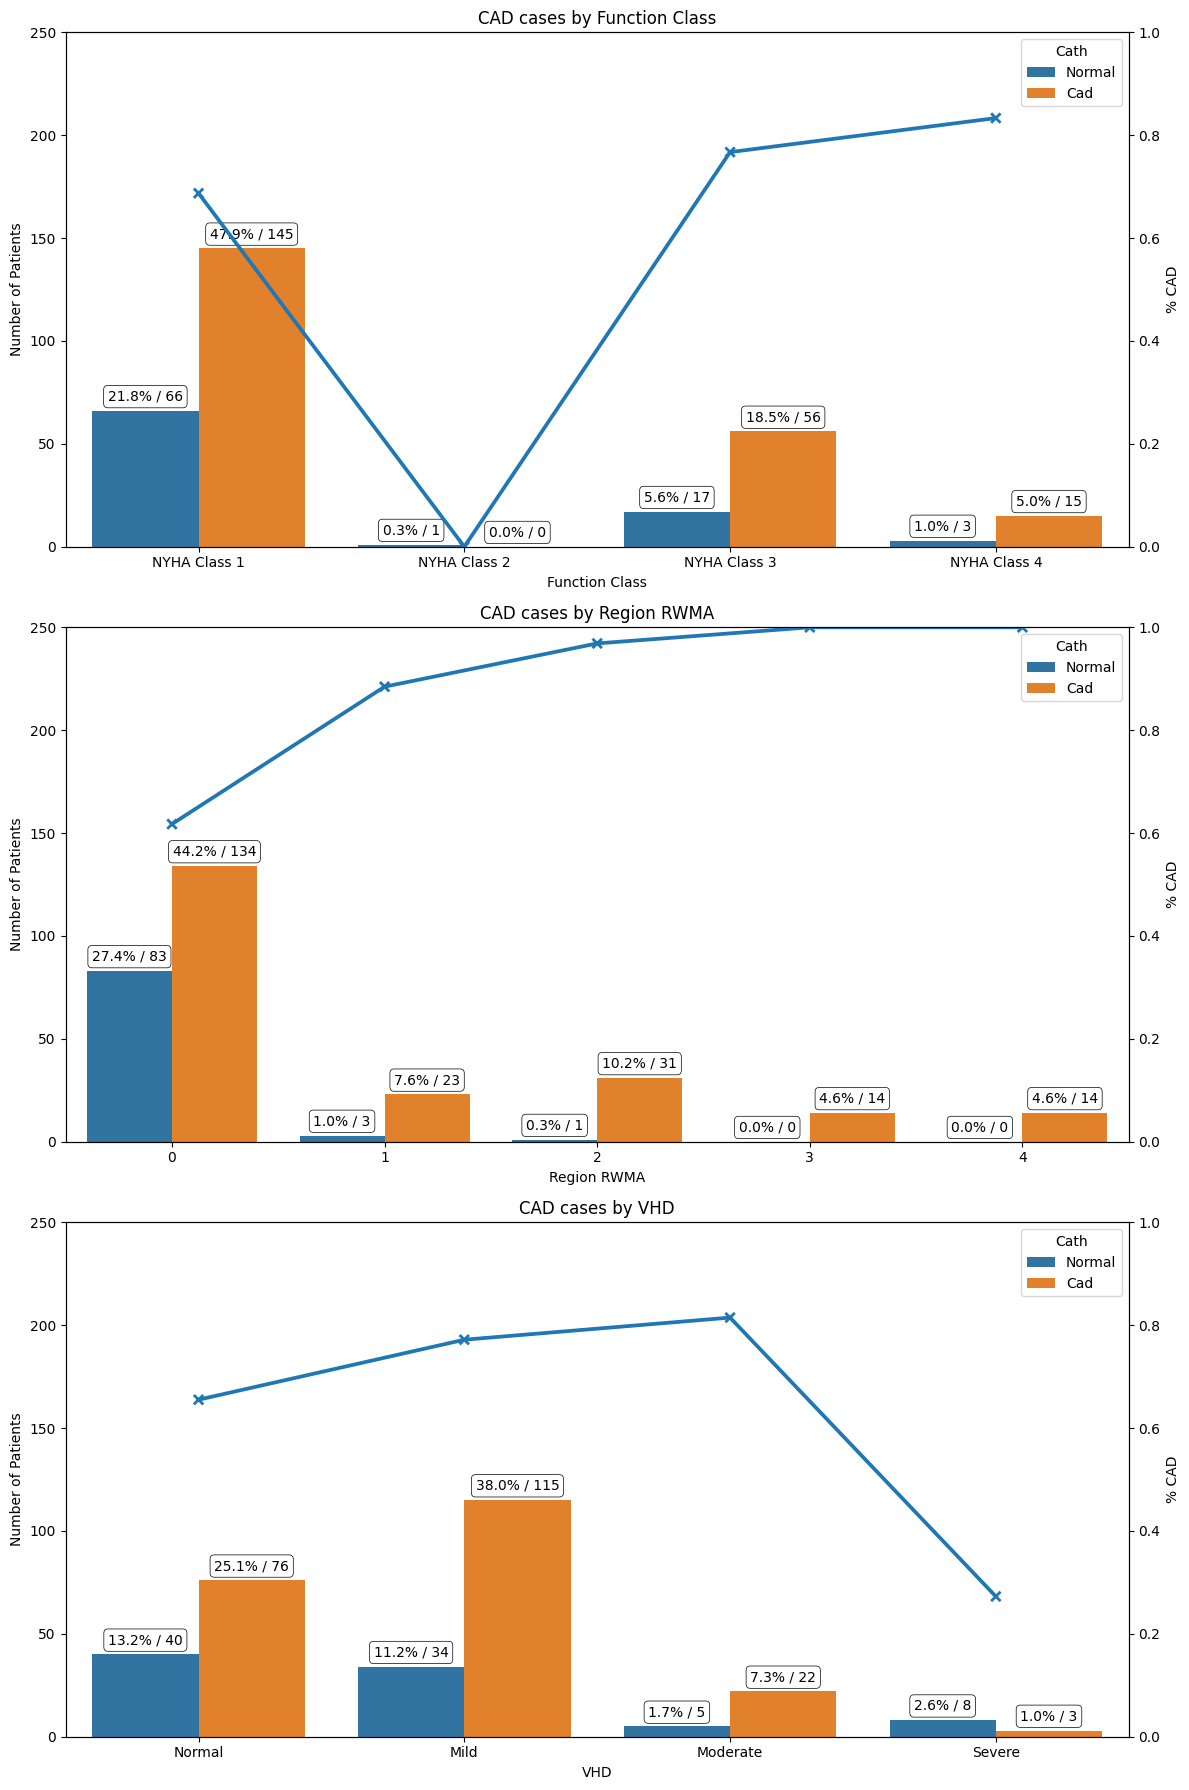

In [26]:
ord_cols = ['Function Class', "Region RWMA", "VHD"]

n_rows, n_cols = 3, 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 18))

for i, col in enumerate(ord_cols):
    i, j = i//n_cols, i%n_cols
    ax = axes[i]
    
    rects = sns.countplot(x=col, hue="Cath", hue_order=['Normal', 'Cad'], data=df, ax=ax)
    
    for rect in rects.patches:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., height+5, "{:1.1f}% / {:d}".format(height/len(data)*100, height.astype(int)),ha='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        
    ax.set_xlabel(col)
    ax.set_ylabel("Number of Patients", fontsize="medium")
    ax.set_ylim([0,250])
    ax.set_title(f'CAD cases by {col}', fontsize=12)
    
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=col, y="Cath_binary", data=df, markers='x', ax=ax2, errorbar=None)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel("% CAD", color='black')
    
axes[0].set_xticklabels(['NYHA Class 1', 'NYHA Class 2', 'NYHA Class 3', 'NYHA Class 4'])
axes[2].set_xticklabels(['Normal', 'Mild', 'Moderate', 'Severe'])

fig.tight_layout()
fig.show()

- `Function Class`, `Regional RWMA` and `VHD` have positive correlation with target variables `Cath`.

# 2.3.3 - Numerical Variables

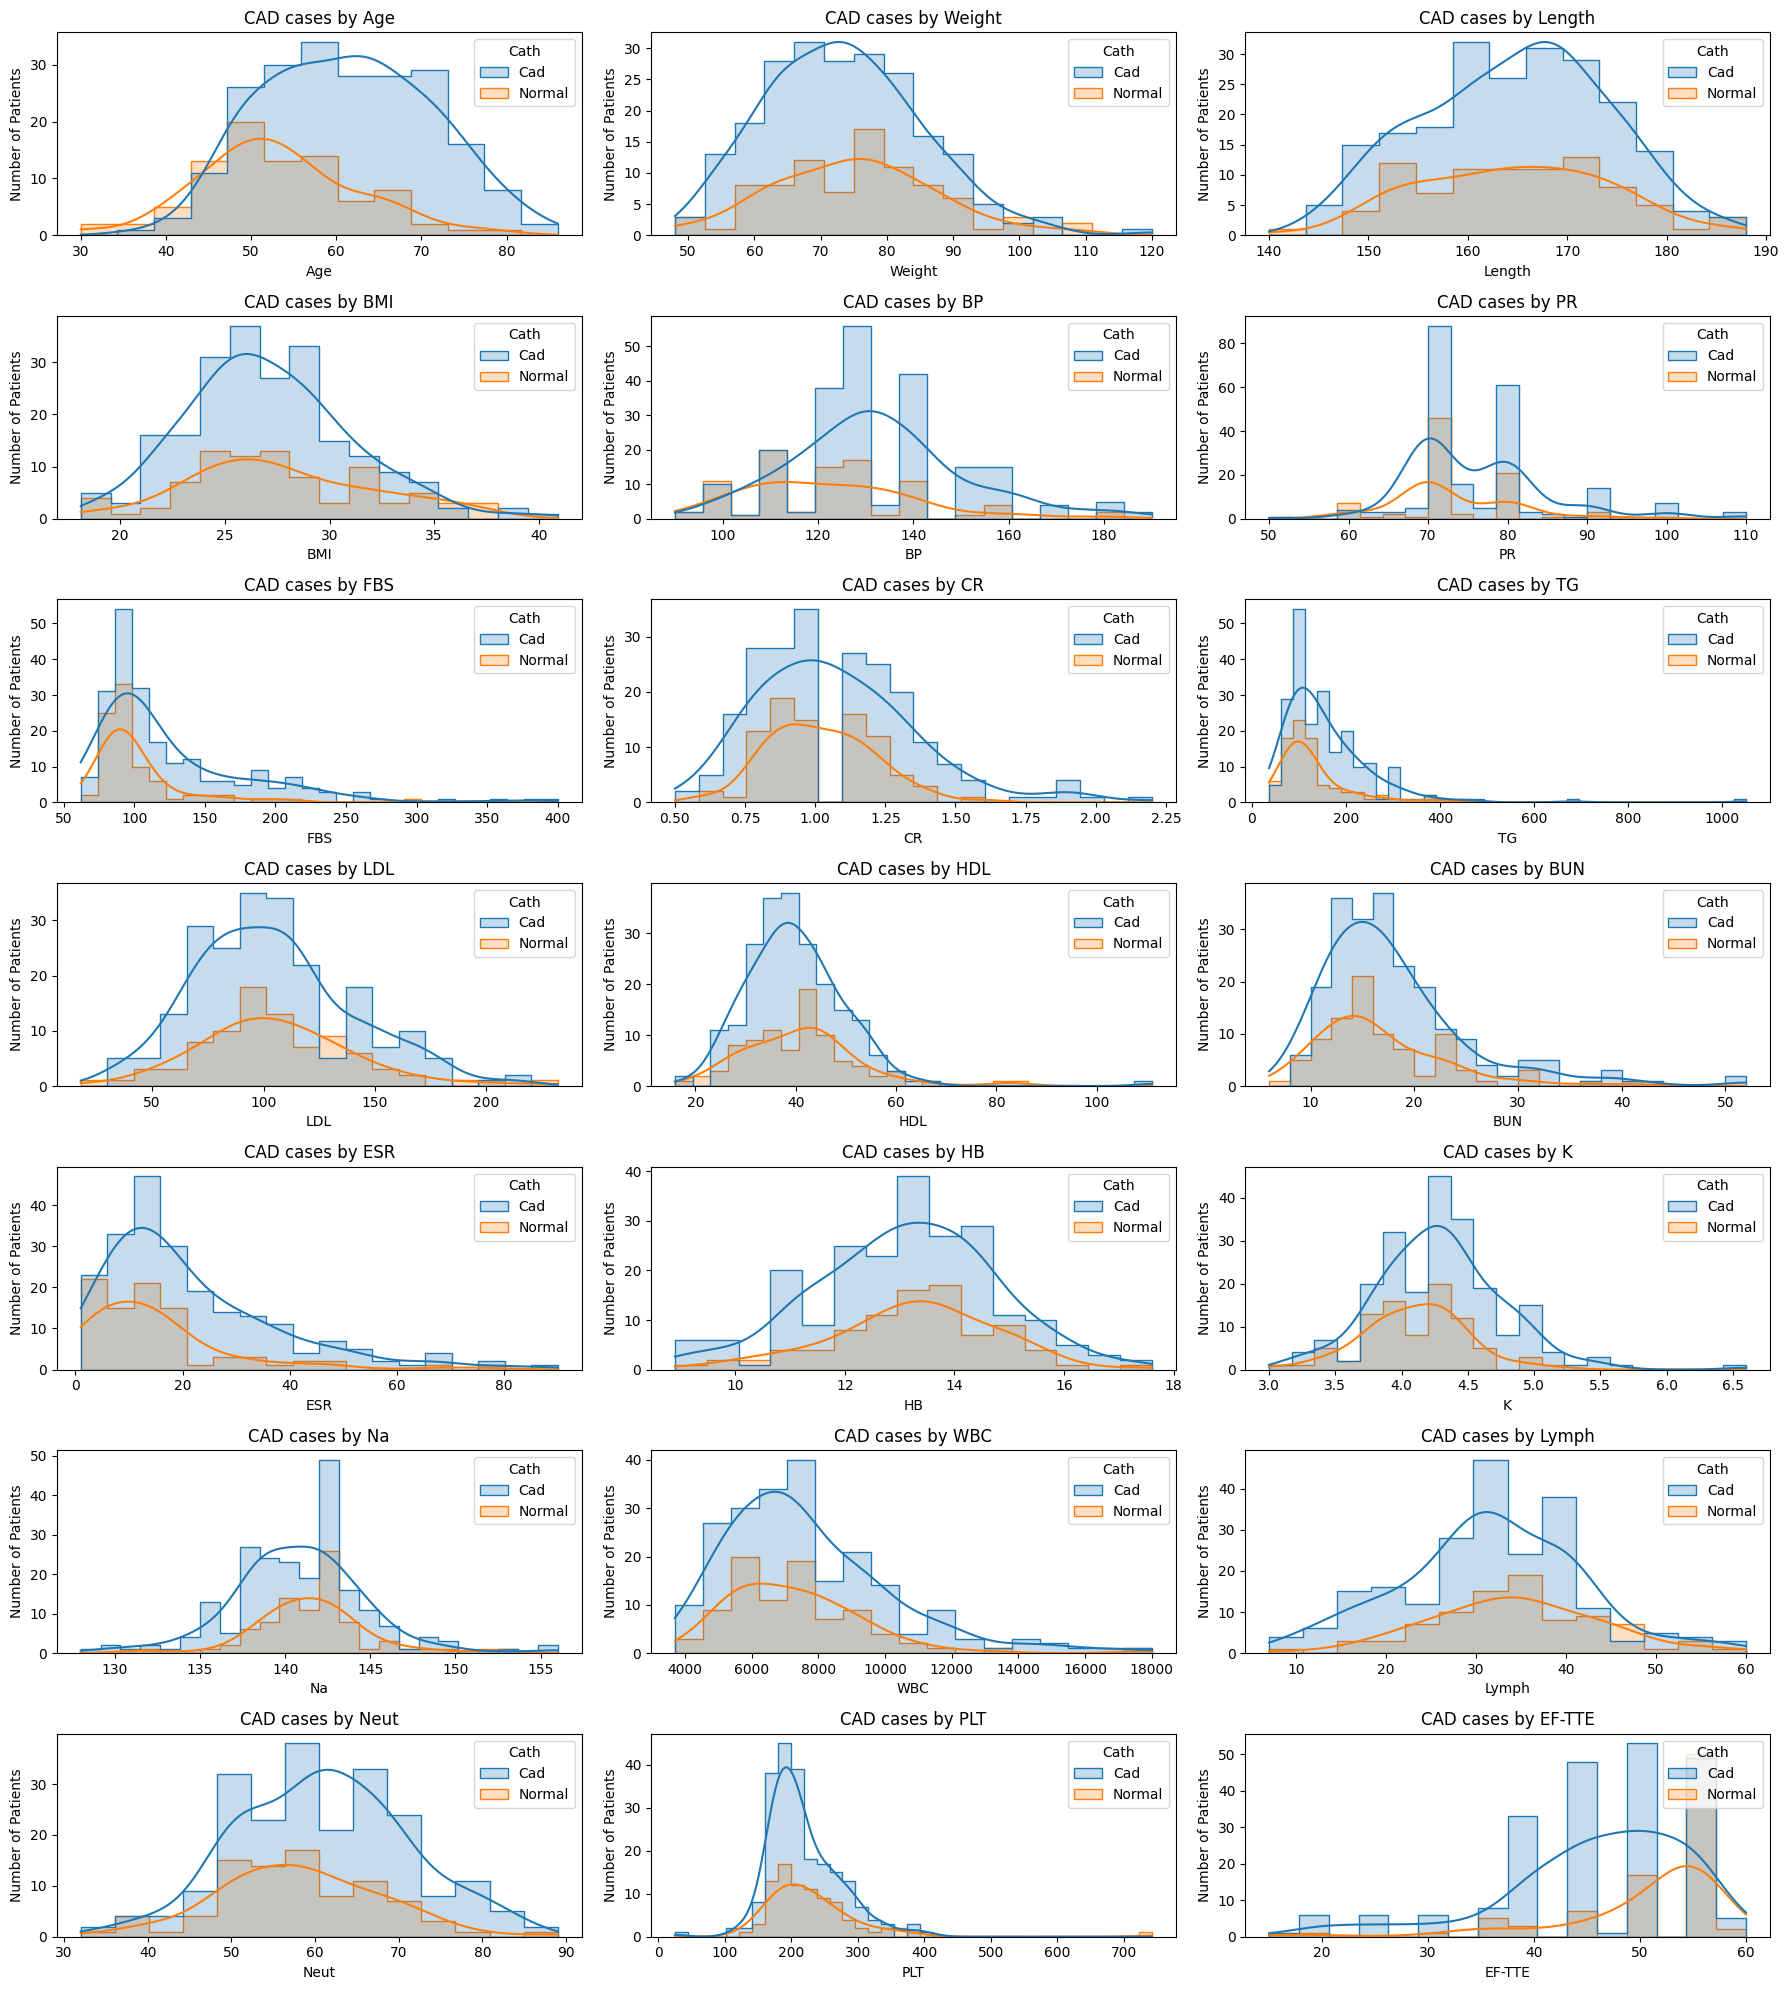

In [27]:
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE']

n_rows, n_cols = 7, 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20))

for i, col in enumerate(num_cols):
    i, j = i//n_cols, i%n_cols
    ax = axes[i][j]
    
    #sns.set_style("darkgrid")
    ax = sns.histplot(data=data, x=col, hue="Cath", kde=True, ax=ax, element="step")
        
    ax.set_xlabel(col)
    ax.set_ylabel("Number of Patients", fontsize="medium")
    #ax.set_ylim([0,100])
    ax.set_title(f'CAD cases by {col}', fontsize=12)
    

fig.tight_layout()
fig.show()

There is some distribution difference between `Cad` group and `Normal` group. Let's plot `boxplot` to compare more easily and detect outliers.

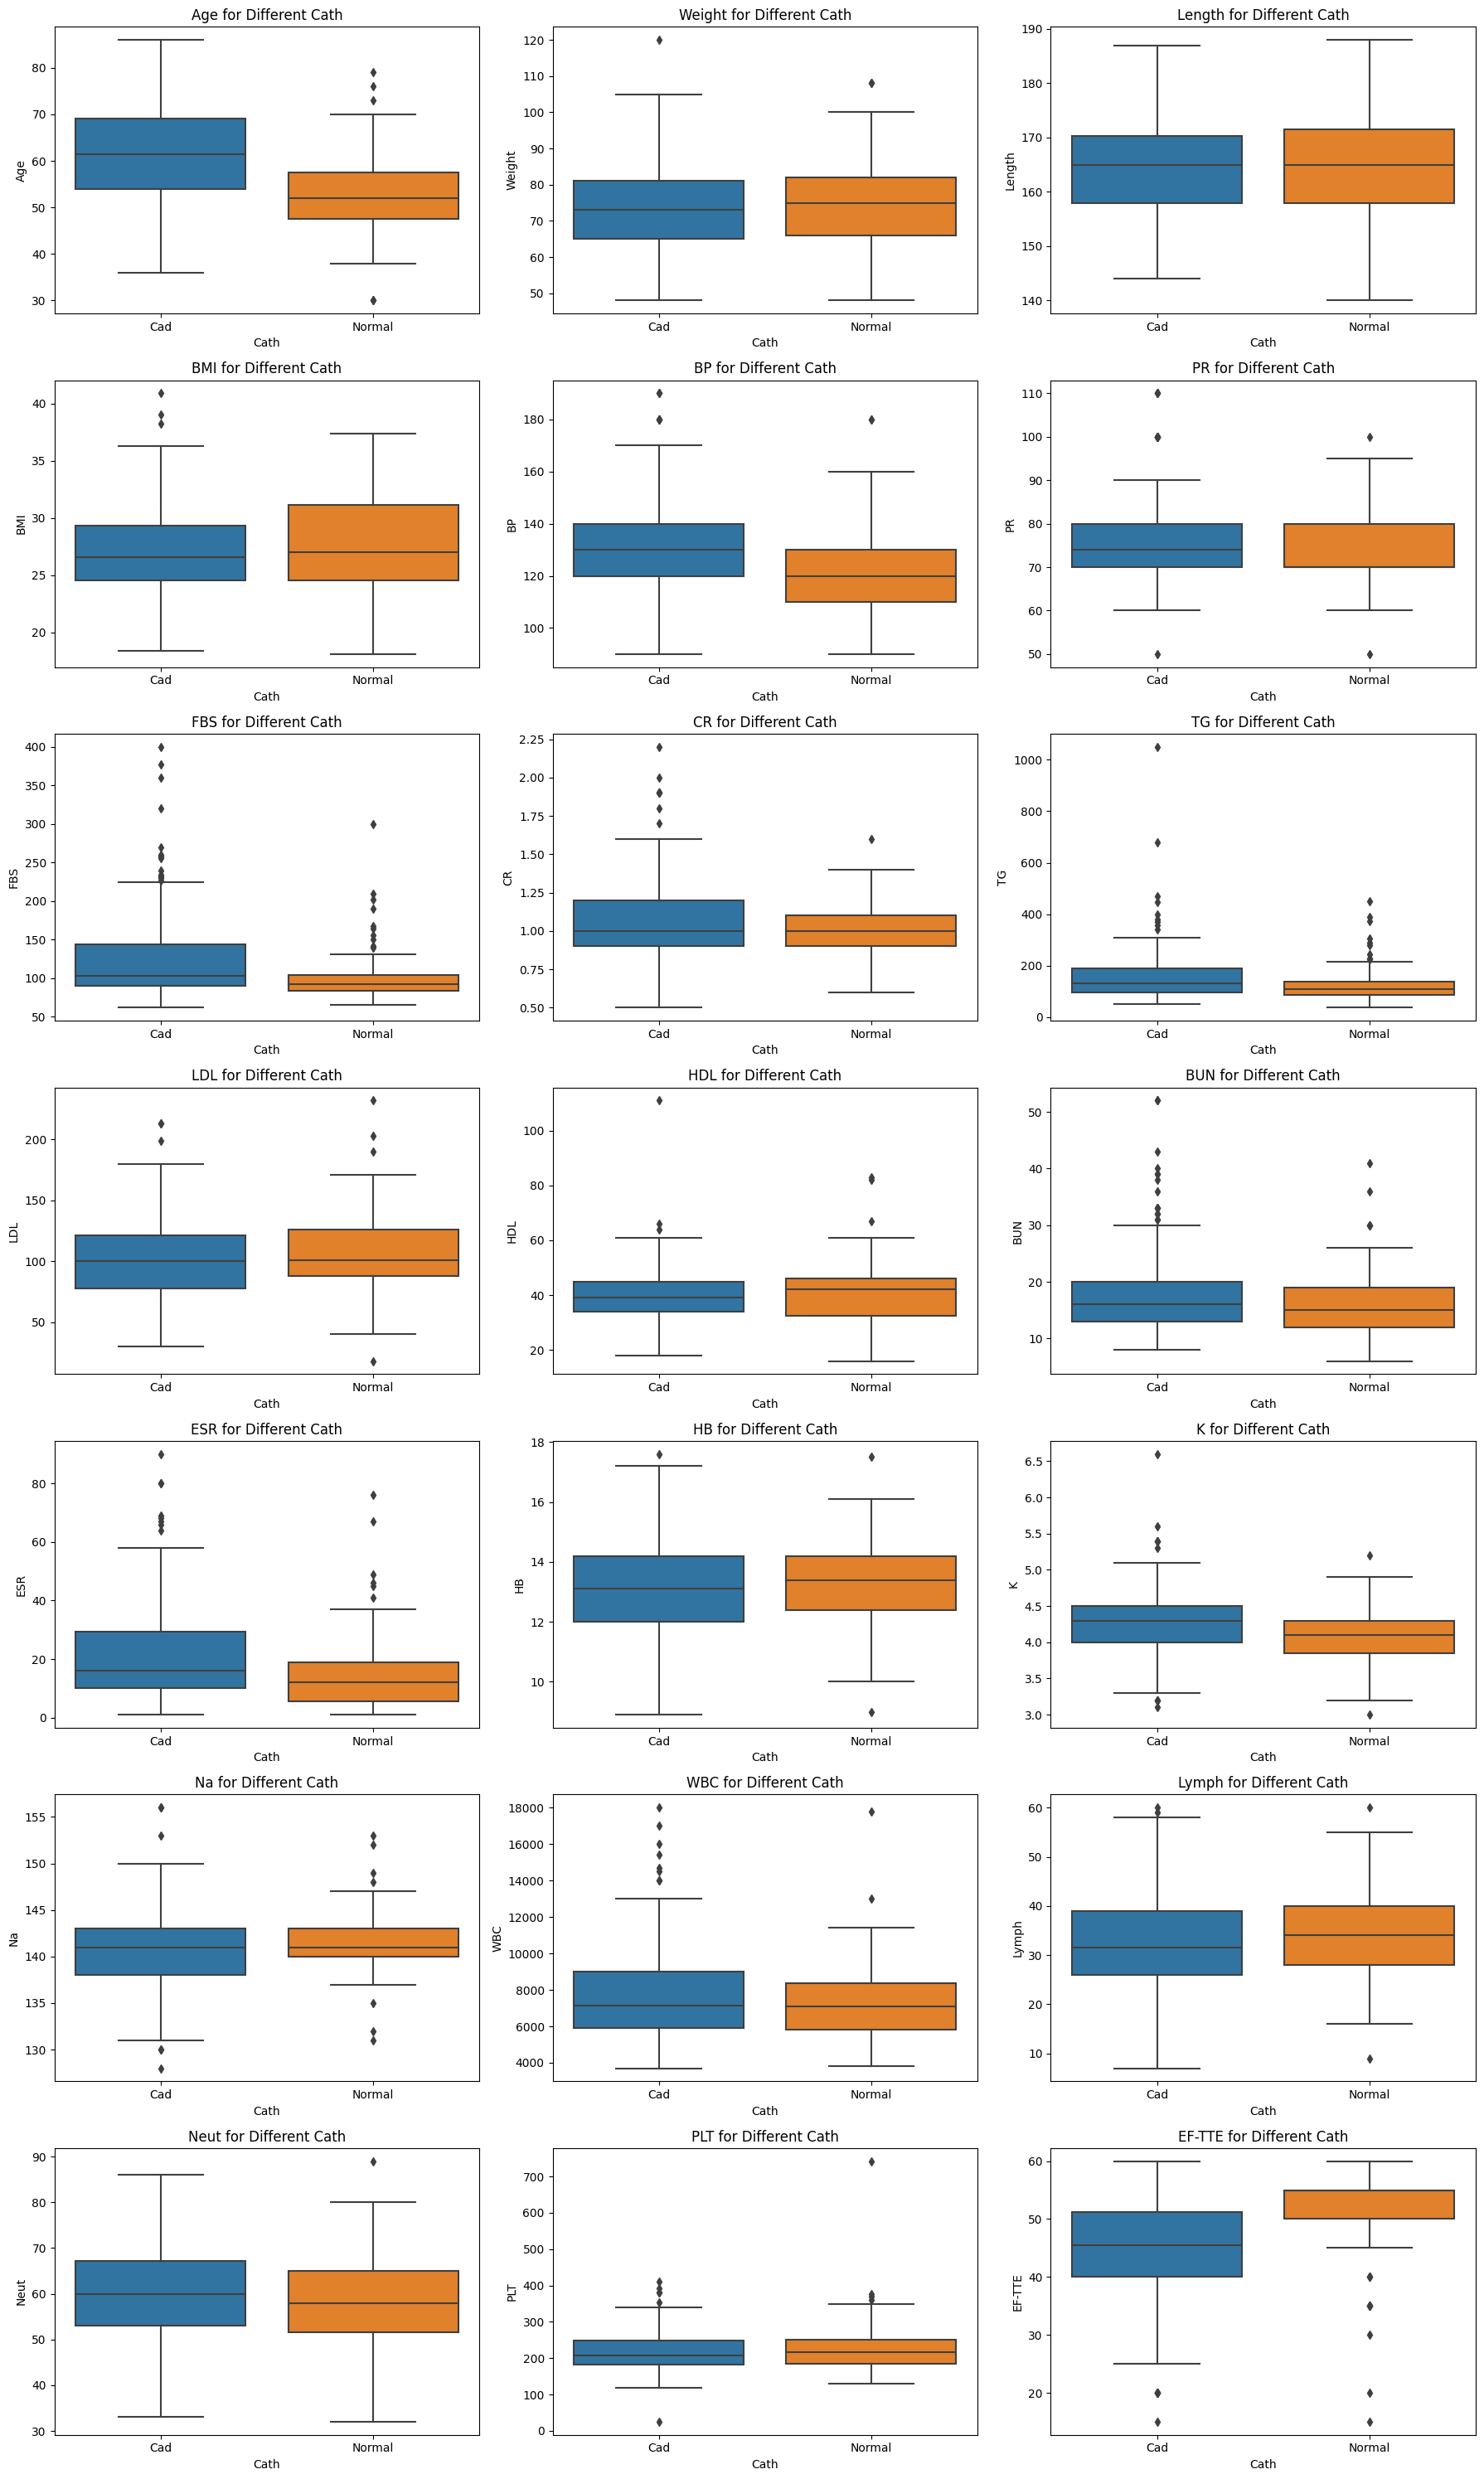

In [28]:
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE']

n_rows, n_cols = 7, 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 30))

for i, col in enumerate(num_cols):
    i, j = i//n_cols, i%n_cols
    ax = axes[i][j]
    
    #sns.set_style("darkgrid")        
    ax.set_xlabel(col)
    ax.set_ylabel("Number of Patients", fontsize="medium")
    #ax.set_ylim([0,100])
    ax.set_title(f'{col} for Different Cath', fontsize=12)
    figure = sns.boxplot(x='Cath', y=col, data=data, ax=ax)

    

fig.tight_layout()
fig.show()

# 2.4 - Multivariate Analysis

## Chest Pain Type vs CAD

 Chest pain is the cardinal symptom of coronary artery disease, and this dataset contains five variables about chest pain. So Let's analyze the relationship between chest pain type and CAD.

In [29]:
data.groupby(['Typical Chest Pain', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang'])['Cath'].value_counts(normalize=False).to_frame(name="Number of Patients").style.background_gradient(cmap='Blues')

In [30]:
data.groupby(['Typical Chest Pain', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang'])['Cath'].value_counts(normalize=True).mul(100).round(3).to_frame(name="Percent within group (%)").style.background_gradient(cmap='Blues')

 As we saw in the Dataset Description part, chest pain can be classified into three categories, which are `Typical Chest Pain`, `Atypical`, and `Nonanginal`. And `Exertional CP` has only `0` values. And `LowTH Ang` has only two `1` values. 

In [31]:
cp_dt = data.groupby(['Typical Chest Pain', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang'])['Cath'].value_counts(normalize=False).sort_values(ascending=False).to_frame(name="Number of Patients")

ax = cp_dt.plot(kind='bar', figsize=(18, 12), legend=None)
color_flg = [1,0,1,1,0,0,0,1,1,1]

for i, color in enumerate(color_flg):
    if color==1:
        ax.patches[i].set_color('red')
    else:
        ax.patches[i].set_color('green')

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., height+3, "{:1.1f}% / {:d}".format(height/len(data)*100, height.astype(int)),ha='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
    
ax.set_xticklabels(['Typical','Atypical','Atypical','No Chest Pain','Nonanginal','No Chest Pain','Typical','Nonanginal','Atypical+LowTH','Typical+LowTH'], rotation=0, fontsize=12)
plt.title('Barplot of all the Chest Pain Combinations (Red=Cad, Green=Normal)', fontsize=20)
plt.show()

# 2.5 - Correlation

In [32]:
df.drop(labels='Cath_binary', axis=1, inplace=True)

In [33]:
# Numerical variables:
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC','Lymph', 'Neut', 'PLT', 'EF-TTE']

# Categorical variables:
cat_cols = ['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease','CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain','Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion','LVH', 'Poor R Progression','Cath']
cat_cols.remove('Cath')

# Ordinal variables
ord_cols = ['Function Class', "Region RWMA", "VHD"]

dummy_variables = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [34]:
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[num_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=num_cols)

In [35]:
dummy_variables = dummy_variables.drop(num_cols+ord_cols+['Cath'], axis=1)
cath = {"Cad": 1, "Normal":0}
df['Cath'] = df['Cath'].map(cath)
processed_df = pd.concat([dummy_variables, scaled_numerical_df, df[ord_cols], df['Cath']], axis=1)

In [36]:
correlation_matrix = processed_df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap", fontsize=20)
plt.show()

In [37]:
corr = processed_df.corr()
target_corr = corr['Cath'].drop('Cath')

target_corr_sorted = target_corr.sort_values(ascending=False)

plt.figure(figsize=(10,15))
sns.set(font_scale=1.0)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Correlation with Coronary Artery Disease")
plt.show()

### ***Positive correlations with Coronary artery disease***

#### 1. Typical chest pain (Typical chest pain_1, 0.54)

#### 2. Age (Age, 0.36)

#### 3. Regional Wall Motion Abnormality (Region RWMA, 0.32)

#### 4. Hypertension (HTN_1, 0.29)

#### 5. Diabetes (DM_1, 0.25)

#### 6. Blood Pressure (BP, 0.24)

#### 7. T inversion (Tinversion_1, 0.24)

### ***Negative correlations with Coronary artery disease***

#### 1. Atypical chest pain (Atypical_1, -0.42)

#### 2. Nonanginal chest pain (Nonanginal_1, -0.27)

#### 3. Ejection fraction (EF_TTE, -0.23)

#### 4. Diastolic murmur (Diastolic murmur_1, -0.15)

#### 5. Lymphocyte to WBC ratio (Lymph, -0.13)

#### 6. Dyspnea (Dyspnea_1, -0.13)


# 2.6 - Mutual Information

Mutual Information between two random variables is a non-negative value, which **measures the dependency between the variables**. It is equal to zero if and only if two random variables are independent, and **higher values mean higher dependency**.

The function relies on **nonparametric methods based on entropy estimation from k-nearest neighbors distances**. And It can be used for **feature selection**.

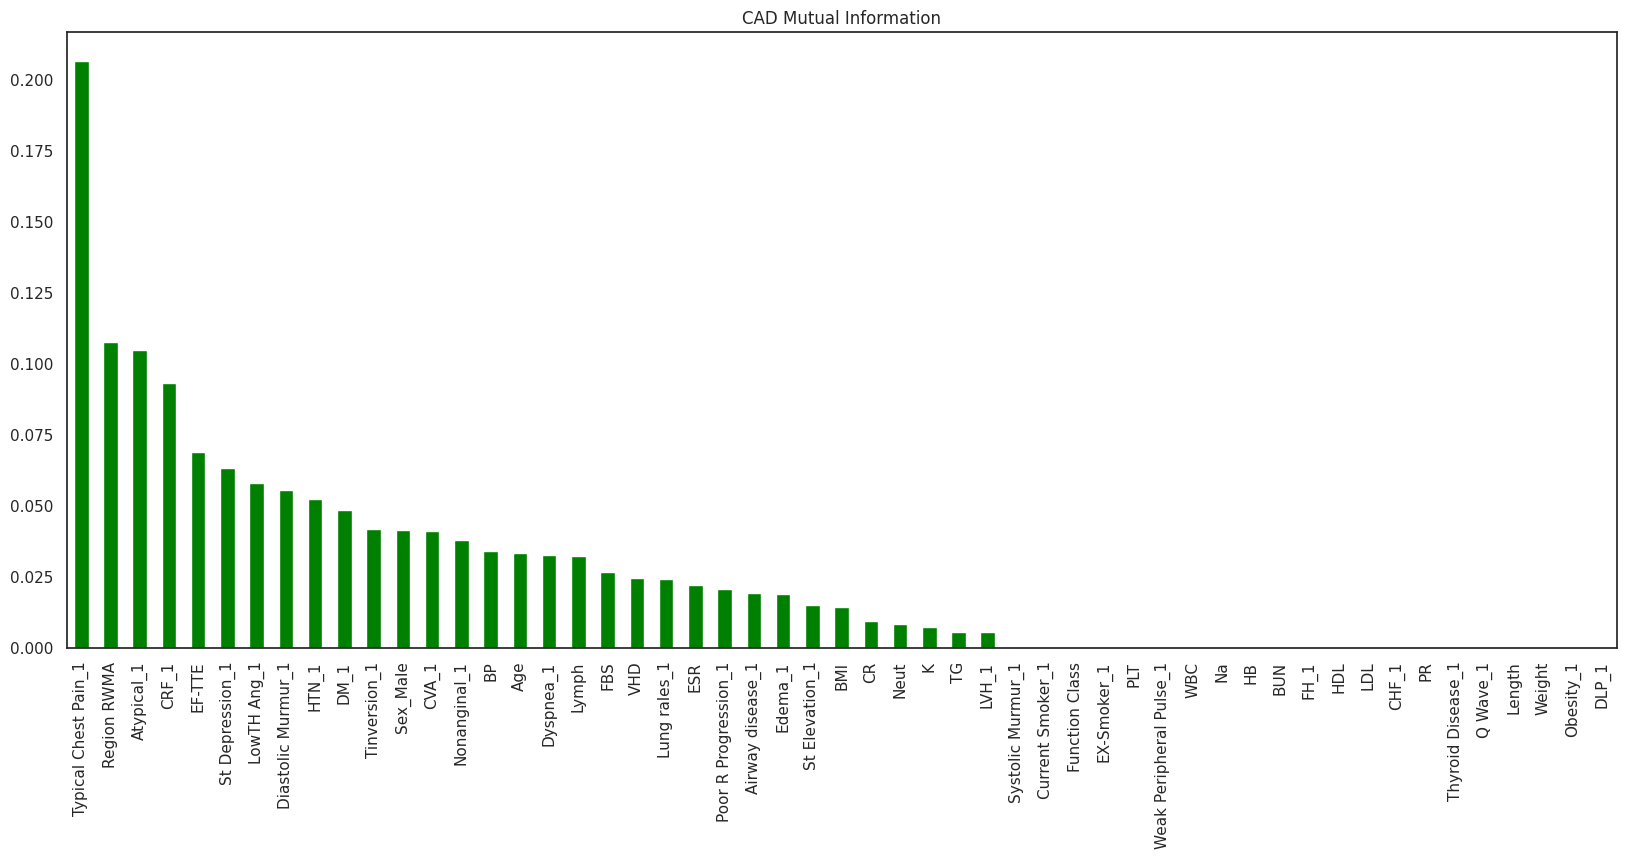

In [38]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mutual_info = mutual_info_classif(processed_df.drop(['Cath'], axis=1), processed_df['Cath'], random_state=seed)
mutual_info = pd.Series(mutual_info)
mutual_info.index = processed_df.drop(['Cath'], axis=1).columns
columns = mutual_info.sort_values(ascending=False)
columns.plot.bar(title='CAD Mutual Information', figsize=(20, 8), color="green")
plt.show()

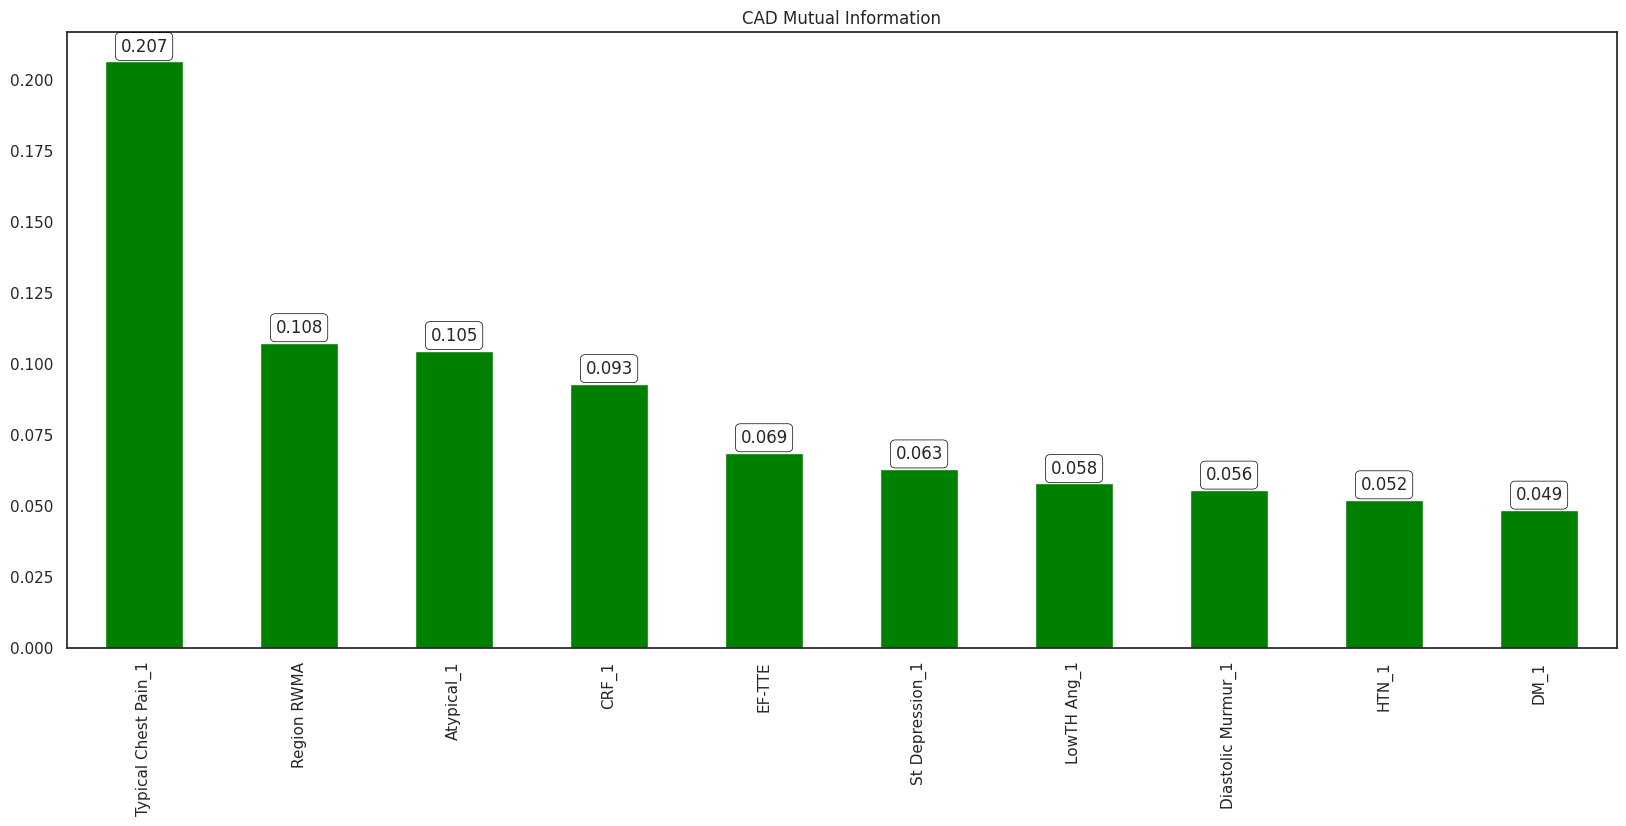

In [39]:
columns = mutual_info.sort_values(ascending=False)[:10]
ax = columns.plot.bar(title='CAD Mutual Information', figsize=(20, 8), color="green")
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., height+0.0035, "{:1.3f}".format(height), ha='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
plt.show()

### ***Top 10 Mutual information with CAD***

#### 1. Typical Chest Pain (Typical Chest Pain_1, 0.207)

#### 2. Regional Wall Motion Abnormality (Region RWMA, 0.108)

#### 3. Atypical Chest Pain (Atypical_1, 0.105)

#### 4. Chronic Renal Failure (CRF_1, 0.093)

#### 5. Ejection Fraction (EF_TTE, 0.069)

#### 6. ST Depression (St Depression_1, 0.063)

#### 7. Low Threshold Angina (LowTH Ang_1, 0.058)

#### 8. Diastolic Murmur (Diastolic Murmur_1, 0.056)

#### 9. Hypertension (HTN_1, 0.052)

#### 10. Diabetes (DM_1, 0.049)

# **3 - Predictive Analysis**

# 3.1 - Introduction

In ***Predictive Analysis*** part, we will preprocess the data, and split the data into training set and test set. And we will oversample the data by `SMOTENC`, and develop predictive models with hyperparameter tuning by `Optuna`.  
 
 Since hyperparameter tuning process takes a comparatively long time, I made variable `optuna_switch`, which is initally set to `False`. If you want to tune the hyperparameter of the models, just change `optuna_switch = False` into `optuna_switch = True`. Then optuna will tune the hyperparameter of the three models, which are `CatBoost`, `XGBoost`, and `LightGBM`.
 
 We will build six models, `CatBoost`, `XGBoost`, `LightGBM`, and three *Ensemble Models*. Then we will compare these six models with metrics, which are accuracy, precision, recall, F1 score, and roc_auc score. And we will choose one model to analyze explainability in next part.

# 3.2 - Preprocessing

In [40]:
data.head()

Age  Weight  Length     Sex        BMI  DM  HTN  Current Smoker  EX-Smoker  \
0   53      90     175    Male  29.387755   0    1               1          0   
1   67      70     157  Female  28.398718   0    1               0          0   
2   54      54     164    Male  20.077335   0    0               1          0   
3   66      67     158  Female  26.838648   0    1               0          0   
4   50      87     153  Female  37.165193   0    1               0          0   

   FH  ...    K   Na    WBC  Lymph  Neut  PLT  EF-TTE  Region RWMA  VHD  \
0   0  ...  4.7  141   5700     39    52  261      50            0    0   
1   0  ...  4.7  156   7700     38    55  165      40            4    0   
2   0  ...  4.7  139   7400     38    60  230      40            2    1   
3   0  ...  4.4  142  13000     18    72  742      55            0    3   
4   0  ...  4.0  140   9200     55    39  274      50            0    3   

     Cath  
0     Cad  
1     Cad  
2     Cad  
3  Normal  
4  Normal  

[5 rows x 55 columns]

In [41]:
X = data.drop("Cath", axis=1)
y = data['Cath']

In [42]:
map_label = {"Cad":1, "Normal":0}
y = y.map(map_label)

In [43]:
# Numerical variables:
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE']

# Categorical variables:
cat_cols = ['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression', 'Cath']
cat_cols.remove('Cath')

# Ordinal variables
ord_cols = ['Function Class', "Region RWMA", "VHD"]

In [44]:
preprocessor = ColumnTransformer(transformers = [('OHE', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first', dtype=np.int64), cat_cols),
                                                 ('Scaler', StandardScaler(), num_cols)],
                                 remainder = 'passthrough',
                                 verbose_feature_names_out = False).set_output(transform = 'pandas')
X_prep = preprocessor.fit_transform(X)

In [45]:
X_prep.head()

Sex_Male  DM_1  HTN_1  Current Smoker_1  EX-Smoker_1  FH_1  Obesity_1  \
0         1     0      1                 1            0     0          1   
1         0     0      1                 0            0     0          1   
2         1     0      0                 1            0     0          0   
3         0     0      1                 0            0     0          1   
4         0     0      1                 0            0     0          1   

   CRF_1  CVA_1  Airway disease_1  ...         K        Na       WBC  \
0      0      0                 0  ...  1.025931  0.000868 -0.772712   
1      0      0                 0  ...  1.025931  3.946579  0.057248   
2      0      0                 0  ...  1.025931 -0.525227 -0.067246   
3      0      0                 0  ...  0.370114  0.263916  2.256644   
4      0      0                 0  ... -0.504308 -0.262179  0.679719   

      Lymph      Neut       PLT    EF-TTE  Function Class  Region RWMA  VHD  
0  0.662975 -0.801571  0.650977  0.310686               0            0    0  
1  0.562534 -0.506461 -0.930681 -0.811339               0            4    0  
2  0.562534 -0.014609  0.140233 -0.811339               0            2    1  
3 -1.446280  1.165833  8.575744  0.871699               3            0    3  
4  2.270027 -2.080384  0.865160  0.310686               2            0    3  

[5 rows x 53 columns]

In [46]:
X_prep.columns

Index(['Sex_Male', 'DM_1', 'HTN_1', 'Current Smoker_1', 'EX-Smoker_1', 'FH_1',
       'Obesity_1', 'CRF_1', 'CVA_1', 'Airway disease_1', 'Thyroid Disease_1',
       'CHF_1', 'DLP_1', 'Edema_1', 'Weak Peripheral Pulse_1', 'Lung rales_1',
       'Systolic Murmur_1', 'Diastolic Murmur_1', 'Typical Chest Pain_1',
       'Dyspnea_1', 'Atypical_1', 'Nonanginal_1', 'LowTH Ang_1', 'Q Wave_1',
       'St Elevation_1', 'St Depression_1', 'Tinversion_1', 'LVH_1',
       'Poor R Progression_1', 'Age', 'Weight', 'Length', 'BMI', 'BP', 'PR',
       'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC',
       'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Function Class', 'Region RWMA',
       'VHD'],
      dtype='object')

# 3.3 - Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, stratify=y, random_state=seed)
X_train_en, y_train_en = X_train, y_train

print("Training Data Shape : ", X_train.shape, y_train.shape)
print("Test Data Shape : ", X_test.shape, y_test.shape)

Training Data Shape :  (242, 53) (242,)
Test Data Shape :  (61, 53) (61,)


# 3.4 - Oversampling by SMOTENC

In [48]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=seed)
print("Training Data Shape : ", X_train.shape, y_train.shape)
print("Validation Data Shape : ", X_valid.shape, y_valid.shape)

Training Data Shape :  (193, 53) (193,)
Validation Data Shape :  (49, 53) (49,)


In [49]:

from imblearn.over_sampling import SMOTENC

catord_cols = ['Sex_Male', 'DM_1', 'HTN_1', 'Current Smoker_1', 'EX-Smoker_1', 'FH_1', 'Obesity_1', 'CRF_1', 'CVA_1', 'Airway disease_1', 'Thyroid Disease_1', 'CHF_1', 'DLP_1', 'Edema_1', 'Weak Peripheral Pulse_1', 'Lung rales_1', 'Systolic Murmur_1', 'Diastolic Murmur_1', 'Typical Chest Pain_1', 'Dyspnea_1', 'Atypical_1', 'Nonanginal_1', 'LowTH Ang_1', 'Q Wave_1', 'St Elevation_1', 'St Depression_1', 'Tinversion_1', 'LVH_1', 'Poor R Progression_1', 'Function Class', "Region RWMA", "VHD"]
oversample = SMOTENC(random_state=seed, categorical_features=catord_cols)
print("Original Train Data : ", X_train.shape, y_train.shape)

X_smote, y_smote = oversample.fit_resample(X_train, y_train)
print("Smote Train Data : ", X_smote.shape, y_smote.shape)


Original Train Data :  (193, 53) (193,)
Smote Train Data :  (276, 53) (276,)


In [50]:
X_smote.columns

Index(['Sex_Male', 'DM_1', 'HTN_1', 'Current Smoker_1', 'EX-Smoker_1', 'FH_1',
       'Obesity_1', 'CRF_1', 'CVA_1', 'Airway disease_1', 'Thyroid Disease_1',
       'CHF_1', 'DLP_1', 'Edema_1', 'Weak Peripheral Pulse_1', 'Lung rales_1',
       'Systolic Murmur_1', 'Diastolic Murmur_1', 'Typical Chest Pain_1',
       'Dyspnea_1', 'Atypical_1', 'Nonanginal_1', 'LowTH Ang_1', 'Q Wave_1',
       'St Elevation_1', 'St Depression_1', 'Tinversion_1', 'LVH_1',
       'Poor R Progression_1', 'Age', 'Weight', 'Length', 'BMI', 'BP', 'PR',
       'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC',
       'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Function Class', 'Region RWMA',
       'VHD'],
      dtype='object')

In [51]:
# Numerical variables:
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE']

# Categorical variables:
cat_cols_ = ['Sex_Male', 'DM_1', 'HTN_1', 'Current Smoker_1', 'EX-Smoker_1', 'FH_1', 'Obesity_1', 'CRF_1', 'CVA_1', 'Airway disease_1', 'Thyroid Disease_1', 'CHF_1', 'DLP_1', 'Edema_1', 'Weak Peripheral Pulse_1', 'Lung rales_1', 'Systolic Murmur_1', 'Diastolic Murmur_1', 'Typical Chest Pain_1', 'Dyspnea_1', 'Atypical_1', 'Nonanginal_1', 'LowTH Ang_1', 'Q Wave_1', 'St Elevation_1', 'St Depression_1', 'Tinversion_1', 'LVH_1', 'Poor R Progression_1']

# Ordinal variables
ord_cols = ['Function Class', "Region RWMA", "VHD"]

print(f"[Unique Values in {len(cat_cols)} Categorical Variables]\n")

for cat_col in cat_cols_:
    print("* {} : {} Unique Values =>".format(cat_col, X_smote[cat_col].nunique()), X_smote[cat_col].unique())

[Unique Values in 30 Categorical Variables]

* Sex_Male : 2 Unique Values => [1 0]
* DM_1 : 2 Unique Values => [0 1]
* HTN_1 : 2 Unique Values => [1 0]
* Current Smoker_1 : 2 Unique Values => [0 1]
* EX-Smoker_1 : 2 Unique Values => [0 1]
* FH_1 : 2 Unique Values => [0 1]
* Obesity_1 : 2 Unique Values => [1 0]
* CRF_1 : 2 Unique Values => [0 1]
* CVA_1 : 2 Unique Values => [0 1]
* Airway disease_1 : 2 Unique Values => [0 1]
* Thyroid Disease_1 : 2 Unique Values => [0 1]
* CHF_1 : 1 Unique Values => [0]
* DLP_1 : 2 Unique Values => [1 0]
* Edema_1 : 2 Unique Values => [0 1]
* Weak Peripheral Pulse_1 : 2 Unique Values => [0 1]
* Lung rales_1 : 2 Unique Values => [0 1]
* Systolic Murmur_1 : 2 Unique Values => [0 1]
* Diastolic Murmur_1 : 2 Unique Values => [0 1]
* Typical Chest Pain_1 : 2 Unique Values => [0 1]
* Dyspnea_1 : 2 Unique Values => [0 1]
* Atypical_1 : 2 Unique Values => [1 0]
* Nonanginal_1 : 2 Unique Values => [0 1]
* LowTH Ang_1 : 2 Unique Values => [0 1]
* Q Wave_1 : 2 Uni

In [52]:
for ord_col in ord_cols:
    print("* {} : {} Unique Values =>".format(ord_col, X_smote[ord_col].nunique()), X_smote[ord_col].unique())

* Function Class : 4 Unique Values => [0 2 3 1]
* Region RWMA : 5 Unique Values => [0 2 3 1 4]
* VHD : 4 Unique Values => [0 1 3 2]


# ***Optuna Switch***

Since hyperparameter tuning process takes a comparatively long time, I made variable `optuna_switch`, which is initally set to `False`. If you want to tune the hyperparameter of the models, just change `optuna_switch = False` into `optuna_switch = True`. Then optuna will tune the hyperparameter of the three models, which are `CatBoost`, `XGBoost`, and `LightGBM`.

In [53]:
optuna_switch = False

# 3.5 - CatBoost

## Hyperparameter tuning by Optuna

In [54]:
!pip install optuna

In [55]:
import optuna
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [56]:
def objective(trial):
    
    params = {
        'iterations':trial.suggest_int("iterations", 100, 1000),
        'objective': trial.suggest_categorical('objective', ['Logloss', 'CrossEntropy']),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),
        'od_wait':trial.suggest_int('od_wait', 500, 2000),
        'learning_rate' : trial.suggest_uniform('learning_rate', 0.001, 0.1),
        'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
        'random_strength': trial.suggest_uniform('random_strength',10,50),
        'depth': trial.suggest_int('depth', 3, 10),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'verbose': False,
    }
    
    if params['bootstrap_type'] == 'Bayesian':
        params['bagging_temperature'] = trial.suggest_float('bagging_temperature', 0, 10)
    elif params['bootstrap_type'] == 'Bernoulli':
        params['subsample'] = trial.suggest_float('subsample', 0.1, 1)
    
    
    catord_cols = ['Sex_Male', 'DM_1', 'HTN_1', 'Current Smoker_1', 'EX-Smoker_1', 'FH_1', 'Obesity_1', 'CRF_1', 'CVA_1', 'Airway disease_1', 'Thyroid Disease_1', 'CHF_1', 'DLP_1', 'Edema_1', 'Weak Peripheral Pulse_1', 'Lung rales_1', 'Systolic Murmur_1', 'Diastolic Murmur_1', 'Typical Chest Pain_1', 'Dyspnea_1', 'Atypical_1', 'Nonanginal_1', 'LowTH Ang_1', 'Q Wave_1', 'St Elevation_1', 'St Depression_1', 'Tinversion_1', 'LVH_1', 'Poor R Progression_1', 'Function Class', "Region RWMA", "VHD"]
    model = CatBoostClassifier(**params)
    cat_model = model.fit(X_train, y_train, cat_features=catord_cols, eval_set=[(X_valid, y_valid)], use_best_model=True)
    
    pred = cat_model.predict(X_valid)
    #pred_proba = xgb_model.predict_proba(X_valid)[:, 1]
    score = f1_score(y_valid, pred)
    #score = accuracy_score(y_valid, pred)
    #score = precision_score(y_valid, pred)
    #score = recall_score(y_valid, pred)
    #score = roc_auc_score(y_valid, pred_proba)
    
    return score

In [57]:
if optuna_switch == True:
    study_cb = optuna.create_study(direction='maximize')
    study_cb.optimize(objective, n_trials = 50, show_progress_bar=True)

In [58]:
if optuna_switch == True:
    print("Best Hyperparameters: ", study_cb.best_params)
    print("Best F1 Score: ", study_cb.best_value)

## Training Model

In [59]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label="ROC", color='green', linestyle='dashed', linewidth=4)
    plt.plot([0,1], [0,1], "k-", label="Random", linestyle='dashed', color='gray', linewidth=3)
    
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("FPR( 1 - Specificity )")
    plt.ylabel("TPR( Recall )")
    plt.legend()

In [60]:
def get_clf_eval(y_test, pred, pred_proba):
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
    disp.plot()
    plt.show()
    
    roc_curve_plot(y_test, pred_proba)
    
    eval_metrics = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'roc_auc': roc_auc}
    
    return eval_metrics

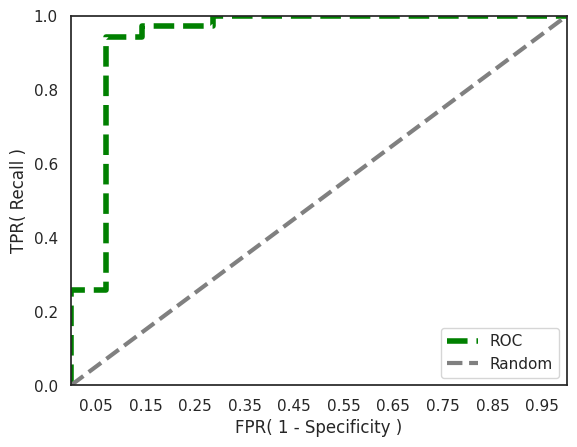

In [61]:
catord_cols = ['Sex_Male', 'DM_1', 'HTN_1', 'Current Smoker_1', 'EX-Smoker_1', 'FH_1', 'Obesity_1', 'CRF_1', 'CVA_1', 'Airway disease_1', 'Thyroid Disease_1', 'CHF_1', 'DLP_1', 'Edema_1', 'Weak Peripheral Pulse_1', 'Lung rales_1', 'Systolic Murmur_1', 'Diastolic Murmur_1', 'Typical Chest Pain_1', 'Dyspnea_1', 'Atypical_1', 'Nonanginal_1', 'LowTH Ang_1', 'Q Wave_1', 'St Elevation_1', 'St Depression_1', 'Tinversion_1', 'LVH_1', 'Poor R Progression_1', 'Function Class', "Region RWMA", "VHD"]

if optuna_switch == True:
    cb = CatBoostClassifier(random_state=seed, verbose=0, **study_cb.best_params)
else:
    cb = CatBoostClassifier(random_state=seed, verbose=0, iterations = 848, objective = 'CrossEntropy', bootstrap_type = 'Bernoulli', od_wait = 1785, learning_rate = 0.09967519851171666, reg_lambda = 14.530290657887146, random_strength = 48.95669246924815, depth = 4, min_data_in_leaf = 26, leaf_estimation_iterations = 6, subsample = 0.15606746339296185)
       
cat_model = cb.fit(X_train, y_train, cat_features=catord_cols)

pred = cat_model.predict(X_valid)
pred_proba = cat_model.predict_proba(X_valid)[:, 1]
metrics_train_cb = get_clf_eval(y_valid.values, pred, pred_proba)

In [62]:
#metrics_train_cb

fig = go.Figure()
fig.add_trace(
    go.Table(columnwidth=[80,100],
             header=dict(values=['Metrics', 'CatBoost_Train'], height=50, font_size=22),
             cells=dict(values=[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'],
                                [metrics_train_cb['accuracy'].round(3), metrics_train_cb['precision'].round(3), metrics_train_cb['recall'].round(3), metrics_train_cb['f1'].round(3), metrics_train_cb['roc_auc'].round(3)]], height=50, font_size=16)))

fig.show()

## Evaluate the Model

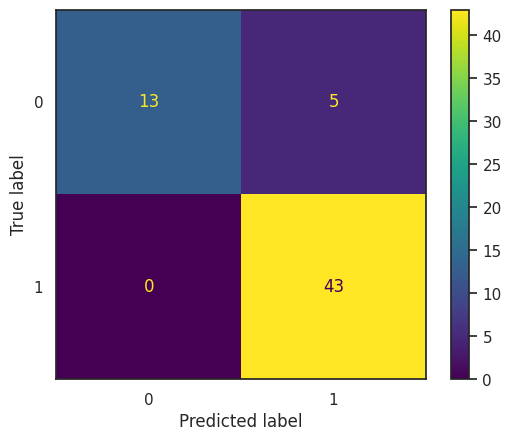

In [63]:
pred = cat_model.predict(X_test)
pred_proba = cat_model.predict_proba(X_test)[:, 1]
metrics_test_cb = get_clf_eval(y_test.values, pred, pred_proba)

In [64]:
# metrics_test_cb

fig = go.Figure()
fig.add_trace(
    go.Table(columnwidth=[80,100],
             header=dict(values=['Metrics', 'CatBoost_Test'], height=50, font_size=22),
             cells=dict(values=[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'],
                                [metrics_test_cb['accuracy'].round(3), metrics_test_cb['precision'].round(3), metrics_test_cb['recall'].round(3), metrics_test_cb['f1'].round(3), metrics_test_cb['roc_auc'].round(3)]], height=50, font_size=16)))

fig.show()

# 3.6 - XGBoost

In [65]:
def objective(trial):
    params = {
        "objective": "binary:logistic",
        'verbosity': 0,
        "eval_metric": "logloss",
        "tree_method": "gpu_hist",
        "booster": "gbtree",
        "random_state" : seed,
        "max_depth": trial.suggest_int("max_depth", 1, 9),
        "subsample": trial.suggest_float("subsample", 0.1, 1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.01, 1),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.01, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.01, 10),
        "n_estimators": trial.suggest_int("n_estimators", 50, 3000, step=50),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1, 10),
        "grow_policy": trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
    }
    
    model = XGBClassifier(**params)
    xgb_model = model.fit(X_train, y_train)
    
    pred = xgb_model.predict(X_valid)
    pred_proba = xgb_model.predict_proba(X_valid)[:, 1]
    score = f1_score(y_valid, pred)
    #score = accuracy_score(y_valid, pred)
    #score = precision_score(y_valid, pred)
    #score = recall_score(y_valid, pred)
    #score = roc_auc_score(y_valid, pred_proba)
    
    return score

## Training Model

In [66]:
if optuna_switch == True:
    study_xgb = optuna.create_study(direction='maximize')
    study_xgb.optimize(objective, n_trials = 50, show_progress_bar=True)

In [67]:
if optuna_switch == True:
    print("Best Hyperparameters: ", study_xgb.best_params)
    print("Best F1 Score: ", study_xgb.best_value)

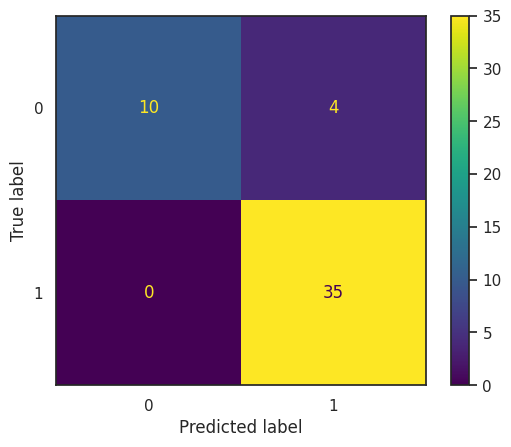

In [68]:
if optuna_switch == True:
    xgb = XGBClassifier(random_state=seed, **study_xgb.best_params)
else:
    xgb = XGBClassifier(random_state=seed, max_depth = 4, subsample = 0.8455445119537031, colsample_bytree = 0.7473353578505076, learning_rate = 0.2343253699229094, min_child_weight = 1, gamma = 0.3290797801781987, reg_alpha = 1.0280651442885607, reg_lambda = 2.990770634501404, n_estimators = 2450, scale_pos_weight = 1.1196755081865422, grow_policy = 'lossguide')
                        
xgb_model = xgb.fit(X_train, y_train)

pred = xgb_model.predict(X_valid)
pred_proba = xgb_model.predict_proba(X_valid)[:, 1]
metrics_train_xgb = get_clf_eval(y_valid.values, pred, pred_proba)

In [69]:
# metrics_train_xgb

fig = go.Figure()
fig.add_trace(
    go.Table(columnwidth=[80,100],
             header=dict(values=['Metrics', 'XGBoost_Train'], height=50, font_size=22),
             cells=dict(values=[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'],
                                [metrics_train_xgb['accuracy'].round(3), metrics_train_xgb['precision'].round(3), metrics_train_xgb['recall'].round(3), metrics_train_xgb['f1'].round(3), metrics_train_xgb['roc_auc'].round(3)]], height=50, font_size=16)))

fig.show()

## Evaluate the Model

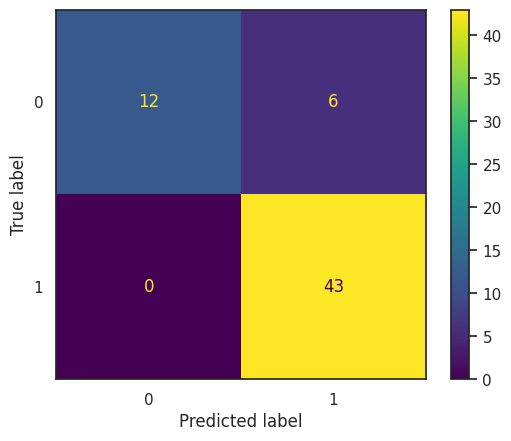

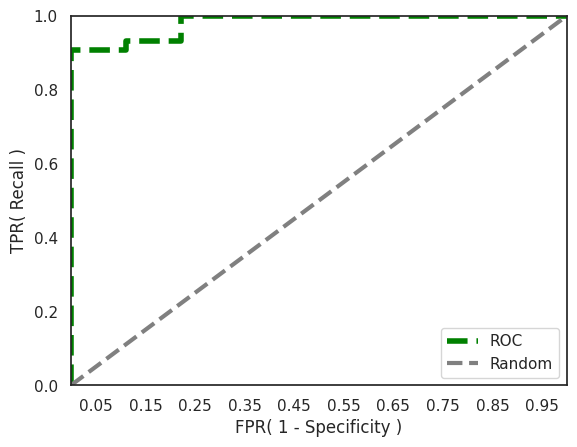

In [70]:
pred = xgb_model.predict(X_test)
pred_proba = xgb_model.predict_proba(X_test)[:, 1]
metrics_test_xgb = get_clf_eval(y_test.values, pred, pred_proba)

In [71]:
# metrics_test_xgb

fig = go.Figure()
fig.add_trace(
    go.Table(columnwidth=[80,100],
             header=dict(values=['Metrics', 'XGBoost_Test'], height=50, font_size=22),
             cells=dict(values=[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'],
                                [metrics_test_xgb['accuracy'].round(3), metrics_test_xgb['precision'].round(3), metrics_test_xgb['recall'].round(3), metrics_test_xgb['f1'].round(3), metrics_test_xgb['roc_auc'].round(3)]], height=50, font_size=16)))

fig.show()

# 3.7 - LightGBM

In [72]:
def objective(trial):
    params = {
        "verbose": -1,
        "random_state": seed,
        "max_depth": trial.suggest_int("max_depth", 1, 9),
        "subsample": trial.suggest_float("subsample", 0.1, 1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.01, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.01, 10),
        "n_estimators": trial.suggest_int("n_estimators", 50, 3000, step=50),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1, 10),
        "device": "gpu",
        "gpu_platform_id": 0,
        "gpu_device_id": 0,
        "force_col_wise": True
    }
    
    model = LGBMClassifier(**params)
    lgb_model = model.fit(X_train, y_train)
    
    pred = lgb_model.predict(X_valid)
    pred_proba = xgb_model.predict_proba(X_valid)[:, 1]
    
    score = f1_score(y_valid, pred)
    #score = accuracy_score(y_valid, pred)
    #score = precision_score(y_valid, pred)
    #score = recall_score(y_valid, pred)
    #score = roc_auc_score(y_valid, pred_proba)
    
    return score

## Training Model

In [73]:
if optuna_switch == True:
    study_lgb = optuna.create_study(direction='maximize')
    study_lgb.optimize(objective, n_trials = 50, show_progress_bar=True)

In [74]:
if optuna_switch == True:
    print("Best Hyperparameters: ", study_lgb.best_params)
    print("Best F1 Score: ", study_lgb.best_value)

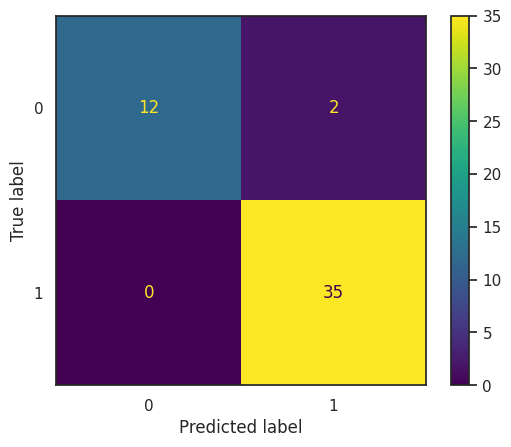

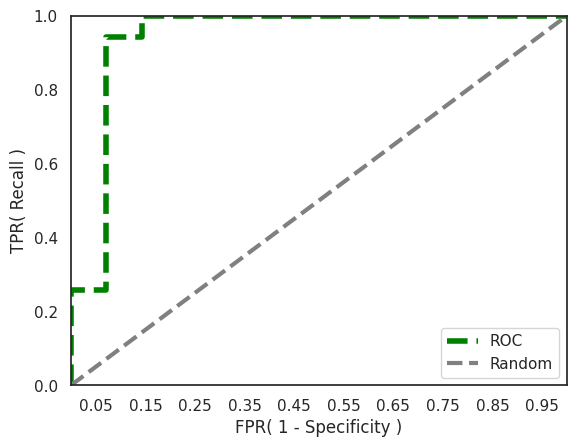

In [75]:
if optuna_switch == True:
    lgb = LGBMClassifier(random_state=seed, **study_lgb.best_params)
else:
    lgb = LGBMClassifier(random_state=seed, max_depth=8, subsample=0.7685741440530103, colsample_bytree=0.33159946082189473, learning_rate = 0.262816149189883, min_child_weight = 7, reg_alpha = 2.4513434563232432, reg_lambda=2.758468600865858, n_estimators=1800, scale_pos_weight=1.0020536704974063)
                         
lgb_model = lgb.fit(X_train, y_train)

pred = lgb_model.predict(X_valid)
pred_proba = lgb_model.predict_proba(X_valid)[:, 1]
metrics_train_lgb = get_clf_eval(y_valid.values, pred, pred_proba)

In [76]:
# metrics_train_lgb

fig = go.Figure()
fig.add_trace(
    go.Table(columnwidth=[80,100],
             header=dict(values=['Metrics', 'LightGBM_Train'], height=50, font_size=22),
             cells=dict(values=[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'],
                                [metrics_train_lgb['accuracy'].round(3), metrics_train_lgb['precision'].round(3), metrics_train_lgb['recall'].round(3), metrics_train_lgb['f1'].round(3), metrics_train_lgb['roc_auc'].round(3)]], height=50, font_size=16)))

fig.show()

## Evaluate the Model

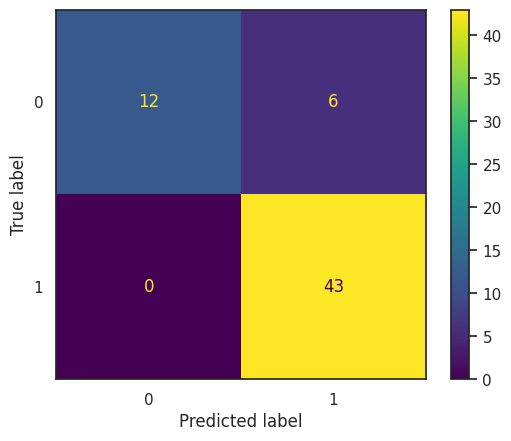

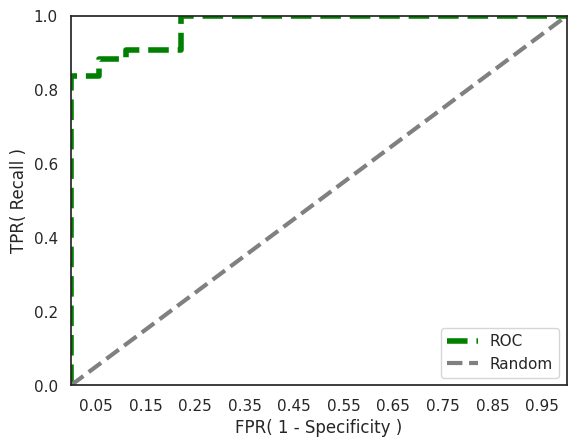

In [77]:
pred = lgb_model.predict(X_test)
pred_proba = lgb_model.predict_proba(X_test)[:, 1]
metrics_test_lgb = get_clf_eval(y_test.values, pred, pred_proba)

In [78]:
# metrics_test_lgb

fig = go.Figure()
fig.add_trace(
    go.Table(columnwidth=[80,100],
             header=dict(values=['Metrics', 'LightGBM_Test'], height=50, font_size=22),
             cells=dict(values=[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'],
                                [metrics_test_lgb['accuracy'].round(3), metrics_test_lgb['precision'].round(3), metrics_test_lgb['recall'].round(3), metrics_test_lgb['f1'].round(3), metrics_test_lgb['roc_auc'].round(3)]], height=50, font_size=16)))

fig.show()

# 3.8 - Ensemble

We will build three *Ensemble Models*:

***Ensemble1***
- *Stacking (AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, Logistic Regression, CatBoost, XGBoost, LightGBM) + Logistic Regression*

***Ensemble2***
- *StratifiedKFold + Stacking (CatBoost, XGBoost, LightGBM)*

***Ensemble3***
- *Stacking (AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, Logistic Regression, CatBoost, XGBoost, LightGBM) + LogisticRegression + VotingClassifier*

## ***Ensemble1***

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV

In [80]:
ABC = AdaBoostClassifier(random_state=seed)
BAG = BaggingClassifier(random_state=seed)
DTC = DecisionTreeClassifier(random_state=seed)
GB = GradientBoostingClassifier(random_state=seed)
LR = LogisticRegression(random_state=seed)
NB = GaussianNB()
RC = RidgeClassifier(random_state=seed)
RCC = RidgeClassifierCV()
RF = RandomForestClassifier(random_state=seed)
SVM_RBF = SVC(random_state=seed)

lr_final = LogisticRegression(random_state=seed)

In [81]:
oversample = SMOTENC(random_state=seed, categorical_features=catord_cols)
X_train_en1, y_train_en1 = oversample.fit_resample(X_train_en, y_train_en)

ABC.fit(X_train_en1, y_train_en1)
BAG.fit(X_train_en1, y_train_en1)
RF.fit(X_train_en1, y_train_en1)
LR.fit(X_train_en1, y_train_en1)

cat_model.fit(X_train_en1, y_train_en1, cat_features=catord_cols)
xgb_model.fit(X_train_en1, y_train_en1)
lgb_model.fit(X_train_en1, y_train_en1)

ABC_pred = ABC.predict(X_test)
BAG_pred = BAG.predict(X_test)
RF_pred = RF.predict(X_test)
LR_pred = LR.predict(X_test)

cat_pred = cat_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
lgb_pred = lgb_model.predict(X_test)

In [82]:
en_pred = np.array([ABC_pred, BAG_pred, RF_pred, LR_pred, cat_pred, xgb_pred, lgb_pred])
en_pred.shape

(7, 61)

In [83]:
en_pred = np.transpose(en_pred)
en_pred.shape

(61, 7)

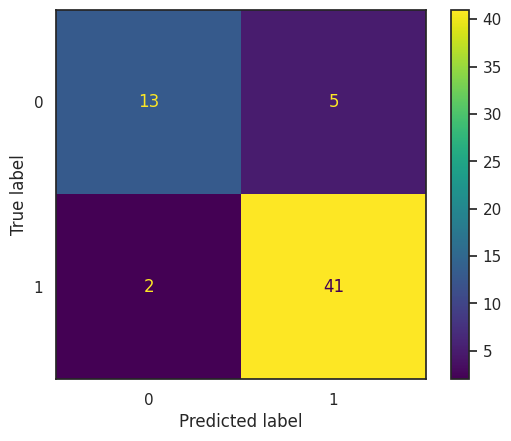

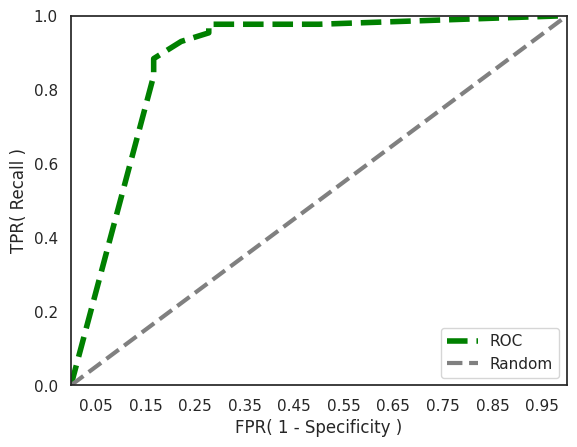

In [84]:
lr_final.fit(en_pred, y_test)
final = lr_final.predict(en_pred)
pred_proba = lr_final.predict_proba(en_pred)[:,1]
metrics_test_en1 = get_clf_eval(y_test.values, final, pred_proba)

In [85]:
# metrics_test_en1

fig = go.Figure()
fig.add_trace(
    go.Table(columnwidth=[80,100],
             header=dict(values=['Metrics', 'Ensemble1_Test'], height=50, font_size=22),
             cells=dict(values=[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'],
                                [metrics_test_en1['accuracy'].round(3), metrics_test_en1['precision'].round(3), metrics_test_en1['recall'].round(3), metrics_test_en1['f1'].round(3), metrics_test_en1['roc_auc'].round(3)]], height=50, font_size=16)))

fig.show()

## ***Ensemble2***

In [86]:
from sklearn.model_selection import StratifiedKFold, KFold

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    
    skf = StratifiedKFold(n_splits = n_folds, shuffle=False)
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    Xy_concat = pd.concat([X_train_n, pd.DataFrame(data=y_train_n, columns=['Cath'])], axis=1)
    
    for i, (train_index, valid_index) in enumerate(skf.split(Xy_concat, Xy_concat['Cath'])):
        X_tr = X_train_n.iloc[train_index]
        y_tr = y_train_n.iloc[train_index]
        
        oversample = SMOTENC(random_state=seed, categorical_features=catord_cols)
        X_tr, y_tr = oversample.fit_resample(X_tr, y_tr)
        
        X_te = X_train_n.iloc[valid_index]
        
        model.fit(X_tr, y_tr)
        
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        
        test_pred[:, i] = model.predict(X_test_n)
        
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    
    return train_fold_pred, test_pred_mean

In [87]:
cat_train, cat_test = get_stacking_base_datasets(cat_model, X_train_en, y_train_en, X_test, 7)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_model, X_train_en, y_train_en, X_test, 7)
lgb_train, lgb_test = get_stacking_base_datasets(lgb_model, X_train_en, y_train_en, X_test, 7)

In [88]:
Stack_final_X_train = np.concatenate((cat_train, xgb_train, lgb_train), axis=1)
Stack_final_X_test = np.concatenate((cat_test, xgb_test, lgb_test), axis=1)

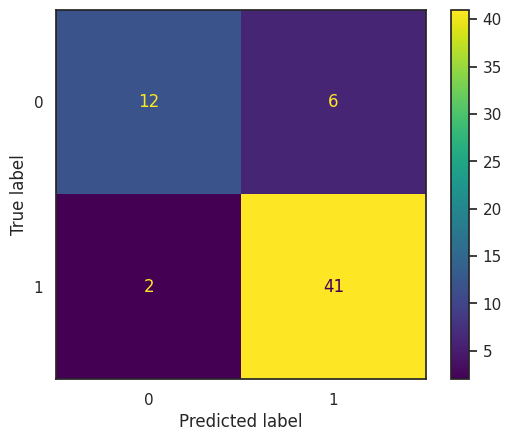

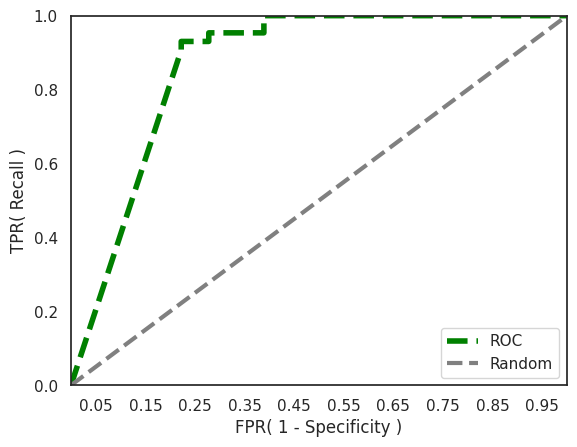

In [89]:
lr_final = LogisticRegression(random_state=seed)
lr_final.fit(Stack_final_X_train, y_train_en)
stack_final = lr_final.predict(Stack_final_X_test)
pred_proba = lr_final.predict_proba(Stack_final_X_test)[:,1]
metrics_test_en2 = get_clf_eval(y_test.values, stack_final, pred_proba)

In [90]:
# metrics_test_en2

fig = go.Figure()
fig.add_trace(
    go.Table(columnwidth=[80,100],
             header=dict(values=['Metrics', 'Ensemble2_Test'], height=50, font_size=22),
             cells=dict(values=[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'],
                                [metrics_test_en2['accuracy'].round(3), metrics_test_en2['precision'].round(3), metrics_test_en2['recall'].round(3), metrics_test_en2['f1'].round(3), metrics_test_en2['roc_auc'].round(3)]], height=50, font_size=16)))

fig.show()

## ***Ensemble3***

In [91]:
score_list = pd.DataFrame()

#oversample = SMOTENC(random_state=seed, categorical_features=catord_cols)
#X_train_en3, y_train_en3 = oversample.fit_resample(X_train_en, y_train_en)

pred_cat = cat_model.predict_proba(X_valid)
pred_cat = [i[1] for i in pred_cat]
score_list['cat'] = pred_cat

pred_xgb = xgb_model.predict_proba(X_valid)
pred_xgb = [i[1] for i in pred_xgb]
score_list['xgb'] = pred_xgb

pred_lgb = lgb_model.predict_proba(X_valid)
pred_lgb = [i[1] for i in pred_lgb]
score_list['lgb'] = pred_lgb

add_model = [ABC, BAG, LR, RF]
add_model_name = ['ABC', 'BAG', 'LR', 'RF']

for addmodel, modelname in zip(add_model, add_model_name):
    x = addmodel.predict_proba(X_valid)
    x = [i[1] for i in x]
    score_list[modelname] = x

In [92]:
score_list.head()

cat       xgb       lgb       ABC  BAG        LR    RF
0  0.004729  0.022476  0.048690  0.455149  0.2  0.074248  0.07
1  0.037251  0.076062  0.075234  0.468146  0.2  0.166974  0.20
2  0.998293  0.997139  0.993213  0.565967  1.0  0.999697  0.98
3  0.024037  0.067742  0.077753  0.487731  0.1  0.103215  0.17
4  0.959469  0.945470  0.888172  0.511788  0.9  0.541353  0.97

In [93]:
from sklearn.ensemble import VotingClassifier

weights = LogisticRegression(random_state=seed).fit(score_list, y_valid).coef_[0]

In [94]:
pd.DataFrame(weights, index = score_list.columns, columns = ['weight per model'])

weight per model
cat          1.022917
xgb          0.942757
lgb          0.776311
ABC          0.132980
BAG          1.254362
LR           0.811719
RF           1.338176

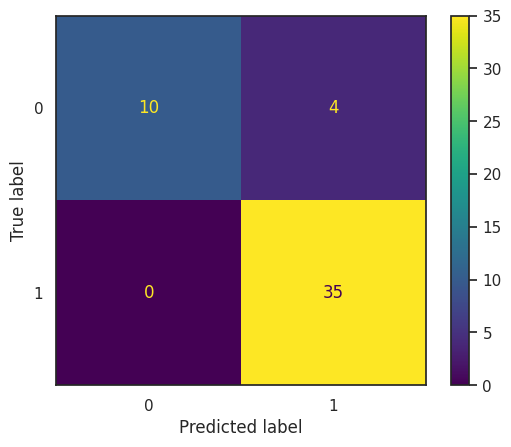

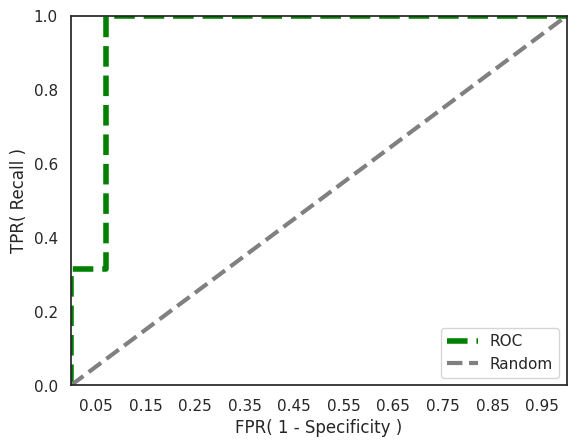

In [95]:
from sklearn.ensemble import VotingClassifier
models = [('cat', cat_model), ('xgb', xgb_model), ('lgb', lgb_model), ('ABC', ABC), ('BAG', BAG), ('LR', LR), ('RF', RF)]
VTC = VotingClassifier(models, weights=weights, voting='soft')
VTC.fit(X_train, y_train)

pred = VTC.predict(X_valid)
pred_proba = VTC.predict_proba(X_valid)[:, 1]
metrics_train_en3 = get_clf_eval(y_valid.values, pred, pred_proba)

In [96]:
fig = go.Figure()
fig.add_trace(
    go.Table(columnwidth=[80,100],
             header=dict(values=['Metrics', 'Ensemble3_Train'], height=50, font_size=22),
             cells=dict(values=[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'],
                                [metrics_train_en3['accuracy'].round(3), metrics_train_en3['precision'].round(3), metrics_train_en3['recall'].round(3), metrics_train_en3['f1'].round(3), metrics_train_en3['roc_auc'].round(3)]], height=50, font_size=16)))

fig.show()

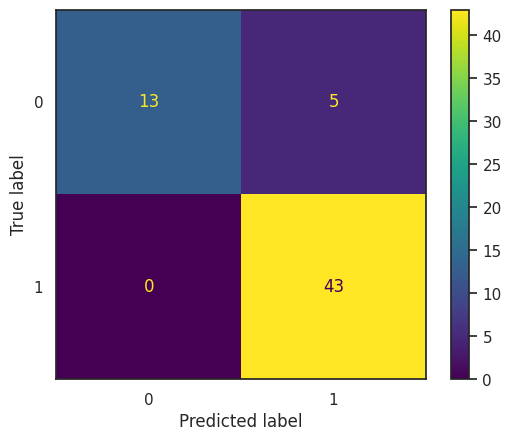

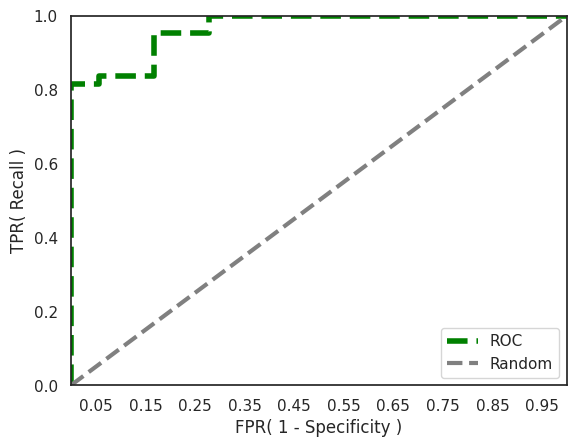

In [97]:
pred = VTC.predict(X_test)
pred_proba = VTC.predict_proba(X_test)[:, 1]
metrics_test_en3 = get_clf_eval(y_test.values, pred, pred_proba)

In [98]:
# metrics_test_en3

fig = go.Figure()
fig.add_trace(
    go.Table(columnwidth=[80,100],
             header=dict(values=['Metrics', 'Ensemble3_Test'], height=50, font_size=22),
             cells=dict(values=[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'],
                                [metrics_test_en3['accuracy'].round(3), metrics_test_en3['precision'].round(3), metrics_test_en3['recall'].round(3), metrics_test_en3['f1'].round(3), metrics_test_en3['roc_auc'].round(3)]], height=50, font_size=16)))

fig.show()

# 3.9 - Compare Different Models

Text(0.5, 1.0, 'Metrics')

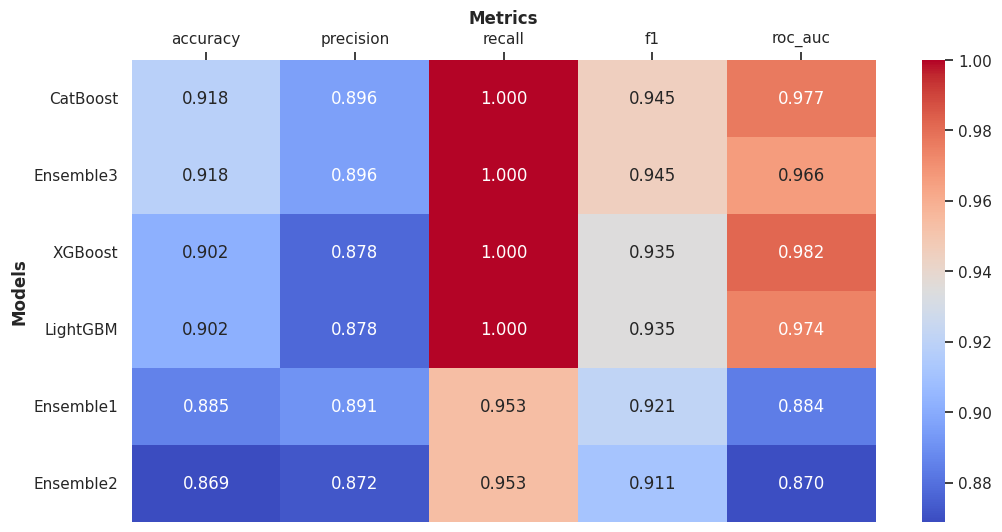

In [99]:
models_name = {'XGBoost': metrics_test_xgb, 'LightGBM': metrics_test_lgb, 'CatBoost': metrics_test_cb, 'Ensemble1': metrics_test_en1, 'Ensemble2': metrics_test_en2, 'Ensemble3': metrics_test_en3}

df_test_metrics = pd.DataFrame.from_dict(models_name, orient='index')
df_test_metrics = df_test_metrics.sort_values('recall', ascending=False).sort_values('f1', ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_test_metrics, annot=True, cmap='coolwarm', fmt=".3f", ax=ax)
ax.xaxis.tick_top()
ax.set_ylabel('Models', fontsize=12, fontweight='bold')
ax.set_title('Metrics', fontsize=12, fontweight='bold')

 *CatBoost*, *Ensemble3*, *XGBoost*, and *LightGBM* returned **100% recall**. Predicting CAD class as a normal class would be a dangerous decision, so reducing false negatives is important. *100% recall* means that all of the CAD patients were predicted as CAD class by the model. Among four models, *CatBoost* and *Ensemble3* returned a score of **91.8% accuracy, 0.945 F1 score.** Let's choose ***CatBoost*** to analyze explainability in the next part, which returned higher ROC AUC score than *Ensemble3*.
 
On the other hand, we could recognize the fact that our models returned low precision compared to high recall. That's because *SMOTE* has the feature of **"trade-off between precision and recall"**. Oversampling with *SMOTE* increases recall but reduces precision. *SMOTE* can be a useful way when dealing with medical datasets, because they have class imbalance problem in many times. And reducing false negatives (=increasing recall) frequently becomes field of interest when analyzing medical datasets.

# **4 - Explainable AI using SHAP value**

# 4.1 - Introduction

I have learned a lot from these great notebooks about SHAP values. 

- Model Interpretation Using SHAP in 2023 [(Link1)](https://www.kaggle.com/code/ayushnitb/model-interpretation-using-shap-in-2023)
- Model Explainability with SHAP: Only Guide U Need [(Link2)](https://www.kaggle.com/code/bextuychiev/model-explainability-with-shap-only-guide-u-need)

**TreeExplainer** is a special class of SHAP, optimized to work with any tree-based model in sklearn, such as XGBoost, LightGBM, CatBoost, and so on.

In [100]:
cat_explainer = shap.TreeExplainer(cat_model, X_train, feature_names = X_train.columns.tolist())
shap_values = cat_explainer.shap_values(X_train, y_train)
shap_values.shape

(193, 53)

In [101]:
pd.DataFrame(shap_values, columns=X_train.columns.tolist()).head()

Sex_Male      DM_1     HTN_1  Current Smoker_1  EX-Smoker_1      FH_1  \
0  0.103813 -0.190262  0.291918         -0.130806    -0.000811 -0.102675   
1  0.075440 -0.171215 -0.369200          0.586304    -0.001135  0.371490   
2  0.026720 -0.139571  0.240165         -0.113393     0.000486 -0.090999   
3 -0.099305 -0.165492  0.219863          0.419800    -0.000811 -0.056733   
4 -0.137288 -0.214305 -0.402067         -0.153259    -0.000934 -0.108633   

   Obesity_1  CRF_1     CVA_1  Airway disease_1  ...         K        Na  \
0  -0.020337    0.0 -0.001354         -0.003697  ...  0.582652  0.038031   
1  -0.009068    0.0 -0.000457         -0.002685  ... -0.202780  0.239750   
2   0.014792    0.0 -0.001855         -0.002235  ...  0.053540  0.286374   
3  -0.019591    0.0 -0.000455         -0.001438  ...  0.111077 -0.078577   
4  -0.024746    0.0 -0.001340         -0.004058  ... -0.222991 -0.188012   

        WBC     Lymph      Neut       PLT    EF-TTE  Function Class  \
0  0.050255  0.147044  0.144952 -0.034912  0.348760       -0.144782   
1  0.304316  0.044657  0.234874  0.081801 -1.090114       -0.159581   
2 -0.177668  0.066850  0.184517  0.065491  0.670689        0.243670   
3 -0.079868 -0.078577 -0.240821 -0.027313 -1.133436       -0.143730   
4  0.105171 -0.070868 -0.043403 -0.265083 -1.252542       -0.157354   

   Region RWMA       VHD  
0    -0.226327  0.429825  
1     0.634896  0.297821  
2     0.534495 -0.235397  
3    -0.161468  0.391315  
4    -0.199367  0.362626  

[5 rows x 53 columns]

In [102]:
pd.DataFrame(pd.DataFrame(shap_values, columns=X_train.columns.tolist()).abs().sum().sort_values(ascending=False), columns=["sum(|SHAP value|)"])

sum(|SHAP value|)
Typical Chest Pain_1            273.734889
EF-TTE                          137.702512
Age                             110.780771
TG                               80.652793
Atypical_1                       79.380574
FBS                              63.090965
CR                               60.975006
ESR                              60.799422
HTN_1                            60.240019
K                                58.154929
Tinversion_1                     56.344199
VHD                              55.650892
Region RWMA                      54.833225
BUN                              49.290930
DM_1                             48.617239
BP                               46.571476
Current Smoker_1                 36.583125
Function Class                   36.304620
St Depression_1                  32.445704
Na                               31.884334
FH_1                             28.724798
Nonanginal_1                     27.323232
WBC                              25.874398
HB                               24.549957
Weight                           23.427876
BMI                              22.853457
Neut                             22.681398
PLT                              22.175690
HDL                              20.764481
PR                               20.761646
LDL                              20.661635
Lymph                            18.414591
Length                           16.696595
Sex_Male                         14.229781
DLP_1                            12.837859
Dyspnea_1                         7.861447
Obesity_1                         3.952644
St Elevation_1                    3.612201
Systolic Murmur_1                 2.436803
Q Wave_1                          1.349836
Airway disease_1                  0.838695
Thyroid Disease_1                 0.782244
Edema_1                           0.489489
Weak Peripheral Pulse_1           0.396322
CVA_1                             0.395263
Lung rales_1                      0.378982
LVH_1                             0.274345
Poor R Progression_1              0.246937
EX-Smoker_1                       0.217542
LowTH Ang_1                       0.151883
Diastolic Murmur_1                0.058512
CRF_1                             0.007216
CHF_1                             0.000000

By calculating `sum(|SHAP values|)`, we can see that which features had more impact on model. `SHAP feature importance plot` is just the average absolute Shapley values for a feature. So value of 0.0000 for `CHF_1` means that `CHF_1` had no effect on the CatBoost model.

# ***Global Interpretability***

# 4.2 - SHAP Feature Importance Plot

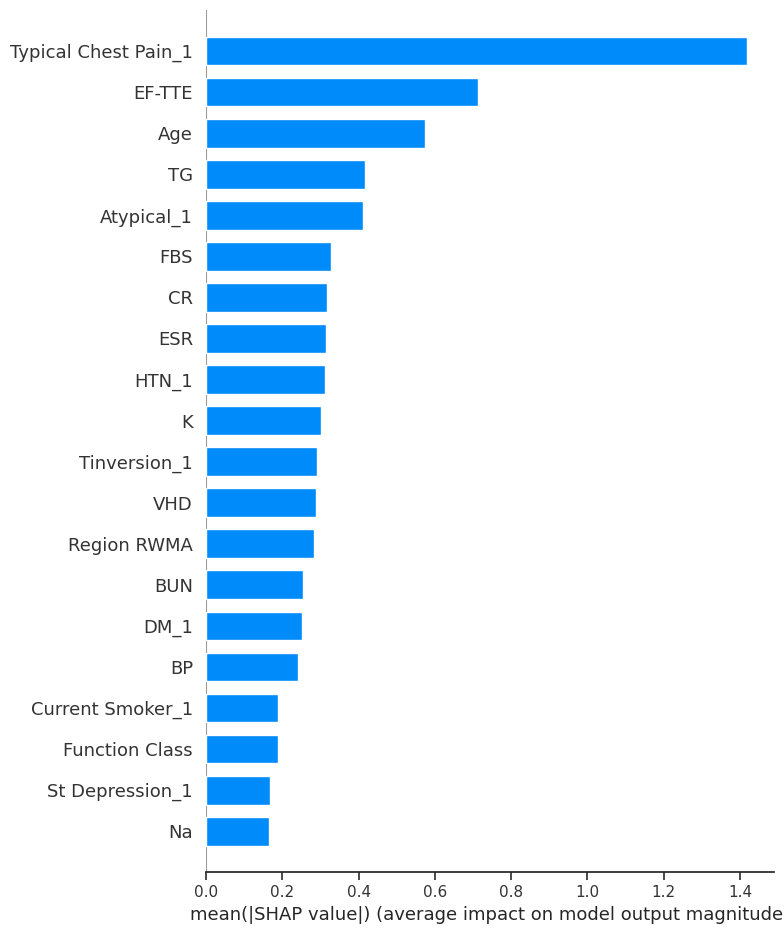

In [103]:
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, plot_type="bar")

`Feature Importance Plot` shows the average absolute Shapley values for feature. Top 5 features are:
- `Typical Chest Pain_1`
- `EF-TTE` (Ejection fraction)
- `Age`
- `TG`
- `Atypical_1` (Atypical chest pain)

 # 4.3 - SHAP Beeswarm Plot

Here is how to interpret the below `SHAP Beeswarm Plot`:  [Reference : [(Link)](https://www.kaggle.com/code/bextuychiev/model-explainability-with-shap-only-guide-u-need)]

1) The left vertical axis denotes feature names, ordered based on importance from top to bottom.

2) The horizontal axis represents the magnitude of the SHAP values for predictions.

3) The vertical right axis represents the actual magnitude of a feature as it appears in the dataset and colors the points.

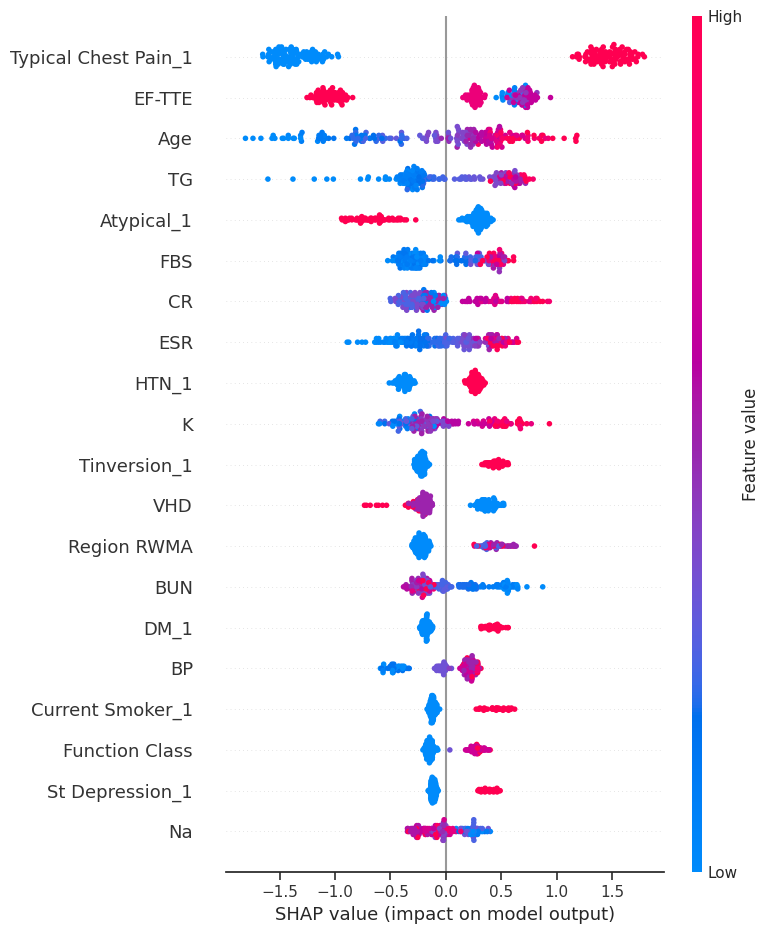

In [104]:
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)

- `Typical Chest Pain`, `HTN_1`, `Tinversion_1`, `DM_1`, `Current Smoker_1`, `ST Depression_1` shows clear positive correlations with target values `CAD`. 

- `Atypical_1` shows clear negative correlations with target values `CAD`. 

- Other features are a bit tricky with a cluster of mixed points.

# 4.4 - SHAP Dependence Plot

We can get a deeper insight into each feature's effect on the entire dataset with dependence plots.

## Numerical Features

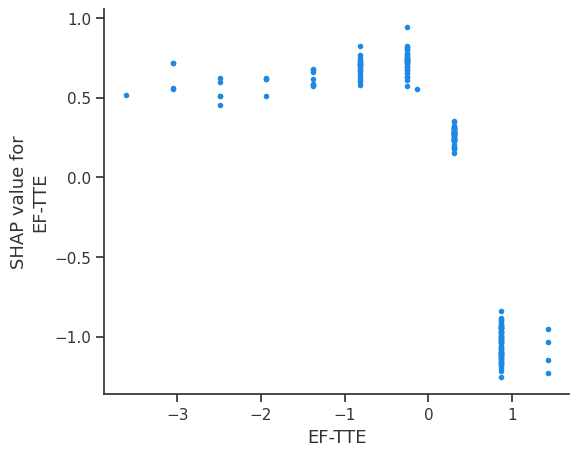

In [105]:
shap.dependence_plot("EF-TTE", shap_values, X_train, interaction_index=None)

This plot aligns with what we saw in the summary plot before. We can see the negative correlations between `EF-TTE` and target value `Cad`, since EF-TTE increases, its SHAP value decreases. By changing the `interaction_index` parameter to `auto`, we can color the points with a feature that most strongly interacts with `EF-TTE`.

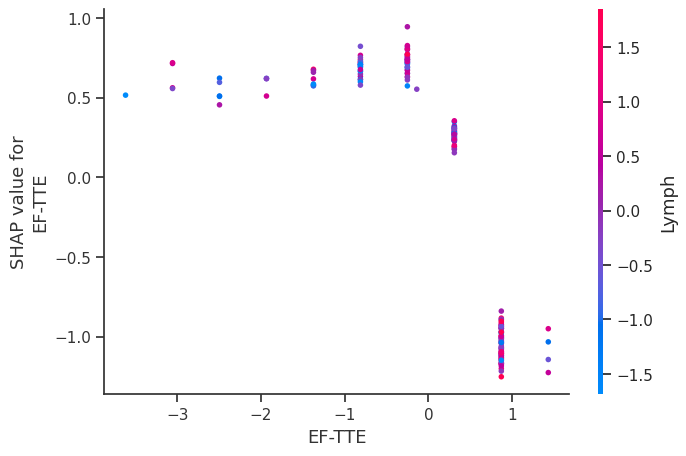

In [106]:
shap.dependence_plot("EF-TTE", shap_values, X_train, interaction_index='auto')

It seems that the `EF-TTE` interacts with the `Lymph` (lymphocyte to WBC ratio) much stronger than other features. 

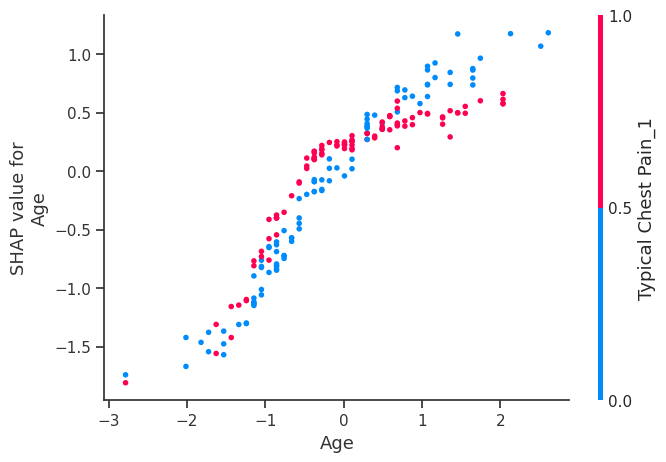

In [107]:
shap.dependence_plot("Age", shap_values, X_train, interaction_index='auto')

We can see the positive correlations between `Age` and `Cad`. As `Age` increases, its SHAP value increases. And it seems that `Age` interacts with `Typical Chest Pain_1` much stronger than other features.

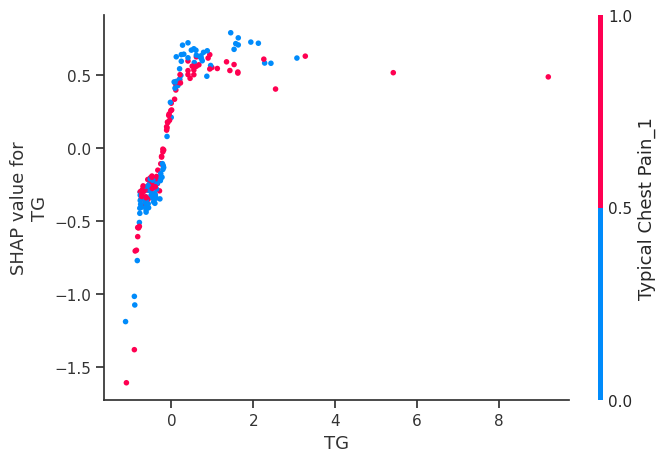

In [108]:
shap.dependence_plot("TG", shap_values, X_train, interaction_index='auto')

We can see the positive correlations between `TG` and `Cad`, and `Typical Chest Pain_1` has the strongest interaction with `TG`.

## Categorical Features

In [109]:
shap.dependence_plot("Typical Chest Pain_1", shap_values, X_train, interaction_index='auto')

`Typical Chest Pain_1` has the positive correlation with `Cad`, while interacting with `Age`.

In [110]:
shap.dependence_plot("Atypical_1", shap_values, X_train, interaction_index='auto')

`Typical Chest Pain_1` has the negative correlation with `Cad`, while interacting with `Lymph`.

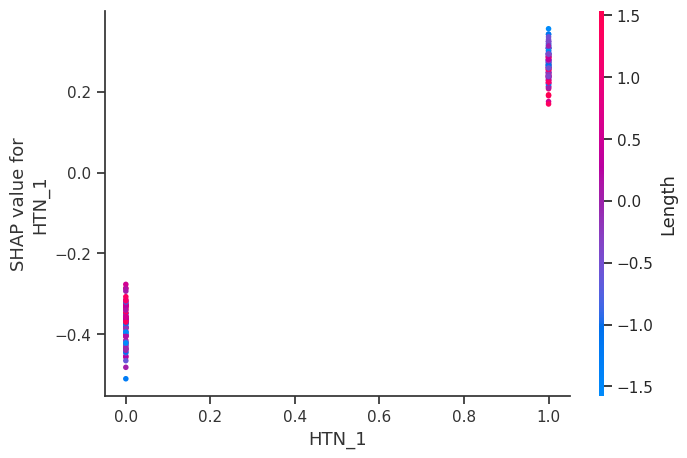

In [111]:
shap.dependence_plot("HTN_1", shap_values, X_train, interaction_index='auto')

`HTN_1` has the positive correlation with `Cad`, while interacting with `Length` (height).

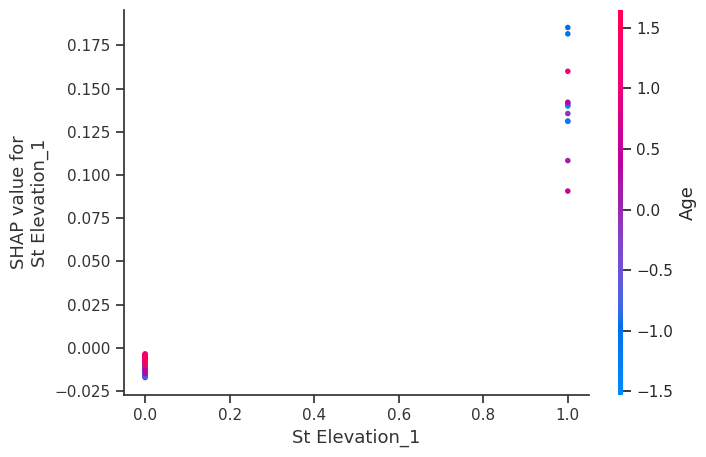

In [112]:
shap.dependence_plot("St Elevation_1", shap_values, X_train, interaction_index='auto')

`St Elveation_1` has the positive correlation with `Cad`, while interacting with `Age`.

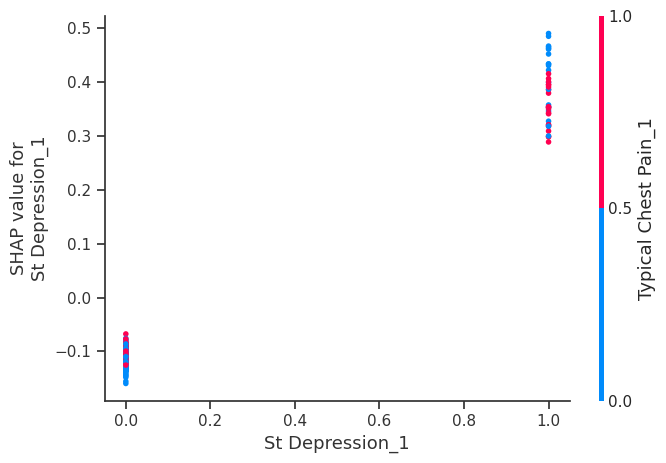

In [113]:
shap.dependence_plot("St Depression_1", shap_values, X_train, interaction_index='auto')

`St Depression_1` has the positive correlation with `Cad`, while interacting with `Typical Chest Pain_1`.

## Ordinal Features

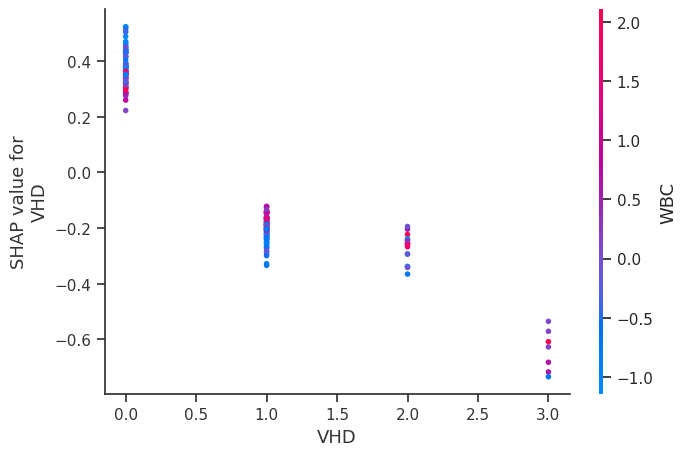

In [114]:
shap.dependence_plot("VHD", shap_values, X_train, interaction_index="auto")

`VHD` has the negative correlation with `Cad`, while interacting with `WBC`.

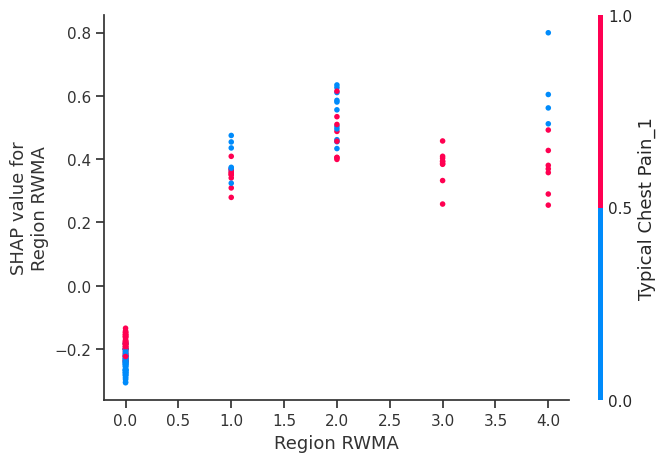

In [115]:
shap.dependence_plot("Region RWMA", shap_values, X_train, interaction_index="auto")

`Region RWMA` has the positive correlation with `Cad`, while interacting with `Typical Chest Pain_1`.

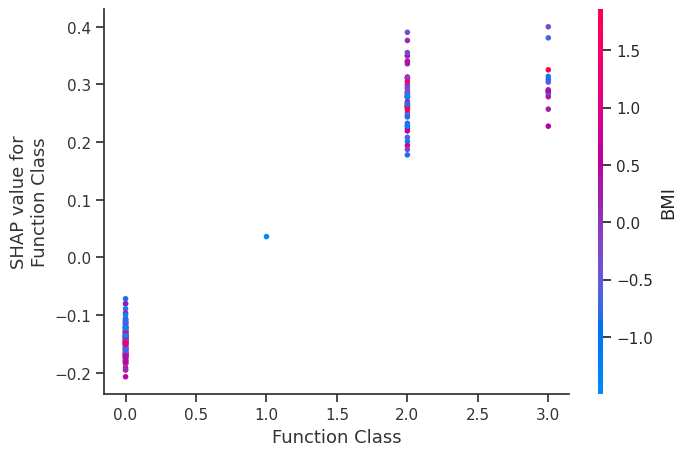

In [116]:
shap.dependence_plot("Function Class", shap_values, X_train, interaction_index="auto")

`Function Class` has the positive correlation with `Cad`, while interacting with `BMI`.

# ***Local Interpretability***

# 4.5 - Background Knowledge

 For patients who came into hospital because of chest pain, they can be diagnosed into five groups. which are:
 
 - Noncardiac chest pain
 - Stable angina
 - Unstable angina
 - Non ST segment elevation Myocardial Infarction (NSTEMI)
 - ST segment elevation Myocardial Infarction (STEMI)
 
 
If there is no clue about noncardiac chest pain (problems of lung, esophagus, chest wall, or maybe psychogenic), then we can suppose that the chest pain is originated from heart. Diagnosis between stable angina and unstable angina is based on symptoms of the patient. *Unstable angina* can be characterized by three symptoms, which are "at rest, new onset, crescendo pattern". 

If cardiac enzymes are elevated, then patient can be diagnosed as "myocardial infarction". And If the ECG shows ST elevation, then patient is diagnosed as *STEMI*, otherwise *NSTEMI*. Unstable angina and NSTEMI are called as NSTE-ACS. **STEMI patients need immediate reperfusion by coronary angiography. And NSTE-ACS patients get coronary angiography if the patient meets the following criteria:**
 

___
### ***Class I Recommendations for use of an early invasive strategy***
#### *1. Reucrrent angina/ischemia at rest or minimal exertion despite anti-ischemic therapy*
#### *2. Elevated cardiac enzyme (TnT or TnI)*
#### *3. New ST-segment depression*
#### *4. CHF symptoms, rales or worsening mitral regurgitation*
#### *5. Positive stress test*
- Exercise stress test to provoke ischemic ST-T changes [low sensitivity (50-75%) for coronary heart disease]

#### *6. LVEF < 0.40*
#### *7. Hemodynamic instability or hypotension*
#### *8. Sustained ventricular tachycardia*
#### *9. Diabetes*
#### *10. Renal dysfunction*
#### *11. High TIMI Risk Score (>3)*
- Age>=65 
- CAD risk factors >= 3 (Hypertension, Hypercholesterolemia, Diabetes, Family history of CAD, Current smoker)
- Known CAD
- Aspirin use in past 7 days
- Severe Angina (>=2 episodes in 24 hours)
- EKG ST changes >=0.5mm
- Positive cardiac marker
___

Now, let's assume a situation that you become a doctor. And you are responsible for caring the patient who came into your office because of chest pain. **Will you recommend the patient to get invasive coronary angiography or not?**  SHAP Waterfall plot and SHAP Force plot will help you explain the patient why you recommend or not. Or you can explain the patient with reference to above recommendations. We chose two patients from the dataset. Now let's begin:

# 4.6 - SHAP Waterfall Plot & Force Plot

In [117]:
cat_explainer = shap.TreeExplainer(cat_model, X_train, feature_names = X_train.columns.tolist())

In [118]:
shap_explainer_values = cat_explainer(X_train, y_train)

We first recalculate the SHAP values using the explainer object. This is different than `shap_values` function, because this time, the Shapley values are returned with a few more properties we need for local interpretability.

In [119]:
type(shap_explainer_values)

shap._explanation.Explanation

## ***Patient No.77***

In [120]:
pd.DataFrame(X_train.iloc[77])

236
Sex_Male                 1.000000
DM_1                     1.000000
HTN_1                    1.000000
Current Smoker_1         0.000000
EX-Smoker_1              0.000000
FH_1                     1.000000
Obesity_1                0.000000
CRF_1                    0.000000
CVA_1                    0.000000
Airway disease_1         0.000000
Thyroid Disease_1        0.000000
CHF_1                    0.000000
DLP_1                    1.000000
Edema_1                  0.000000
Weak Peripheral Pulse_1  0.000000
Lung rales_1             0.000000
Systolic Murmur_1        0.000000
Diastolic Murmur_1       0.000000
Typical Chest Pain_1     0.000000
Dyspnea_1                1.000000
Atypical_1               1.000000
Nonanginal_1             0.000000
LowTH Ang_1              0.000000
Q Wave_1                 0.000000
St Elevation_1           0.000000
St Depression_1          1.000000
Tinversion_1             1.000000
LVH_1                    0.000000
Poor R Progression_1     0.000000
Age                     -1.146753
Weight                  -0.654409
Length                   0.567406
BMI                     -1.077924
BP                      -0.505344
PR                      -0.577933
FBS                     -0.195886
CR                       1.305199
TG                      -0.392067
LDL                     -1.093534
HDL                     -0.970816
BUN                     -0.504178
ESR                     -0.343306
HB                      -0.655225
K                       -0.067097
Na                      -1.314369
WBC                      0.804213
Lymph                    0.763416
Neut                    -0.014609
PLT                     -0.403462
EF-TTE                  -0.250327
Function Class           2.000000
Region RWMA              1.000000
VHD                      1.000000

In [121]:
pd.DataFrame(data.iloc[236])

236
Age                          47
Weight                       66
Length                      170
Sex                        Male
BMI                    22.83737
DM                            1
HTN                           1
Current Smoker                0
EX-Smoker                     0
FH                            1
Obesity                       0
CRF                           0
CVA                           0
Airway disease                0
Thyroid Disease               0
CHF                           0
DLP                           1
BP                          120
PR                           70
Edema                         0
Weak Peripheral Pulse         0
Lung rales                    0
Systolic Murmur               0
Diastolic Murmur              0
Typical Chest Pain            0
Dyspnea                       1
Function Class                2
Atypical                      1
Nonanginal                    0
Exertional CP                 0
LowTH Ang                     0
Q Wave                        0
St Elevation                  0
St Depression                 1
Tinversion                    1
LVH                           0
Poor R Progression            0
FBS                         109
CR                          1.4
TG                          112
LDL                          66
HDL                        30.0
BUN                          14
ESR                          14
HB                         12.1
K                           4.2
Na                          136
WBC                        9500
Lymph                        40
Neut                         60
PLT                         197
EF-TTE                       45
Region RWMA                   1
VHD                           1
Cath                        Cad

This is the real data of *Patient No.77*.

In [122]:
cat_model.predict_proba(X_train.iloc[77])[1]*100

98.70427782988801

Catboost model predicted the probability of coronary artery disease as 98.7%.

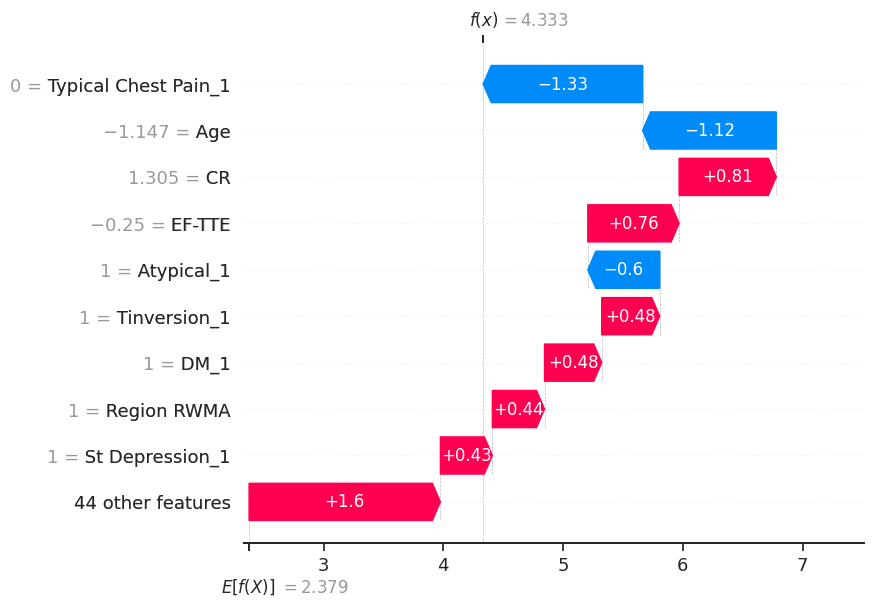

In [123]:
shap.waterfall_plot(shap_explainer_values[77])

The E[f(x)] = 2.379 is the mean prediction of CAD for the train set. The f(x) = 4.333 is the prediction of CAD for the patient No.77. The vertical axis shows the feature values of the No.77. The bars represent how each feature shifted the CAD from mean prediction. The red bars represents positive shifts, and the blue bars represent negative shifts.

In [124]:
shap.initjs()

shap.force_plot(shap_explainer_values[77])

Force plot is just an ordered, organized version of waterfall plots. All negative and positive bars are grouped to either side of the prediction of coronary artery disease. The bars show how much each feature shifts the value.

From clinician perspective, we could not know the patient can be diagnosed as myocardial infarction since the cardiac enzyme data is not provided. But, the ECG data is showing ST depression and T inversion, which are suggestive of ischemic change. 

Even though the pattern of chest pain is not "typical", patient has **diabetes**, and creatinine is upper normal limit which is suggestive of renal dysfunction. Therefore, the patient should take invasive coronary angiography as an early invasive strategy. In reality, many diabetes patients with coronary artery disease manifests atypical chest pain, like *Patient No.77*.

SHAP Force Plot is consistent with above analysis. Even though `Typical Chest Pain_1` is 0 and `Atypical_1` is 1 (which pushes the model to predict as normal), the patient ECG is showing `St Depression_1 = 1` and `Tinversion_1 = 1`, and the patient has `DM_1`, `HTN_1`, and `FH`=1 (family history of coronary artery disease). And also high `Creatinine` level and low `EF-TTE` and `Region RWMA = 1` pushes the model to predict the person as `CAD` patient, which is consistent with the result.

***So you can explain the patient that: "Even though your chest pain type is atypical, the ECG data shows signs of ischemia (T inversion and ST Depression) and your creatinine level is upper normal limit, which is suggestive of renal dysfunction, and you have diabetes and there is regional wall motion abnormality in echocardiography. Our model predicted the probability of coronary artery disease as 98.7%. I think you should get coronary angiography as early invasive strategy. And also your information meets the clinical criteria."***



## ***Patient No.7***

In [125]:
pd.DataFrame(X_train.iloc[7])

204
Sex_Male                 0.000000
DM_1                     0.000000
HTN_1                    0.000000
Current Smoker_1         0.000000
EX-Smoker_1              0.000000
FH_1                     1.000000
Obesity_1                1.000000
CRF_1                    0.000000
CVA_1                    0.000000
Airway disease_1         0.000000
Thyroid Disease_1        0.000000
CHF_1                    0.000000
DLP_1                    1.000000
Edema_1                  0.000000
Weak Peripheral Pulse_1  0.000000
Lung rales_1             0.000000
Systolic Murmur_1        0.000000
Diastolic Murmur_1       0.000000
Typical Chest Pain_1     1.000000
Dyspnea_1                1.000000
Atypical_1               0.000000
Nonanginal_1             0.000000
LowTH Ang_1              0.000000
Q Wave_1                 0.000000
St Elevation_1           0.000000
St Depression_1          0.000000
Tinversion_1             0.000000
LVH_1                    0.000000
Poor R Progression_1     0.000000
Age                     -0.857599
Weight                   1.267453
Length                  -0.613833
BMI                      1.944227
BP                      -1.034254
PR                      -1.139915
FBS                     -0.561315
CR                      -0.589747
TG                      -0.565895
LDL                      1.000515
HDL                     -0.496507
BUN                      0.071754
ESR                     -0.343306
HB                      -0.157648
K                        0.151509
Na                       0.526963
WBC                      0.140244
Lymph                   -0.240991
Neut                     0.477242
PLT                      0.634501
EF-TTE                   0.871699
Function Class           2.000000
Region RWMA              0.000000
VHD                      0.000000

In [126]:
pd.DataFrame(data.iloc[204])

204
Age                           50
Weight                        89
Length                       159
Sex                       Female
BMI                    35.204304
DM                             0
HTN                            0
Current Smoker                 0
EX-Smoker                      0
FH                             1
Obesity                        1
CRF                            0
CVA                            0
Airway disease                 0
Thyroid Disease                0
CHF                            0
DLP                            1
BP                           110
PR                            65
Edema                          0
Weak Peripheral Pulse          0
Lung rales                     0
Systolic Murmur                0
Diastolic Murmur               0
Typical Chest Pain             1
Dyspnea                        1
Function Class                 2
Atypical                       0
Nonanginal                     0
Exertional CP                  0
LowTH Ang                      0
Q Wave                         0
St Elevation                   0
St Depression                  0
Tinversion                     0
LVH                            0
Poor R Progression             0
FBS                           90
CR                           0.9
TG                            95
LDL                          140
HDL                         35.0
BUN                           18
ESR                           14
HB                          12.9
K                            4.3
Na                           143
WBC                         7900
Lymph                         30
Neut                          65
PLT                          260
EF-TTE                        55
Region RWMA                    0
VHD                            0
Cath                      Normal

This is the real data of *Patient No.7*.

In [127]:
cat_model.predict_proba(X_train.iloc[7])[1]*100

7.451650749950407

Catboost model predicted the probability of coronary artery disease as 7.4%.

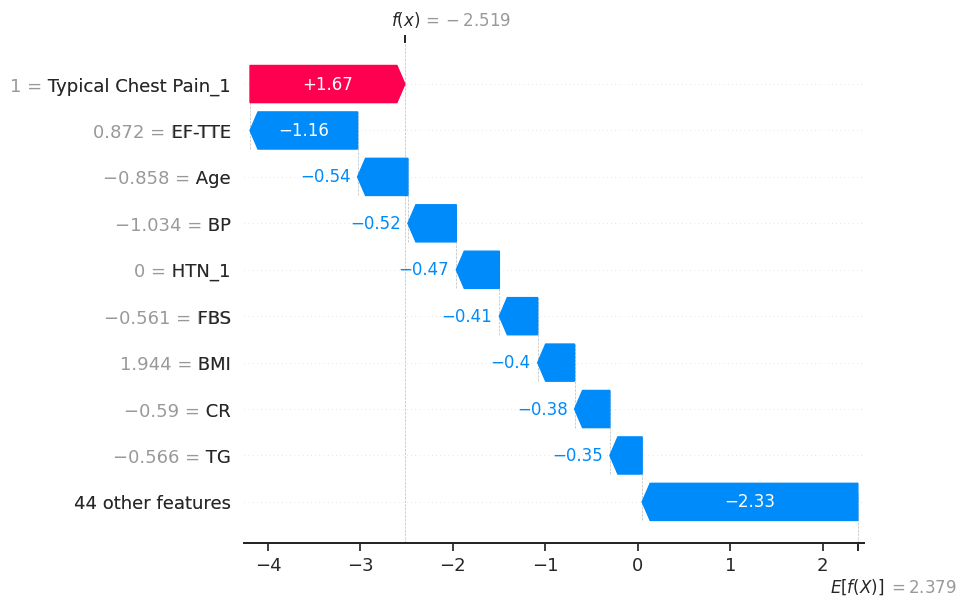

In [128]:
shap.waterfall_plot(shap_explainer_values[7])

In [129]:
shap.initjs()

shap.force_plot(shap_explainer_values[7])

From clinician perspective, even though the type of chest pain is "typical", the patient's data meets none of the criteria for early invasive strategy. Therefore invasive coronary angiography is not needed right now, and exercise stress test might be helpful.

SHAP Force Plot is consistent with above analysis. `Typical Chest Pain_1 = 1` and `FH_1 = 1` and `Function class = 2` pushes the model to predict the patient as `Cad` group. But `EF-TTE`, `BP`, `HTN_1` and other features are normal, and they pushes the model to predict the patient as normal group. The model's prediction is f(X) = -2.519, which means that the patient's prediction is normal. And it is consistent with the result.

***So you can explain the patient that: "Even though your chest pain type is typical and you have family history of coronary artery disease, you don't have any indications for invasive coronary angiography. And resting ECG is normal without signs of ischemia. Our model predicted the probability of coronary artery disease as 7.4%. I think you don't have to get invasive coronary angiography right now, but let's do exercise stress test to check if there's any signs of ischemia."***

 In conclusion, SHAP can provide a powerful and flexible way to interpret machine learning models and understand how they make their predictions. By computing feature importance scores based on Shapley values, SHAP can provide valuable insights into the contribution of each feature to a given prediction, and help you identify which features are most important for your model's performance. SHAP can be a valuable tool for improving your understanding of how your model works, and identifying areas for improvement.

# **5 - Conclusion**

Our goal was to build a coronary artery disease prediction model and compare the performance of various machine learning algorithms, and analyze explainability of selected machine learning algorithm. 

In ***Dataset Description*** part, we comprehended each features elaborately with some domain knowledge. And by studying basics of ECG and referring to NCEP ATP III guideline, we improved our understanding about this dataset and coronary heart disease.

In ***Exploratory Data Analysis*** part, we got a sense of the data distribution and examined the basic statistical properties of the data. This included understanding the types of variables, checking for missing values, and visualizaing the distribution of various features and the target variable. The initial step is crucial in any data science project and helped us identify trends, anomalies, patterns, and relationships within the data.

In ***Predictive Analysis*** part, we processed the data, and split the data into training set and test set, and we oversampled the data by `SMOTENC`, and developed predictive models with hyperparameter tuning by `Optuna`. 

We built six models, CatBoost, XGBoost, LightGBM and three Ensemble Models. And we compared these six models with metrics. And we selected *CatBoost* to analyze explainability.

In ***Explainable AI using SHAP*** part, we interpreted *CatBoost* model with SHAP value. By plotting Feature importance plot, Summary plot, and Dependence plot, we got information about *Global interpretability* of the model.

To understand *Local interpretability* of the model, we chose *Patient No.77* and *Patient No.7* from the training dataset. And we recommended the patient to get coronary angiography or not with the help of *SHAP Waterfall plot*, *SHAP Force Plot*, and current clinical guidelines.

In the medical field, ***XAI (Explainable AI)*** with a lot of methods such as SHAP, LIME, ELI5, CAM, or Grad-CAM would help reduce the likelihood of man-made mistakes. Artificial Intelligence will become great assistant in this field, and it is actually being applied now. 

***I think our model, CatBoost with SHAP would be a great helper as well. In an organized way, it showed what to focus on, being consistent with current decision-making process in the field.*** And It would be very helpful in making decision more accurately and more efficiently. Our method is applicable to other areas of medical field, and we could utilize this method to another datasets.

**If you like my notebook and think this notebook informative, please do upvote and add comments in the comment section.** I've graduated medical school in South Korea this year, and **this is my first notebook.** So there might be a lot of mistakes... **Any comments are highly appreciated. Thank you :)**

# **References**

- Zhang S, Yuan Y, Yao Z, Yang J, Wang X, Tian J. Coronary Artery Disease Detection Model Based on Class Balancing Methods and LightGBM Algorithm. Electronics. 2022; 11(9):1495. https://doi.org/10.3390/electronics11091495

- Kaggle Notebook : Classification_EDA_CrossValidate_PlotMetrics [(Link)](https://www.kaggle.com/code/bryamblasrimac/classification-eda-crossvalidate-plotmetrics)

- Kaggle Notebook : Model Interpretation Using SHAP in 2023 [(Link)](https://www.kaggle.com/code/ayushnitb/model-interpretation-using-shap-in-2023)

- Kaggle Notebook : Model Explainability with SHAP: Only Guide U Need [(Link)](https://www.kaggle.com/code/bextuychiev/model-explainability-with-shap-only-guide-u-need)

- Kaggle Notebook : Heart Attack : EDA | Cluster | 8 ML Models [(Link)](https://www.kaggle.com/code/tumpanjawat/heart-attack-eda-cluster-8-ml-models)